##  Project objects
- Cleaned dirty web log data and transform JSON data into CSV file-format for analytics.
- Conducted exploratory data analysis: find user activity levels for different events, and user interaction with web components.
- Identified key factors that bottleneck the conversion rate based on the calculation of conversion rate for users.
- Proposed any hypothesis and set up experiments for testing.
- Built machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discovered interesting insights in the dataset and suggest how to improve the user signup rate.

# <font color='purple'>Index</font>
* [Load Data & Inspect Dataset](##Load-dataset-and-inspect-the-data)
* [Feature Transformation](##Feature-Transformation)
    * [Transform Feature-Time's DataType](###Convert-column-"time"-data-type-to-Datetime)
    * [Missing Value Inspection](###Check-features-with-&-without-missing-value)
    * [Rename Columns](###Rename-column-name)
* [Feature Selection](##Feature-Statistics-Overview)
    * [All Variables' Factor layers Check](###Number-of-Unique-Factors-&-Distinct-Factors-&-Non-Missing-Value-Ratio-in-Features)
    * [Reorganize variables](###Delete-several-variables-with-high-ratio-of-missing-value-or-no-obvious-connection-to-conversion)
    
* [EDA](###Exploratory-Data-Analysis)

## <font color='purple'>Load dataset and inspect the data</font>

In [34]:
import pandas as pd
df_sensor = pd.read_csv("sensorswww.csv",dtype="unicode")
df_sensor.head()

_nocache                               distinct_id        event  \
0  0654392402996  595466e9a8e733434ce08de16e927d985e0b5d48  index_leave   
1  3040562711955  9939d3e087bca29c42334d96dccd25ca0e06652a          NaN   
2  9587552771961  9939d3e087bca29c42334d96dccd25ca0e06652a    $pageview   
3  0652937076129  9939d3e087bca29c42334d96dccd25ca0e06652a     btnClick   
4  8207407748558  9939d3e087bca29c42334d96dccd25ca0e06652a     btnClick   

  jssdk_error lib.$lib lib.$lib_method lib.$lib_version properties.$browser  \
0         NaN       js            code           1.6.20              chrome   
1         NaN       js            code           1.6.20                 NaN   
2         NaN       js            code           1.6.20              chrome   
3         NaN       js            code           1.6.20              chrome   
4         NaN       js            code           1.6.20              chrome   

  properties.$browser_version properties.$first_browser_language  \
0                          56                                NaN   
1                         NaN                              zh-CN   
2                          56                                NaN   
3                          56                                NaN   
4                          56                                NaN   

         ...        properties.referrerUrl properties.requestBtn  \
0        ...                           NaN                   NaN   
1        ...                           NaN                   NaN   
2        ...                           NaN                   NaN   
3        ...                           NaN                     2   
4        ...                           NaN                     2   

  properties.result                        properties.session_page_url  \
0               NaN  https://www.sensorsdata.cn/?utm_source=baidu&u...   
1               NaN                                                NaN   
2               NaN                    https://sensorsdata.cn/?ch=demo   
3               NaN                    https://sensorsdata.cn/?ch=demo   
4               NaN                    https://sensorsdata.cn/?ch=demo   

  properties.siteUrl properties.site_url properties.url_path  \
0                NaN                 NaN                 NaN   
1                NaN                 NaN                 NaN   
2                NaN                 NaN                 NaN   
3                NaN                 NaN                 NaN   
4                NaN                 NaN                 NaN   

  properties.verification_code           time              type  
0                          NaN  1488791047953             track  
1                          NaN  1490958296645  profile_set_once  
2                          NaN  1488791050856             track  
3                          NaN  1488791051772             track  
4                          NaN  1488791056032             track  

[5 rows x 70 columns]

In [35]:
df_sensor.shape

(75092, 70)

In [36]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75092 entries, 0 to 75091
Data columns (total 70 columns):
_nocache                               75092 non-null object
distinct_id                            75092 non-null object
event                                  65673 non-null object
jssdk_error                            58 non-null object
lib.$lib                               75092 non-null object
lib.$lib_method                        75092 non-null object
lib.$lib_version                       75092 non-null object
properties.$browser                    65673 non-null object
properties.$browser_version            65673 non-null object
properties.$first_browser_language     9148 non-null object
properties.$first_referrer             6732 non-null object
properties.$first_referrer_host        6732 non-null object
properties.$first_visit_time           9419 non-null object
properties.$ip                         65673 non-null object
properties.$is_first_day               65673

## <font color='purple'>Feature Transformation</font>

###  <font color='purple'> (1) Convert column "time" data type to Datetime & Extract date/dayofweek/daytime</font>

In [37]:
df_sensor['time'][0]

'1488791047953'

In [38]:
type(df_sensor['time'][0])

str

In [39]:
from datetime import *
time_reformatted = []
for i in range(len(df_sensor['time'])):
    timeint = int(df_sensor['time'][i])
    timeint /= 1000    # 10 digits->timestamp
    time_transform = datetime.utcfromtimestamp(timeint).strftime('%Y-%m-%d %H:%M:%S')
    time_reformatted.append(time_transform)
    
# pd.Series: One-dimensional ndarray with axis labels
df_sensor['time_reformat'] = pd.Series(time_reformatted)

df_sensor.head(1)

df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75092 entries, 0 to 75091
Data columns (total 71 columns):
_nocache                               75092 non-null object
distinct_id                            75092 non-null object
event                                  65673 non-null object
jssdk_error                            58 non-null object
lib.$lib                               75092 non-null object
lib.$lib_method                        75092 non-null object
lib.$lib_version                       75092 non-null object
properties.$browser                    65673 non-null object
properties.$browser_version            65673 non-null object
properties.$first_browser_language     9148 non-null object
properties.$first_referrer             6732 non-null object
properties.$first_referrer_host        6732 non-null object
properties.$first_visit_time           9419 non-null object
properties.$ip                         65673 non-null object
properties.$is_first_day               65673

In [40]:
df_sensor.head(1)

_nocache                               distinct_id        event  \
0  0654392402996  595466e9a8e733434ce08de16e927d985e0b5d48  index_leave   

  jssdk_error lib.$lib lib.$lib_method lib.$lib_version properties.$browser  \
0         NaN       js            code           1.6.20              chrome   

  properties.$browser_version properties.$first_browser_language  \
0                          56                                NaN   

          ...          properties.requestBtn properties.result  \
0         ...                            NaN               NaN   

                         properties.session_page_url properties.siteUrl  \
0  https://www.sensorsdata.cn/?utm_source=baidu&u...                NaN   

  properties.site_url properties.url_path properties.verification_code  \
0                 NaN                 NaN                          NaN   

            time   type        time_reformat  
0  1488791047953  track  2017-03-06 09:04:07  

[1 rows x 71 columns]

In [41]:
# Extract date/dayofweek
time_type = pd.to_datetime(df_sensor.time_reformat)
df_sensor['time_type'] = time_type
df_sensor['date'] = df_sensor.time_type.dt.date
df_sensor['dayofweek'] = df_sensor.time_type.dt.dayofweek   # Mon 0, Sat 6

dayofweek = []

for i in range(len(df_sensor)):
    if df_sensor['dayofweek'][i] == 0:
        dayofweek.append("Mon")
    elif df_sensor['dayofweek'][i] == 1:
        dayofweek.append("Tue")
    elif df_sensor['dayofweek'][i] == 2:
        dayofweek.append("Wed")
    elif df_sensor['dayofweek'][i] == 3:
        dayofweek.append("Thur")
    elif df_sensor['dayofweek'][i] == 4:
        dayofweek.append("Fri")
    elif df_sensor['dayofweek'][i] == 5:
        dayofweek.append("Sat")
    else:
        dayofweek.append("Sun")

df_sensor['dayofweek1'] = pd.DataFrame({'dayofweek1':dayofweek}) 

In [42]:
# Extract hour
time_type = pd.to_datetime(df_sensor.time_reformat)
df_sensor['time_type'] = time_type
df_sensor['date'] = df_sensor.time_type.dt.date
df_sensor['hour'] = df_sensor.time_type.dt.hour

hourC = []

for i in range(len(df_sensor)):
    if df_sensor['hour'][i] > 0 and df_sensor['hour'][i] < 6:
        hourC.append("night")
    elif df_sensor['hour'][i] > 6 and df_sensor['hour'][i] <= 12:
        hourC.append("morning")
    elif df_sensor['hour'][i] >12 and df_sensor['hour'][i] <=18:
        hourC.append("noon")
    else:
        hourC.append("evening")

df_sensor['hourC'] = pd.DataFrame({'hourC':hourC})

### <font color='purple'>(2) Extract country/timezone from ip</font>

In [43]:
import IP2Location
IP2LocObj = IP2Location.IP2Location()
IP2LocObj.open("IP2LOCATION-LITE-DB11.IPV6.BIN")

In [44]:
# fetch only ip data in one independent file
df_ip = df_sensor['properties.$ip']
df_ip.head(3)

0     219.135.131.99
1                NaN
2    111.204.198.242
Name: properties.$ip, dtype: object

In [45]:
# (1) get Country value based on geolocation-ip transformation
country = []
for line in df_ip:
    try:
        rec = IP2LocObj.get_all(line)
        print (rec.country_short.decode('utf'))
        country.append(rec.country_short.decode('utf'))
    except:
        print ('NA')
        country.append('NA')      

CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
TH
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
TH
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
US
US
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
US
CN
CN
CN
CN
CN
CN
CN
US
US
US
US
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
US
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
NA
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
JP
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
C

CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
IN
IN
IN
IN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
NA
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
NA
CN
CN
CN
CN
NA
CN
NA
C

CN
US
US
US
US
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
US
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
FR
CN
FR
CN
-
CN
CN
CN
CN
CN
US
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN

HK
HK
HK
HK
CN
CN
CN
CN
CN
CN
NA
CN
HK
HK
HK
CN
CN
CN
HK
HK
HK
CN
NA
HK
CN
CN
CN
TH
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
HK
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
IN
IN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
HK
CN
CN
CN
CN
CN
NA
CN
NA
HK
HK
HK
CN
CN
HK
HK
NA
CN
NA
CN
CN
CN
CN
HK
CN
CN
CN
CN
CN
CN
CN
HK
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
HK
HK
HK
CN
CN
CN
CN
CN
CN
CN
JP
JP
JP
CN
CN
CN
CN
CN
NA
CN
CN
CN
C

CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
NA
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
C

CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
JP
CN
CN
JP
JP
JP
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
GB
NA
US
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
CN
CN
NA
C

CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
NA
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
N

CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
C

CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
NZ
NZ
NZ
CN
CN
CN
CN
CN
CN
CN
NZ
NZ
CN
CN
NZ
NZ
NZ
NZ
NZ
NZ
NZ
NZ
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NZ
NZ
NZ
NZ
NZ
NZ
NZ
NZ
NZ
CN
NA
CN
NZ
NA
CN
HK
CN
HK
HK
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
TW
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
NA
NA
CN
NA
HK
HK
HK
HK
NA
CN
NA
CN
CN
HK
HK
HK
HK
HK
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
HK
CN
HK
HK
NA
CN
CN
HK
HK
HK
HK
HK
HK
HK
HK
CN
CN
CN
HK
HK
HK
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
HK
NA
CN
CN
CN
CN
HK
HK
CN
CN
N

CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
SG
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
SG
SG
SG
NA
SG
CN
CN
CN
CN
CN
US
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
SG
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
US
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
C

CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
US
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
US
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
NA
US
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
NA
US
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
C

CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
NA
US
CN
CN
CN
CN
CN
CN
US
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
C

CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
SG
SG
SG
CN
SG
SG
SG
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
IN
CN
CN
CN
CN
NA
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
IN
CN
CN
CN
CN
CN
CN
IN
IN
IN
IN
IN
CN
IN
IN
IN
IN
IN
CN
CN
CN
CN
CN
IN
CN
CN
NA
CN
CN
IN
CN
IN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
NA
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
NA
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
C

CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
US
NA
US
US
US
US
CN
US
US
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
SG
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
C

CN
CN
CN
CN
CN
CN
CN
NA
HK
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
C

CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
HK
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
HK
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
US
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
C

CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
IN
IN
CN
CN
IN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
IN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
NA
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
C

CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
C

CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
NA
CN
CN
NA
CN
NA
NA
CN
CN
CN
CN
NA
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
US
US
US
US
US
US
US
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CA
CA
CA
CA
CA
CA
CA
CN
CN
NA
CN
CN
CN
CN
CA
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
US
US
US
CN
CN
CN
CN
CN
NA
CN
US
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
C

CN
CN
CN
NA
NA
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
NA
NA
CN
C

CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
AU
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
NA
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
AU
NA
CN
AU
NA
CN
AU
AU
AU
AU
AU
AU
CN
AU
AU
NA
CN
CN
AU
AU
AU
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
C

CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
US
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
HK
CN
CN
NA
CN
CN
CN
CN
HK
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
C

CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
HK
CN
HK
NA
CN
CN
CN
CN
NA
CN
HK
HK
HK
HK
HK
HK
HK
HK
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
K

CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
US
NA
CN
NA
CN
NA
NA
CN
NA
US
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
NA
NA
CN
IT
CN
NA
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
NA
CN
NA
NA
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
US
NA
CN
CN
NA
US
US
NA
US
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
NA
NA
CN
CN
NA
CN
NA
CN
NA
CN
NA
CN
US
NA
US
US
NA
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
C

CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
NA
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
HK
CN
HK
CN
CN
CN
CN
CN
CN
CN
N

CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
HK
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
US
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
C

CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
US
US
US
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
C

CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
US
CN
NA
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
CN
CN
CN
CN
NA
CN
NA
CN
NA
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
CN
CN
CN
NA
CN
NA
CN
CN
NA
CN
NA
CN
CN
CN
CN
CN
CN
CN
NA
CN
CN
NA
CN
CN
CN
CN
CN
NA
C

In [14]:
# add Country to original data set
df_sensor["country"] = pd.DataFrame({"country":country})

In [15]:
df_sensor.head(3)

_nocache                               distinct_id        event  \
0  0654392402996  595466e9a8e733434ce08de16e927d985e0b5d48  index_leave   
1  3040562711955  9939d3e087bca29c42334d96dccd25ca0e06652a          NaN   
2  9587552771961  9939d3e087bca29c42334d96dccd25ca0e06652a    $pageview   

  jssdk_error lib.$lib lib.$lib_method lib.$lib_version properties.$browser  \
0         NaN       js            code           1.6.20              chrome   
1         NaN       js            code           1.6.20                 NaN   
2         NaN       js            code           1.6.20              chrome   

  properties.$browser_version properties.$first_browser_language   ...    \
0                          56                                NaN   ...     
1                         NaN                              zh-CN   ...     
2                          56                                NaN   ...     

            time              type        time_reformat           time_type  \
0  1488791047953             track  2017-03-06 09:04:07 2017-03-06 09:04:07   
1  1490958296645  profile_set_once  2017-03-31 11:04:56 2017-03-31 11:04:56   
2  1488791050856             track  2017-03-06 09:04:10 2017-03-06 09:04:10   

         date dayofweek dayofweek1 hour    hourC country  
0  2017-03-06         0        Mon    9  morning      CN  
1  2017-03-31         4        Fri   11  morning      NA  
2  2017-03-06         0        Mon    9  morning      CN  

[3 rows x 78 columns]

In [16]:
# (2) get City value based on geolocation-ip transformation
c = []
for line in df_ip:
    try:
        rec = IP2LocObj.get_all(line)
        print (rec.city.decode('utf'))
        c.append(rec.city.decode('utf'))
    except:
        print ('NA')
        c.append('NA')
        

Guangzhou
NA
Beijing
Beijing
Beijing
Guangzhou
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Wuhan
Hangzhou
NA
Guangzhou
Xizhahaqi
Xizhahaqi
Beijing
NA
Bangkok
NA
Shanghai
Guangzhou
Beijing
Langfang
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Guangzhou
Beijing
Guangzhou
Guangzhou
Guangzhou
NA
Bangkok
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Beijing
Hangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Hangzhou
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Shenyang
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Wuhan
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Beijing
NA
Wuhan
Beijing
Beijing
Beijing
NA
Shenzhen
NA
Panzhihua
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Nanjing
Shenzhen
Beijing
Beijing
NA
Hangzhou
Shanghai
Beijing
Beijing
NA
Beijing
Nanj

Hangzhou
Hangzhou
Hangzhou
Beijing
Hefei
Beijing
Nanjing
Hangzhou
Hangzhou
Nanjing
Nanjing
Nanjing
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Nanjing
NA
Beijing
Beijing
Beijing
Phrae
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Xizhahaqi
Xizhahaqi
Xizhahaqi
Xizhahaqi
Xizhahaqi
Shenzhen
Shenzhen
Beijing
NA
Xinning
Xizhahaqi
Shenzhen
Xizhahaqi
Xizhahaqi
NA
Baihe
Baihe
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Nanjing
NA
Beijing
Nanjing
Xinning
Xinning
Xinning
Xinning
Xinning
NA
Beijing
Beijing
Beijing
Beijing
Suzhou
Suzhou
Beijing
Beijing
NA
Beijing
NA
Beijing
Chicago
Xizhahaqi
Beijing
NA
Beijing
Shenzhen
NA
Qianjiang
Qianjiang
Qianjiang
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Zhuhai
Beijing
Beijing
Beijing
Yichang
Beijing
Beijing
Yichang
Beijing
Yichang
Yichang
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
Beijing
San Mateo
San Mateo
San Mateo
Beijing
Yichang
Beijin

Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
NA
Hangzhou
Beijing
Guangzhou
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Guangzhou
NA
Wuhan
NA
Shenzhen
Wuhan
Wuhan
Shenzhen
Wuhan
Wuhan
Beijing
Guangzhou
NA
Shanghai
Beijing
Beijing
Beijing
NA
NA
Shanghai
Shanghai
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
Shanghai
NA
Shanghai
Shanghai
Chengdu
NA
Chengdu
Chengdu
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Dongguan
Hangzhou
NA
Zhuhai
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
NA
Hangzhou
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Hangzhou
Hangzhou
Hangzhou
NA
Guangzhou
Hangzhou
Hangzhou
NA
Beijing
Shanghai
NA
Shanghai
Shanghai
Shanghai
NA
Beijing
Shanghai
Chongqing
NA
Guangzhou
Guangzhou
Guangzhou
Jiangmen
NA
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Jiangmen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Hangz

Guangzhou
Beijing
Beijing
Beijing
Beijing
Guangzhou
Shanghai
Shanghai
NA
Beijing
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Guangzhou
Guangzhou
Guangzhou
Shanghai
Shanghai
NA
Shanghai
NA
Zhuhai
Zhuhai
Shanghai
Shanghai
Zhuhai
Guangzhou
Shanghai
Shanghai
Shanghai
Guangzhou
Shanghai
Shanghai
Nanjing
Shanghai
Beijing
Beijing
Shanghai
Guangzhou
Shanghai
NA
Jiangmen
Jiangmen
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
NA
Beijing
Shenzhen
Shenzhen
Shanghai
Beijing
Shanghai
Shanghai
Guangzhou
Shanghai
Shanghai
Shanghai
Shanghai
Zhongshan
Zhongshan
NA
Guangzhou
Guangzhou
Guangzhou
Nanjing
NA
Beijing
Beijing
Beijing
Beijing
NA
NA
Guangzhou
Guangzhou
NA
Chengdu
Chengdu
Chengdu
Chengdu
NA
Guangzhou
Guangzhou
Chengdu
Chengdu
Guangzhou
Dongguan
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Shenzhen
Shenzh

Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Beijing
Beijing
Beijing
Nanjing
NA
Dongguan
Beijing
Dongguan
NA
Jinhua
NA
Shijiazhuang
Jinhua
Beijing
NA
Jinhua
Jinhua
Beijing
Chongqing
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Hangzhou
NA
Beijing
Suzhou
Nanjing
NA
Huoqiu
Huoqiu
Huoqiu
Huoqiu
Suzhou
Beijing
Beijing
Beijing
Beijing
Suzhou
Huoqiu
Huoqiu
Beijing
Beijing
Beijing
Suzhou
Shenzhen
Suzhou
Huoqiu
Huoqiu
Shenzhen
Huoqiu
Huoqiu
Huoqiu
Suzhou
Huoqiu
Huoqiu
Huoqiu
Shenzhen
Huoqiu
Huoqiu
Kunming
Huoqiu
Huoqiu
Huoqiu
Shanghai
Huoqiu
Beijing
Beijing
Beijing
Huoqiu
Huoqiu
Huoqiu
Beijing
Huoqiu
Huoqiu
Huoqiu
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Huoqiu
Huoqiu
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Huoqiu
NA
Shenzhen
Beijing
Beijing
Beijing
Beijing
NA
Nanyang
Hangzhou
NA
Shenzhen
Shenzhen
NA
Hangzhou
Hangzhou
Nanyang
Nanyang
Nanyang
Nan

Changsha
Shenzhen
Urumqi
Urumqi
Urumqi
Beijing
Beijing
Beijing
Changsha
Urumqi
Urumqi
Urumqi
Beijing
Changsha
Beijing
Beijing
Beijing
Changsha
Chengdu
NA
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Guangzhou
Beijing
Beijing
Beijing
San Mateo
San Mateo
San Mateo
San Mateo
San Mateo
NA
Guangzhou
NA
Shanghai
Beijing
Beijing
Shanghai
Changsha
Hangzhou
Beijing
Hangzhou
Hangzhou
Hangzhou
Nanjing
Nanjing
Guangzhou
Shenzhen
Changsha
NA
Beijing
Beijing
NA
Beijing
Baotou
Beijing
Baotou
Baotou
Baotou
Beijing
Beijing
Beijing
Hangzhou
Baotou
NA
Beijing
Beijing
Beijing
Beijing
Guangzhou
Chongqing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
NA
Beijing
Nanyang
NA
Suzhou
San Mateo
San Mateo
San Mateo
San Mateo
Beijing
Shenzhen
NA
Yiwu
Beijing
Shanghai
Baotou
Baotou
Baotou
Beijing
Baotou
Baotou
Baotou
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Chengdu
Beijing
NA
Harbin
NA
Harbin
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
NA
Hohhot
Beijing
Be

Beijing
NA
Guangzhou
Guangzhou
NA
Shanghai
Beijing
NA
Shanghai
Beijing
Beijing
Nanjing
Shanghai
NA
Zhangjiagang
Zhangjiagang
NA
Shanghai
Beijing
NA
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
NA
Tangshan
Beijing
Tangshan
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Chengdu
Chengdu
Chengdu
Chengdu
Shenzhen
NA
Shenzhen
Chengdu
Chengdu
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Chengdu
Chengdu
NA
Shanghai
Beijing
NA
Shenzhen
NA
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shanghai
Shanghai
Beijing
Shenzhen
Shenzhen
Shenzhen
Shanghai
Shanghai
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Beijing
Guangzhou
NA
Shanghai
Beij

Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
NA
Ningbo
Ningbo
Ningbo
Ningbo
Beijing
Beijing
Beijing
Ningbo
Beijing
NA
Huangjing
Beijing
Beijing
Beijing
Beijing
Beijing
Hong Kong
Beijing
Beijing
Beijing
NA
Dingzhai
Ningbo
Beijing
Ningbo
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
NA
Beijing
Beijing
Beijing
Beijing
NA
Hangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Guangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Shanghai
Huai'an
NA
Hangzhou
NA
Beijing
Guangzhou
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Guangzhou
NA
Guangzhou
Guangzhou
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beiji

Shanghai
NA
Beijing
Shenzhen
Beijing
Hong Kong
Hong Kong
Hong Kong
Beijing
Shanghai
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Gifu
Gifu
Gifu
Beijing
Shenzhen
Shenzhen
Shenzhen
Beijing
NA
Beijing
Shanghai
Shanghai
Shanghai
Beijing
Beijing
NA
Ningbo
NA
Dongguan
NA
Guangzhou
Hangzhou
Dongguan
Guangzhou
Guangzhou
Guangzhou
NA
Foshan
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Hangzhou
Hangzhou
-
NA
Beijing
Ningbo
Ningbo
Beijing
Beijing
Beijing
Shenzhen
Shaoguan
Beijing
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Tianjin
Tianjin
Tianjin
Tianjin
Ningbo
Shenzhen
Foshan
Foshan
Foshan
Shanghai
Foshan
Foshan
Foshan
Beijing
Foshan
Foshan
Foshan
Foshan
Foshan
NA
Nanjing
Beijing
Beijing
Nanjing
Yinchuan
Yinchuan
Suzhou
Shenzhen
NA
Guangzhou
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Shanghai
Nanjing
Nanjing
Nanjing
Beijing
Nanjing
Nanjing
Nanjing
Nanjing
Shanghai
S

Beijing
Baotou
Beijing
Hangzhou
Hangzhou
Hangzhou
NA
Beijing
Beijing
Beijing
Beijing
NA
Huashu
Huashu
Hangzhou
Hangzhou
NA
Suzhou
Hangzhou
NA
Wuhan
Wuhan
Beijing
Shanghai
Nanjing
Suzhou
Beijing
NA
Maoming
Beijing
Shenzhen
NA
Shenzhen
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Hangzhou
Hangzhou
NA
Hangzhou
Hangzhou
Shanghai
Shanghai
Shanghai
Hangzhou
Hangzhou
Shenzhen
Beijing
Beijing
NA
Nanjing
NA
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
NA
Hangzhou
Shanghai
Shanghai
NA
Shanghai
Beijing
Shenzhen
NA
Shanghai
NA
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
NA
Foshan
Shanghai
Foshan
Foshan
Foshan
Foshan
Beijing
NA
Wuhan
Beijing
Shanghai
NA
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Nanjing
Nanjing
NA
Hangzhou
Beijing
Shanghai
Shanghai
Shanghai
NA
Beijing
Shanghai
Hangzhou
Beijing
Beijing
Shanghai
NA
Beijing
Beijing
Hangzhou
Shanghai
Wuhan
Hangzhou
Hangzhou
NA
Guangzhou


Wuhan
Wuhan
Wuhan
NA
Huzhou
Hangzhou
Huzhou
Shanghai
Hangzhou
Huzhou
Beijing
Beijing
NA
Beijing
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Wuhan
Beijing
Beijing
Shanghai
NA
Shanghai
Shanghai
Beijing
Beijing
Fuzhou
Shanghai
Shanghai
NA
Beijing
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Taiyuan
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Taiyuan
Guangzhou
Guangzhou
Guangzhou
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
Shanghai
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Guangzhou
Guangzhou
Beijing
Shenyang
Shanghai
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Shanghai
Shenzhen
Guangzhou
Guangzhou
Guangzhou
Beijing
Guangzhou
Hefei
Hefei
Beijing
Beijing
Beijing
Beijing
Shenyang
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Wuhan
Wuhan
Hefei
Hefei
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
NA
Shenzhen
Shenzhen
Shanghai
NA
Beijing
Guangzhou
Hangzhou
NA
Shenzhen
NA
B

Yichang
Yichang
Qingyuan
Yichang
Yichang
Beijing
Beijing
Shanghai
Guangzhou
Guangzhou
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Beijing
Shanghai
Shanghai
Beijing
Beijing
Beijing
Wimmenau
NA
NA
Shanghai
Beijing
Beijing
Beijing
NA
Shenzhen
Shanghai
NA
Yangjiang
NA
Ningbo
Shanghai
Ningbo
Beijing
Shanghai
Ningbo
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Yichang
Shanghai
Shanghai
Yichang
Yichang
Yichang
NA
Beijing
Yichang
Yichang
Yichang
Beijing
Yichang
Yichang
Yichang
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Yichang
Beijing
Yichang
Yichang
Yichang
Yangjiang
Yichang
Yichang
Yichang
Yichang
Yichang
Yichang
Yichang
Yichang
Shanghai
Yichang
NA
Beijing
Yichang
Yichang
Yichang
Yichang
Yichang
Shenzhen
Yichang
Yichang
Yichang
NA
Beijing
Yichang
Yichang
Yichang
Yichang
Yichang
Yichang
NA
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Beijing
Shenzhen
Shanghai
S

Guangzhou
Guangzhou
Guangzhou
Guangzhou
Shanghai
Guangzhou
NA
Xuhui
Shanghai
Xuhui
Shanghai
Guangzhou
Guangzhou
Guangzhou
Hangzhou
NA
Hangzhou
NA
Foshan
Foshan
Guangzhou
NA
Foshan
Beijing
Hangzhou
Hangzhou
Foshan
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Foshan
NA
Beijing
Foshan
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Saint Petersburg
Zhanjiang
NA
NA
Suzhou
Beijing
Suzhou
Shanghai
Hangzhou
NA
Chengdu
NA
Shanghai
Shanghai
Guangzhou
Guangzhou
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Guangzhou
NA
Hangzhou
Hangzhou
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Nanjing
Beijing
NA
Guangzhou
NA
Guangzhou
NA
Wuhan
NA
Shanghai
Shanghai
Hangzhou
Guangzhou
Hangzhou
Hangzhou
Hangzhou
Wuhan
NA
Guangzhou
Shenzhen
Wuhan
Guangzhou
NA
Beijing
Guangzhou
NA
Guangzhou
Guangzhou
NA
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Guangzhou
NA
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
NA
Shenzhen
NA
Shanghai
Shanghai
Shanghai
Sh

Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Guangzhou
Guangzhou
Shenzhen
NA
Shenzhen
Shenzhen
Shenzhen
NA
Guangzhou
NA
Nanjing
Nanjing
Guangzhou
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
NA
Beijing
Beijing
Wuhan
NA
Wuhan
NA
Dazhou
NA
Beijing
NA
Guangzhou
Guangzhou
NA
Shenzhen
NA
Beijing
Huangjing
NA
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Shenzhen
Shenzhen
NA
Chiba
Beijing
Beijing
Chiba
Chiba
Chiba
Shenzhen
Shenzhen
Guangzhou
NA
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
NA
Shenzhen
NA
Hangzhou
NA
Hangzhou
NA
Zhengzhou
NA
Beijing
NA
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Dongguan
NA
Hangzhou
Hangzhou
NA
Guangzhou
NA
Hangzhou
NA
Hangzhou
Guangzhou
NA
Zhaotong
Chengdu
NA
Beijing
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Dongguan
Dongguan
Shenzhen
NA
Hangzhou
Shenzhen
NA
Shanghai
Shanghai
N

Guangzhou
Beijing
Shenzhen
Shanghai
Beijing
Beijing
Beijing
Beijing
NA
Handan
Handan
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Tianjin
NA
Zhuhai
NA
Beijing
Beijing
Tianjin
NA
Beijing
Beijing
NA
Nanjing
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Beijing
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Guangzhou
Chengdu
Hangzhou
Beijing
Changsha
Beijing
Guangzhou
Fuzhou
Hangzhou
NA
Shenzhen
Beijing
Beijing
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Chongqing
Shanghai
Shanghai
Shanghai
Shanghai
Zhengzhou
Shanghai
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Shanghai
Beijing
NA
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Beiji

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Xi'an
Xi'an
Beijing
Beijing
Beijing
Urumqi
Urumqi
Urumqi
Beijing
NA
Shenzhen
Shanghai
Beijing
NA
Zhengzhou
Beijing
Beijing
Shanghai
NA
NA
Wuhan
Beijing
NA
Zhengzhou
Zhengzhou
Zhengzhou
Wuhan
Shanghai
Wuhan
Beijing
Beijing
Beijing
Beijing
Beijing
Zhengzhou
Zhengzhou
Zhengzhou
Wuhan
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
NA
Beijing
Shanghai
Hefei
Shanghai
Beijing
Beijing
NA
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Beijing
NA
Beijing
Beijing
NA
Taizhou
NA
Beijing
Taizhou
Langfang
NA
Beijing
Langfang
Langfang
Langfang
Langfang
Taizhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Beijing
Beijing
Beijing
Zhuhai
Beijing
Zhuhai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Hangzhou
Hangzhou
Hangzhou
Guangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
H

Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shenyang
NA
Shanghai
Shanghai
Shanghai
Hangzhou
Beijing
Shanghai
Shanghai
Shenzhen
NA
Shanghai
Shanghai
Shanghai
Shenzhen
Beijing
Shanghai
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
NA
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Hangzhou
Beijing
Chengdu
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
NA
Shanghai
NA
Hangzhou
Beijing
Hangzhou
Hangzhou
Hangzhou
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Chengdu
Shanghai
Huayuan
Shanghai
Shanghai
Shanghai
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Beijing
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Chengdu
NA
Shanghai
Chengdu
Changsha
Shanghai
Shanghai
NA
Beijin

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shanghai
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
NA
Shenzhen
Shanghai
Changsha
Changsha
Changsha
Langfang
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Changsha
Changsha
Changsha
Langfang
Langfang
Langfang
Chengdu
Shenzhen
Shenzhen
Langfang
Chengdu
Chengdu
Chengdu
NA
Beijing
NA
Chengdu
Langfang
Chengdu
Shenzhen
Shenzhen
Shenzhen
Chengdu
Chengdu
Chengdu
Beijing
Langfang
Shanghai
Shanghai
Shenzhen
Beijing
Chengdu
Chengdu
Langfang
NA
Los Angeles
Langfang
Langfang
Langfang
Langfang
Shenzhen
Langfang
Chengdu
Los Angeles
Los Angeles
NA
Shanghai
Los Angeles
Changsha
Changsha
Xizhahaqi
Changsha
Changsha
Los Angeles
Shanghai
Los Angeles
Shanghai
Shanghai
Shanghai
Shanghai
NA
Guiyang
Shanghai
Shanghai
Guiyang
Shanghai
Changsha
Changsha
Changsha
NA
Hangzhou
Changsha
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
Chengdu
Beijing
Beijing
Beijing
Be

Shenzhen
Shenzhen
Shanghai
NA
Shanghai
Beijing
Nanjing
Nanjing
Nanjing
Shanghai
Shanghai
Nanjing
Nanjing
NA
Beijing
Beijing
Beijing
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Guangzhou
Shanghai
NA
Hangzhou
Guangzhou
Shanghai
Hangzhou
Hangzhou
Yinchuan
Hangzhou
NA
Guangzhou
NA
Beijing
Guangzhou
Beijing
Beijing
Beijing
Shanghai
Beijing
Beijing
Shenzhen
Shenzhen
Shanghai
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Hangzhou
Suzhou
Suzhou
Suzhou
NA
Beijing
Suzhou
Shanghai
NA
Guangzhou
Hangzhou
NA
Beijing
Beijing
NA
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
NA
Guangzhou
Shenzhen
Hangzhou
Guangzhou
Hangzhou
NA
Beijing
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
NA
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Xuhui
Xuhui
Xuhui
Lushun
Shanghai
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Hangzhou
Shenzhen
Shenzhen
Beijing
NA
Nanyang
Nanyang
Nanyang
Beijing
Nanyang
Shenzhen
Beij

Beijing
NA
NA
Guangzhou
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Wuhan
Wuhan
Wuhan
NA
Beijing
NA
Guangzhou
NA
Shanghai
Beijing
Hangzhou
NA
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
NA
Guangzhou
Beijing
Chengdu
Beijing
Beijing
Beijing
Guangzhou
Hangzhou
Guangzhou
Hangzhou
Beijing
Beijing
Shanghai
Guangzhou
Hangzhou
Shanghai
Shanghai
Shanghai
Hangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Shenzhen
Hangzhou
Hangzhou
Shenzhen
Beijing
Shenzhen
Hangzhou
Hangzhou
Shaoxing
Hangzhou
Tianjin
Beijing
Beijing
NA
Beijing
NA
Beijing
Urumqi
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Zhengzhou
Shenzhen
Hangzhou
Hangzhou
Hangzhou
Zhengzhou
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Zhengzhou
Zhengzhou
Zhengzhou
Zhengzhou
Shanghai
Shanghai
Shanghai
Zhengzhou
Zhengzhou
Zhengzhou
Shanghai
Shanghai
Hangzhou
Hangzhou
Zhengzhou
Zhengzhou
Hangzhou
Hangzhou
Hangzhou
Guang

Shanghai
NA
Beijing
Beijing
Shenzhen
NA
Lishui
NA
Chengdu
Shenzhen
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Shanghai
Hangzhou
Shanghai
Shanghai
Beijing
NA
Hangzhou
NA
Shantou
Shantou
Shanghai
Shanghai
Beijing
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
NA
Shenzhen
Shenzhen
Shenzhen
NA
Wuhan
Shanghai
Shanghai
Shanghai
Shenzhen
Guangzhou
Beijing
Shenzhen
Beijing
Shenzhen
Wuhan
Wuhan
Wuhan
Shenzhen
Shenzhen
Shenzhen
Guangzhou
Guangzhou
Wuhan
Wuhan
Wuhan
Shenzhen
Nanjing
Nanjing
Nanjing
Nanjing
Guangzhou
Beijing
Guangzhou
Beijing
Beijing
Beijing
Wuhan
NA
Hangzhou
Guangzhou
Guangzhou
Guangzhou
Tangshan
Beijing
Beijing
NA
Shanghai
Nanjing
Zhengzhou
Nanjing
Beijing
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Guangzhou
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Shanghai
Mandaluyong City
NA
Mandaluyong City
Beijing
Beijing
NA
Shanghai
Beijing
Beijing
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijin

Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
NA
Beijing
NA
Shanghai
Shanghai
NA
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Shanghai
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Shanghai
Guangzhou
Guangzhou
Guangzhou
Shenzhen
NA
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
NA
Wuhan
NA
Shenzhen
Shenzhen
Wuhan
Shenzhen
Shenzhen
NA
Decheng
Shenzhen
Shenzhen
Decheng
Shenzhen
Decheng
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
NA
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Hangzhou
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Foshan
NA
Beijing
Beijing
Suzhou
NA
Shanghai
Shenzhen
NA
Nanjing
Shanghai
NA
Shanghai
Shenzhen
Nanjing
Nanjing
Nanjing
Shenzhen
NA
Beijing
NA
Shanghai
Shenzhen
NA
Beijing


Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Hong Kong
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Chengdu
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
NA
Huizhou
NA
Dongguan
Huizhou
Huizhou
Huizhou
Dongguan
Beijing
NA
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
NA
Hangzhou
NA
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
NA
Putuo
NA
Changle
Beijing
NA
Anyang
Anyang
Anyang
Anyang
Anyang
Anyang
Anyang
Anyang
Anyang
Anyang
Anyang
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Mountain View
Beijing
Beijing
NA
Shanghai
Shenzhen
NA
Zhuhai
Zhuhai
Shenzhen
Shanghai
Shanghai
Beijing
Beijing
Beijing
NA
Beijing
Beijing


Beijing
Wenlin
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Huizhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Shanghai
NA
Beijing
Beijing
Beijing
Shanghai
Beijing
Chengdu
Chengdu
NA
Beijing
Beijing
Shenzhen
NA
Beijing
NA
Hangzhou
NA
Beijing
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
Beijing
Zhuhai
Zhuhai
Zhuhai
NA
Shantou
Shanghai
Shanghai
NA
Xiliguantun
NA
Beijing
Beijing
NA
Shanghai
Beijing
Shenzhen
NA
Beijing
Guangzhou
Guangzhou
Guangzhou
Beijing
Guangzhou
NA
Guangzhou
Guangzhou
Shaoguan
Guangzhou
Beijing
NA
Langfang
NA
Baoding
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Shantou
Beijing
NA
Nanjing
NA
Shanghai
Shantou
Shantou
Shantou
Shantou
Beijing
Nanjing
Shantou
Shantou
Shantou
Shanghai
Shantou
NA
Shenzhen
NA
Guangzhou
Shantou
Shantou
Shantou
Shenzhen
Guangzhou
Beijing
Beijing
Beijing
Shantou
Guangzhou
Guangzhou
Chongqing
Shantou
Sh

Shenzhen
Shenzhen
Shenzhen
Hangzhou
Langfang
NA
Shanghai
Langfang
Shanghai
Shanghai
Shanghai
Beijing
Beijing
NA
Nanjing
NA
Beijing
Hangzhou
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
NA
Chengdu
Shanghai
Chengdu
Nanjing
Chengdu
Nanjing
Langfang
Shanghai
NA
Shanghai
Shanghai
Shanghai
Shanghai
NA
Guangzhou
Phoenix
Guangzhou
Guangzhou
Guangzhou
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
Guangzhou
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Suzhou
Beijing
Beijing
Shanghai
Shanghai
Beijing
Beijing
NA
Wuhan
NA
Beijing
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Shanghai
Shanghai
Shanghai
Hangzhou
Shanghai
NA
Beijing
Wuhan
Beijing
Beijing
Wuhan
Beijing
Beijing
Beijing
Guangzhou
Suzhou
Guangzhou
Beijing
Beijing
Beijing
Shanghai
Shanghai
Guangzhou
Chongqing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Xuhui
Suzhou
Xuhui
Xuhui
NA
Beijing
Beijing
Beijing
Sha

Shanghai
Shenzhen
Shanghai
NA
Guangzhou
Guangzhou
NA
Beijing
Beijing
NA
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
NA
Dongying
Dongying
Beijing
Dongying
Dongying
Dongying
Dongying
Dongying
Dongying
Dongying
Dongying
Zhuhai
Zhuhai
Shanghai
Shanghai
Shanghai
NA
Beijing
NA
Shenzhen
Yinchuan
Yinchuan
NA
Chengde
NA
Las Vegas
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Beijing
NA
Guangzhou
Guangzhou
NA
Shenzhen
NA
Shanghai
Chongqing
Shanghai
Shenzhen
Shenzhen
Jinhua
Jinhua
Shenzhen
Hangzhou
NA
Beijing
Shanghai
NA
Shanghai
Beijing
NA
Shanghai
Shanghai
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
Beijing
Shanghai
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shenzhen
NA
Shenzhen
Shenzhen
Shanghai
Seoul
Seoul
Seoul
Seoul
Seoul
Beijing
Beijing
Seoul
Xuhui
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzh

Beijing
Beijing
Beijing
Chengdu
Chengdu
Beijing
Beijing
Beijing
Wuhan
Chengdu
NA
Guangzhou
Beijing
NA
Guangzhou
NA
Shanghai
Beijing
Guangzhou
NA
Beijing
NA
Guangzhou
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
NA
Hefei
Guangzhou
NA
Hangzhou
Wuhan
NA
Beijing
Chengdu
Shanghai
Shanghai
Shanghai
Chengdu
Chengdu
Chengdu
NA
Chengdu
Beijing
Beijing
Weihai
Shanghai
Shanghai
Guangzhou
Guangzhou
Guangzhou
NA
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Yingkou
Guangzhou
Guangzhou
Chengdu
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Chengdu
Chengdu
Chengdu
NA
Shenzhen
Shanghai
Shenzhen
Beijing
Beijing
Shenzhen
Shanghai
Beijing
Beijing
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Chengdu
NA
Beijing
Chengdu
Beijing
Chengdu
Chengdu
Beijing
NA
Beijing
NA
Guangzhou
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Weihai
Weihai
Weihai
Beijing
Weihai
Weihai
Weihai
Hangzhou
NA
Hangzhou
Shenzhen
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
NA
Shenzhen
Beijing
She

Dongguan
Dongguan
Guangzhou
Beijing
Beijing
Dongguan
Dongguan
Guangzhou
Beijing
Beijing
Dongguan
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Dongguan
Shanghai
Chengdu
Chengdu
Chengdu
Dongguan
Beijing
Dongguan
Chengdu
Chengdu
Chengdu
Dongguan
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Shanghai
Shanghai
Dongguan
NA
Guangzhou
Guangzhou
Beijing
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Chengdu
NA
Chengdu
Chengdu
Chengdu
NA
Chengdu
Beijing
Beijing
Chengdu
Beijing
Chengdu
Beijing
Beijing
Beijing
NA
Shenzhen
Beijing
Beijing
Beijing
Beijing
Chengdu
Chengdu
NA
Beijing
Beijing
NA
Jiaxing
Beijing
Beijing
Beijing
NA
Hangzhou
Hangzhou
Hangzhou
Shenzhen
Beijing
Shenzhen
Beijing
Hangzhou
Shanghai
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
NA
Chengdu
Shenzhen
Chengdu
Hangzhou
Hangzhou
NA
Chengdu
Chengdu
NA
Shenzhen
Shenzhen
NA
Shanghai
Beijing
Shenzhen
Beijing
Shenzh

Beijing
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
Nanjing
Nanjing
Nanjing
Nanjing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Tianjin
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Tianjin
Tianjin
Tianjin
Shanghai
Shanghai
Shanghai
Shenzhen
Tianjin
Tianjin
Tianjin
Shenzhen
Shenzhen
Shenzhen
NA
Beijing
Shenzhen
Tianjin
Guangzhou
Beijing
Beijing
Beijing
Beijing
Shanghai
Shenzhen
Shanghai
Shenzhen
Shenzhen
Shenzhen
Beijing
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Mingshui
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Mingshui
NA
Shenzhen
Chengdu
Shenzhen
Shenzhen
Shenzhen
NA
Shenzhen
Shenzhen
Chengdu
Shanghai
Shanghai
Beijing
Beijing
Shanghai
Guangzhou
Guangzhou
NA
Guangzhou
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzh

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Hangzhou
Hangzhou
Hangzhou
Guangzhou
Guangzhou
Hangzhou
Hangzhou
NA
Beijing
NA
Shanghai
Beijing
Beijing
Beijing
Hangzhou
Beijing
Hangzhou
Beijing
Beijing
NA
Hangzhou
Hangzhou
Hangzhou
Beijing
Hangzhou
NA
Shenzhen
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Suzhou
NA
Beijing
Beijing
Guangzhou
Guangzhou
NA
Dandong
NA
Shenzhen
Guangzhou
Dandong
NA
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Beijing
Shenzhen
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Wuhan
Beijing
Beijing
Beijing
NA
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
Wuhan
NA
Nanjing
Beijing
Beijing
Beijing

Shenzhen
Beijing
Zhengzhou
Shanghai
NA
Guangzhou
Nanjing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Nanjing
Nanjing
Tianjin
Tianjin
Tianjin
Nanjing
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
Nanjing
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
Beijing
Guangzhou
NA
Guangzhou
Shanghai
Shanghai
Shanghai
Shanghai
Chengdu
Shanghai
Shanghai
NA
Beijing
NA
Shenzhen
Guangzhou
Guangzhou
Guangzhou
Beijing
Zhengzhou
Beijing
NA
Hefei
Beijing
Shenzhen
Beijing
Hefei
NA
Guangzhou
Hefei
NA
Hangzhou
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
NA
Xuhui
Suzhou
NA
Beijing
Guangzhou
Beijing
Beijing
Beijing
NA
Shenzhen
Beijing
Nanjing
Nanjing
Beijing
Beijing
Shenzhen
Beijing
Beijing
Beijing
Shenzhen
NA
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Shenzhen
Shenzhen
NA
Shanghai
Chengdu
Beijing
Shanghai
Shenzhen
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Shanghai
NA
Chengdu
Shenzhen
Shenzhen
Shenzhen
Chengdu
Chengdu
Chengdu
Shenzhen
Shenz

Beijing
Beijing
NA
Wuhan
Beijing
Bangalore
Beijing
Bangalore
Wuhan
Beijing
Beijing
Beijing
Beijing
Shanghai
Guangzhou
Beijing
Beijing
NA
Hangzhou
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Chengdu
Wuhan
Wuhan
NA
Shenzhen
Shenzhen
NA
Wuhan
NA
Shenzhen
Beijing
Wuhan
Wuhan
Shenzhen
Shenzhen
NA
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Beijing
NA
Xicheng
Guangzhou
NA
Beijing
Beijing
Xicheng
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Foshan
Foshan
Foshan
Foshan
Foshan
Foshan
Nanjing
Nanjing
Baotou
Beijing
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
NA
Dongguan
Dongguan
Beijing
Beijing
Beijing
NA
Beijing
Shenzhen
Beijing
NA
Shenzhen
Shenzhen
NA
Beijing
Beijing
Beijing
Guangzhou
NA
NA
Beijing
Beijing
Beijing
NA
Pingxiang
Pingxiang
NA
Beijing
Shenzhen
Shenzhen
Shenzhen
NA
Nanjing
Shanghai
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
NA
Beijing
Beijing
Foshan
Foshan
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
NA
Beijing
Shanghai
Beijing
Beijing
Bei

Shanghai
Shanghai
NA
Zhaoqing
NA
Shijiazhuang
NA
Kangding
Beijing
Kangding
NA
Shenyang
Shenyang
Guangzhou
Guangzhou
Guangzhou
NA
Longyan
Puyang
NA
NA
Shanghai
NA
Zhengzhou
NA
Hangzhou
Nanjing
NA
Binzhou
Binzhou
Binzhou
Hefei
Binzhou
Binzhou
Binzhou
Nanjing
Nanjing
Nanjing
Beijing
NA
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
NA
Luoyang
Luoyang
Luoyang
Luoyang
NA
Hulunbuir
NA
Shenzhen
Hulunbuir
NA
Beijing
Luoyang
Luoyang
Luoyang
Beijing
Beijing
Guangzhou
NA
Harbin
Shenzhen
Guangzhou
Guangzhou
NA
Dongguan
Dongguan
Dongguan
Dongguan
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shenzhen
Beijing
NA
Beijing
Beijing
Beijing
Hohhot
NA
NA
Chengdu
NA
Dongguan
NA
Binzhou
Shanghai
NA
Shanghai
NA
Chengdu
Chengdu
NA
Shanghai
Chengdu
NA
Mentougou
Mentougou
Mentougou
Beijing
Beijing
NA
Zhuhai
Beijing
Hefei
NA
Zhuhai
NA
Shanghai
Beijing
NA
Chengdu
Zhuhai
NA


Shenzhen
Hangzhou
Shenzhen
Shenzhen
Bozhou
NA
Hangzhou
Hangzhou
Shenzhen
Shenzhen
NA
Guangzhou
NA
Shenzhen
Dongying
Dongying
NA
Wuhan
Wuhan
Wuhan
NA
Laiyang
NA
Huangjing
NA
Beijing
Beijing
NA
NA
Guangzhou
Beijing
NA
Nanjing
Nanjing
NA
Zhuhai
Zhuhai
Zhuhai
Zhuhai
NA
Beijing
Shanghai
Shanghai
Shanghai
NA
Beijing
NA
Chicago
NA
Huizhou
Huizhou
Huizhou
Huizhou
Huizhou
Huizhou
Huizhou
Huizhou
Huizhou
NA
Beijing
NA
Yatou
NA
Hangzhou
NA
Mingshui
NA
Tokyo
NA
Chengdu
Chengdu
NA
Louisville
Louisville
Louisville
Louisville
Louisville
Louisville
Louisville
Louisville
NA
Jiaxing
NA
Suzhou
Suzhou
Chengdu
NA
Beijing
NA
Shenzhen
Shenzhen
Shenzhen
Beijing
NA
Suzhou
Suzhou
NA
Hangzhou
Tianjin
Tianjin
Tianjin
NA
Beijing
Shenzhen
NA
Sao Paulo
NA
Beijing
NA
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
NA
Luzhou
Luzhou
Luzhou
Luzhou
Luzhou
Luzhou
Luzhou
Beijing
Beijing
Beijing
Luzhou
Luzhou
Luzhou
Luzhou
Luzhou
Luzhou
NA
Beijing
Beijing
NA
Shanghai
Shanghai
Shanghai
NA
Hangzhou
NA
Beijing
NA
Hangzhou
H

Chengdu
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Hangzhou
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Shanghai
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Jinan
Jinan
Guangzhou
Guangzhou
Guangzhou
NA
Chicago
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Shanghai
Guangzhou
Guangzhou
Guangzhou
NA
Chengdu
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Shanghai
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Chengdu
Lhasa
Guangzhou
Guangzhou
Guangzhou
NA
Beijing
Hangzhou
Hangzhou
Guangzhou
Beijing
Hangzhou
Guangzhou
Guangzhou
Chengdu
Chengdu
Guangzhou
Lhasa
Lhasa
Lhasa
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Hangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Anshan
NA
Beijing
Beijing
Beijing
Lhasa
Lhasa
Hang

Beijing
Shenzhen
Shanghai
Beijing
NA
Beijing
Beijing
NA
Guangzhou
Guangzhou
Guangzhou
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Yinchuan
Yinchuan
Beijing
Beijing
NA
Hangzhou
Beijing
NA
Dongguan
Beijing
Beijing
Beijing
Dongguan
Dongguan
Dongguan
Dongguan
NA
San Mateo
Beijing
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
NA
Shanghai
Shanghai
Shanghai
Shanghai
Guangzhou
Shanghai
San Mateo
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijin

Hefei
Beijing
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Beijing
Hefei
Hefei
NA
Beijing
Hefei
Hefei
Beijing
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Beijing
Hefei
Hefei
Shanghai
Beijing
Beijing
Shenzhen
Wuhan
Wuhan
NA
Hong Kong
Hangzhou
Hefei
Hefei
NA
Beijing
Hangzhou
Hangzhou
Shanghai
Hangzhou
Beijing
Beijing
Beijing
Beijing
Hefei
Hefei
Beijing
Hefei
Beijing
Beijing
Shanghai
Beijing
Beijing
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
NA
Quanzhou
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Hefei
Beijing
NA
Hangzhou
Beijing
Beijing
Beijing
NA
Hangzhou
Hangzhou
Beijing
NA
Fuyang
NA
Hefei
Beijing
Fuyang
Fuyang
Fuyang
Beijing
Beijing
Beijing
Fuyang
Beijing
Beijing
Beijing
Beijing
Shenzhen
Hefei
Hefei
Hefei
Fuyang
Beijing
Beijing
Beijing
NA
Beijin

Denpasar
NA
Guangzhou
Nanjing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Beijing
Beijing
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
NA
Changsha
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Shanghai
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Changsha
Shanghai
NA
Beijing
Beijing
Beijing
Beijing
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Beijing
Beijing
Beijing
Shijiazhuang
NA
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Beijing
Beijing
Beijing
NA
Guangzhou
Guangzhou
Guangzhou
Beijing
Guangzhou
NA
Wuhan
Wuhan
Wuhan
Beijing
NA
Guangzhou
Wuhan
Wuhan
Wuhan
Wuhan
Beijing
Shanghai
NA
Shenzhen
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Wuhan
Beijing
Xintong
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
NA
Beijing
Beijing
Wuhan
Wu

Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shaoguan
Beijing
NA
Shanghai
NA
Hangzhou
Beijing
Shenzhen
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Chengdu
NA
Beijing
NA
Hangzhou
Wuhan
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Chengdu
NA
Beijing
Beijing
Beijing
Chengdu
Chengdu
Chengdu
Beijing
Chengdu
Chengdu
Shenzhen
Beijing
Shenzhen
Chengdu
Chengdu
Chengdu
Chengdu
Beijing
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Chengdu
Beijing
Shanghai
Beijing
Hangzhou
Chengdu
Chengdu
Chengdu
Shanghai
Chengdu
Chengdu
Beijing
Chengdu
Beijing
Chengdu
Beijing
Beijing
Beijing
Nanjing
Hefei
Chengdu
Beijing
Shenzhen
NA
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
Beijing
Beijing
Beijing
Beijing
Xuhui
Beijing
Beijing
Beijing
NA
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Beijing
Hangzhou
Beijing
Shenzhen
Nanjing
Beijing
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Bei

Nanjing
Nanjing
Nanjing
Shanghai
Beijing
Beijing
Nanjing
Nanjing
NA
Beijing
Beijing
Nanjing
Nanjing
Nanjing
Beijing
Beijing
Beijing
Beijing
Beijing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
NA
Hangzhou
Beijing
Shenzhen
Nanjing
Nanjing
Beijing
Shenzhen
Shenzhen
Shenzhen
Guangzhou
Beijing
Hangzhou
Beijing
Beijing
Beijing
NA
Shaoguan
Shaoguan
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
San Mateo
San Mateo
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Shenzhen
Beijing
Beijing
Beijing
NA
Guangzhou
NA
Beijing
Chengdu
Guangzhou
NA
NA
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Nanjing
Beijing
Beijing
Beijing
Beijing
Guiyang
Nanjing


Shanghai
Shanghai
Beijing
Beijing
Shanghai
Beijing
Beijing
Shenzhen
Huizhou
Huizhou
Huizhou
Beijing
Huizhou
Huizhou
NA
Hangzhou
Shanghai
NA
Shanghai
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Shanghai
Changsha
Shanghai
Shenyang
Nanjing
Changsha
Changsha
Changsha
Changsha
Changsha
Shanghai
Shanghai
Shanghai
Shenzhen
Shenzhen
NA
Hong Kong
Shenzhen
Hong Kong
Hong Kong
Hong Kong
Shenzhen
Beijing
Guangzhou
Shenzhen
Shanghai
Shanghai
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Shenzhen
Beijing
NA
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
Shenzhen
Beijing
Chengdu
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Chengdu
Beijing
Beijing
Changsha
Chengdu
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Beijing
Beijin

Guangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Beijing
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
NA
Beijing
Beijing
NA
Jingzhou
Jingzhou
Jingzhou
Jingzhou
Beijing
Shenzhen
Beijing
Urumqi
NA
Shenzhen
Shenzhen
Shenzhen
NA
Beijing
Beijing
Beijing
Beijing
Ningbo
Ningbo
Ningbo
Ningbo
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Hohhot
NA
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Hohhot
Hohhot
Hohhot
Hohhot
Hohhot
Hohhot
Hohhot
Guangzhou
Guangzhou
NA
Dongguan
Beijing
Zhuhai
Zhuhai
Zhuhai
Ningbo
Ningbo
Ningbo
Guangzhou
NA
Beijing
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Ningbo
Beijing
Beijing
NA
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
NA
Suzhou
Suzhou
NA
Shanghai
Shanghai
Shanghai
Shanghai
NA
Wuhan
Wuhan
Wuhan


Hangzhou
NA
Huzhou
NA
Foshan
NA
Zhuhai
Zhuhai
Foshan
NA
Xieqiao
Zhuhai
NA
Guangzhou
Guangzhou
Beijing
Beijing
Chengdu
Shanghai
Chengdu
Chengdu
Chengdu
Shanghai
NA
Beijing
Chengdu
Chengdu
NA
Suqian
NA
Guhan
NA
Chengdu
Chengdu
Shanghai
NA
Chengdu
Dongguan
Chengdu
Chengdu
Chengdu
Dongguan
Shanghai
NA
Shanghai
NA
Suzhou
NA
Guiyang
NA
Guiyang
Guiyang
Guiyang
Guiyang
Guiyang
NA
Guangzhou
NA
Chengdu
Shanghai
NA
Guangzhou
Guangzhou
Shanghai
Guangzhou
Shanghai
NA
Shenzhen
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Hangzhou
Hangzhou
Hangzhou
NA
Hangzhou
NA
Chengdu
Chengdu
Chengdu
Beijing
Beijing
Guiyang
Guangzhou
NA
Beijing
NA
Beijing
Wuhan
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
NA
Nanjing
Dazhou
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Beijing
Guangzhou
NA
Beijing
Guangzhou
Guangzhou
Guangzhou
NA
Dongguan
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
N

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Shanghai
Shanghai
NA
Beijing
NA
Nanjing
Nanjing
Shenyang
Nanjing
Nanjing
Nanjing
NA
Beijing
Shanghai
Nanjing
NA
Changsha
Changsha
Changsha
Changsha
Changsha
Guangzhou
Guangzhou
Guangzhou
NA
Guangzhou
Guangzhou
NA
Dalianwan
Shanghai
NA
Beijing
NA
Ningbo
Ningbo
Ningbo
Ningbo
NA
Ningbo
Dalianwan
Dalianwan
Dalianwan
Shanghai
Shanghai
Shanghai
NA
Guangzhou
Shanghai
Guangzhou
NA
Guangzhou
Guangzhou
Guangzhou
NA
Wuhan
Wuhan
Beijing
Beijing
Beijing
Nanjing
Beijing
NA
Shanghai
Shanghai
NA
Suzhou
Suzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Nanning
Nanning
Nanning
Nanning
Beijing
Beijing
Nanning
Nanning
Nanning
Suzhou
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Guangzhou
Beijing
Nanning
Nanning
Beijing
Beijing
Nanning
NA
Shanghai
Beijing
Beijing
Beijing
Shanghai
NA
Mountain View

Shenzhen
Guangzhou
Guangzhou
Shenzhen
Guangzhou
Guangzhou
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Chongqing
NA
Beijing
NA
Shanghai
Beijing
Shanghai
Shanghai
Shenzhen
Shenzhen
Shanghai
Shenzhen
Shanghai
Shenzhen
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Shanghai
Guangzhou
Guangzhou
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Wenzhou
Wenzhou
Wenzhou
Wenzhou
NA
Hangzhou
Wenzhou
Beijing
Beijing
Hangzhou
Beijing
Shanghai
Changchun
NA
Changchun
Changchun
Changchun
NA
Qiannan
Qiannan
NA
Nanjing
Beijing
Shenzhen
Changsha
NA
Nanjing
Changsha
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Nanjing
Shenzhen
Shanghai
Nanjing
Nanjing
Nanjing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Qingdao
Qingdao
Shenzhen
NA
Tianjin
Tianjin
Tianjin
Beijing
Shenzhen
Beijing
Shenzhen
Nanjing
NA
Beijing
Xinxiang
NA
Beijing
Shenzhen
Los Angeles
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen

Shanghai
Shanghai
Shanghai
Shanghai
Shenzhen
NA
Shanghai
Beijing
Xiamen
NA
Xiamen
Beijing
NA
Beijing
Tianjin
Tianjin
Xiamen
Xiamen
Xiamen
Shenzhen
Shenzhen
NA
Nanjing
Shanghai
Shanghai
Shanghai
Shenzhen
Nanjing
Shanghai
NA
Beijing
Shanghai
Beijing
NA
Beijing
Beijing
Beijing
Beijing
NA
Shanghai
Shanghai
Shanghai
NA
Suzhou
Suzhou
NA
Nanjing
Nanjing
Beijing
NA
Beijing
NA
Beijing
Beijing
Beijing
Shanghai
NA
Wuhan
Wuhan
Wuhan
NA
Taipei
Taipei
Hangzhou
NA
Shanghai
Shanghai
NA
Beijing
Beijing
NA
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
NA
Beijing
NA
Tianjin
Tianjin
Beijing
Beijing
Beijing
Beijing
NA
Hangzhou
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Chengdu
Chengdu
NA
Shanghai
Hangzhou
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
NA
Hangzhou
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shanghai
Shenzhen
Shenzhen
Shen

Jinan
NA
Dongguan
NA
Beijing
Wuhan
Beijing
NA
NA
Shanghai
Shanghai
Shanghai
NA
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Tangshan
Suzhou
NA
Beijing
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Beijing
Jiaonan
Shenyang
Shenyang
Shenyang
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
Shenyang
NA
Suzhou
Shenyang
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
NA
Beijing
NA
Baoding
Baoding
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
NA
NA
Beijing
Shenyang
Beijing
NA
Beijing
NA
Beijing
Wafangdian
Wafangdian
Wafangdian
Wafangdian
Shenyang
Beijing
Beijing
Beijing
NA
Guangzhou
Guangzhou
NA
Beijing
Hangzhou
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Guangzhou
Guangzhou
NA
Su

Beijing
NA
Nantong
Nantong
Nantong
Nantong
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Shanghai
Shanghai
NA
Wuhan
Shanghai
Beijing
Shanghai
NA
Nanjing
Shanghai
Wuhan
Shanghai
Wuhan
Wuhan
Wuhan
Hangzhou
Wuhan
Shanghai
Shanghai
Wuhan
Shanghai
Shanghai
Shanghai
Shanghai
Wuhan
Wuhan
Wuhan
Wuhan
Shanghai
Shanghai
Shanghai
Wuhan
NA
Shenzhen
Suzhou
Suzhou
Shenzhen
Shenzhen
Wuhan
Shenzhen
Suzhou
Wuhan
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Wuhan
Wuhan
Jiangmen
Jiangmen
Jiangmen
NA
Shenzhen
Shenzhen
Shenzhen
Shanghai
Shanghai
Shanghai
Shanghai
Guangzhou
NA
NA
Beijing
NA
Nantong
Nantong
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Hangzhou
Hangzhou
Guangzhou
Shanghai
Shenzhen
Shenyang
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Beijing
Guangzhou
Guangzhou
Guangzhou
Suzhou
Suzhou
Suzhou
Suzhou
Suzhou
NA
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Chengdu
NA
Shanghai
Chengdu
Shanghai
Chengdu
NA
Tianjin
Tia

Baotou
Baotou
Baotou
NA
Beijing
Beijing
Dongguan
Dongguan
NA
Beijing
NA
Guangzhou
Beijing
Beijing
NA
Hangzhou
Beijing
Guangzhou
NA
NA
Beijing
Beijing
Beijing
NA
Xinxiang
Shanghai
NA
Beijing
Shanghai
NA
Hangzhou
Beijing
Xinxiang
NA
Los Angeles
NA
Beijing
Beijing
Los Angeles
Los Angeles
Los Angeles
NA
Changzhou
Quanzhou
Quanzhou
NA
Hangzhou
Hangzhou
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Beijing
Beijing
Hangzhou
NA
Guangzhou
Hangzhou
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Los Angeles
Los Angeles
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Jiaxing
Zhuhai
NA
Zhuhai
NA
Zhengzhou
Zhuhai
Jiaxing
Guangzhou
Xinxiang
Xinxiang
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Guangzhou
NA
Baotou
NA
Tianjin
Shanghai
Ningbo
NA
Shanghai
Fuqing
NA
Nanjie
Nanjie
Nanjie
Nanjie
Fuqing
Nanjie
Nanjie
Nanjie
Hangzhou
Hangzhou
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Shenyang
Shenyang
Shenyang
NA
Guangzhou
NA


Beijing
Beijing
Wuhan
Wuhan
Beijing
NA
Hangzhou
Wuhan
Wuhan
NA
Shenzhen
Shanghai
NA
Shanghai
Shanghai
Shanghai
Chengdu
Chengdu
Chengdu
Hangzhou
NA
Shenzhen
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
NA
Beijing
Beijing
NA
Shenzhen
NA
Hangzhou
Shenzhen
Shenzhen
Hangzhou
Beijing
Hangzhou
Hangzhou
Wuhan
Wuhan
Wuhan
Wuhan
NA
Shanghai
Shanghai
Wuhan
NA
Shenzhen
Shenzhen
NA
Guangzhou
NA
Heze
Wuhan
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Beijing
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Handan
Handan
Handan
Handan
Handan
Handan
Handan
Wuhan
Wuhan
Wuhan
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Beijing
Beijing
Beijing
NA
Nanning
Nanning
Nanning
Nanning
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Wuhan
Wuhan
Wuhan
Wuhan
NA
Foshan
Foshan
Foshan
Foshan
Foshan
Foshan
Foshan
NA
Beijing
Beijing
Beijing
NA
Shanghai
NA
Nanjing
Nanjing
NA
Guangzhou
Guangzhou
Chengdu
NA
NA
Nanjing
Nanjing
Nanjing
Nanjing

Hangzhou
Hangzhou
Hangzhou
Hangzhou
Fuzhou
Fuzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Fuzhou
Hangzhou
Beijing
Hangzhou
Hangzhou
Beijing
Beijing
Hangzhou
Hangzhou
Beijing
Hangzhou
Hangzhou
Hangzhou
Jinan
Hangzhou
Beijing
Jinan
Jinan
Beijing
Jinan
Jinan
NA
Fuzhou
Beijing
Beijing
Jinan
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Shenzhen
Hangzhou
Hangzhou
Beijing
Hangzhou
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Nanning
Nanning
Nanning
Nanning
Nanning
Nanning
Beijing
Beijing
Beijing
Beijing
Hangzhou
Huizhou
Hangzhou
NA
Huizhou
NA
Dongguan
NA
Huizhou
Beijing
Beijing
Beijing
NA
NA
Renqiu
Jinhua
NA
Jinhua
NA
Beijing
Renqiu
Beijing
Renqiu
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
NA
Shanghai
Beijing
Beijing
Shanghai
Beijing
Guangzhou
Shanghai
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Shenzhen
Beijing
Beijing
NA
Huizhou
Shenzhen
Beijing
Los Angeles

Shanghai
Shanghai
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
NA
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
NA
Beijing
Beijing
Beijing
NA
Huizhou
Beijing
Nanjing
NA
Baoding
Baoding
Baoding
Baoding
Wenzhou
Wenzhou
Wenzhou
Wenzhou
NA
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Wenzhou
NA
Guangzhou
Wuhan
Wuhan
Hangzhou
Wuhan
Wenzhou
Wuhan
Beijing
Wuhan
Wuhan
Beijing
NA
Shanghai
Wuhan
Wuhan
NA
Guangzhou
Shanghai
Shanghai
Huizhou
Huizhou
Shanghai
NA
Huizhou
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Shanghai
NA
Shanghai
Beijing
Shanghai
Beijing
Guangzhou
Guangzhou
Guangzhou
Shanghai
Shanghai
Beijing
Hangzhou
Beijing
Beijing
NA
Huizhou
Hangzhou
NA
Huizhou
Hangzhou
Hangzhou
Shenzhen
Shanghai
Shanghai
Shenzhen
Shanghai
Shanghai
Shanghai
Shanghai
Hangzhou
Beijing
NA
Tianjin
Beijing
Beijing
NA
Huizhou
NA
Huizhou
NA
Huizhou
NA
Shenzhen
Shanghai
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
NA
Huizhou
NA
Beijing
Beijing
NA
Beijing


Hangzhou
Hangzhou
Hangzhou
Chengdu
Hangzhou
NA
Guangzhou
Hangzhou
NA
Shanghai
Hangzhou
Hangzhou
NA
Hangzhou
Chengdu
Chengdu
Chengdu
NA
Shanghai
Chengdu
Chengdu
Chengdu
Chengdu
Shanghai
Chengdu
Chengdu
Shanghai
NA
Beijing
NA
Hangzhou
Hangzhou
Beijing
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shenzhen
Shanghai
Shanghai
Shanghai
Shenzhen
Shanghai
Beijing
Shanghai
Shanghai
Hangzhou
Hangzhou
NA
Nanjing
Nanjing
Nanjing
Beijing
Nanjing
Hangzhou
NA
Hangzhou
Shanghai
Shanghai
Shanghai
Shanghai
NA
Beijing
NA
Beijing
Beijing
Beijing
Hangzhou
Beijing
Shanghai
Shanghai
Shanghai
Beijing
NA
Shanghai
Beijing
NA
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Hangzhou
Beijing
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Jinan
Jinan
Jinan
Jinan
Jinan
NA
Guangzhou
Beijing
Guangzhou
Jinan
NA
Beijing
Jinan
Jinan
Jinan
Jinan
Hangzhou
NA
Shanghai
Shanghai
NA
Shanghai
Shanghai
Shanghai
Shanghai
Tianjin
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
S

Shanghai
Wenzhou
Beijing
Wenzhou
Wenzhou
Wenzhou
Beijing
NA
Shanghai
Shanghai
Hangzhou
Hangzhou
Hangzhou
Shanghai
Beijing
NA
Huizhou
Hangzhou
Hangzhou
Shenzhen
NA
Beijing
Shanghai
NA
Huizhou
Hangzhou
Nanjing
Beijing
Hangzhou
Hangzhou
NA
Beijing
Beijing
Beijing
Hangzhou
NA
Huizhou
NA
Beijing
Hefei
Suzhou
Beijing
Suzhou
Suzhou
Suzhou
Shanghai
NA
Hangzhou
NA
Beijing
Hangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Shanghai
Guangzhou
Beijing
Hangzhou
Beijing
Beijing
Hangzhou
Hangzhou
Beijing
Beijing
Hangzhou
Beijing
Lushun
Beijing
Beijing
Beijing
Hangzhou
Beijing
Nanjing
NA
Huizhou
NA
Hangzhou
Nanjing
Beijing
Beijing
Nanjing
Beijing
Chongqing
Beijing
Beijing
Beijing
NA
Shanghai
NA
Guangzhou
Beijing
Huizhou
Beijing
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
NA
Hong Kong
Hong Kong
Hong Kong
Hangzhou
Hangzhou
NA
Hangzhou
Beijing
NA
Taiyuan
Beijing
Hefei
Beijing
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Beijing
NA
Guangzhou
Guangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing


Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Shenzhen
Hangzhou
NA
Jin'an
Beijing
Beijing
Beijing
Shenzhen
Beijing
Hangzhou
Jin'an
Shenzhen
Hangzhou
NA
Guangzhou
Beijing
Suzhou
Jin'an
Suzhou
Shenzhen
Hangzhou
Hangzhou
Shenzhen
Hangzhou
Hangzhou
Shenzhen
Hangzhou
Hangzhou
Beijing
Hangzhou
Redmond
NA
Wuhan
NA
Wuhan
Shanghai
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Hangzhou
Hangzhou
Hangzhou
Wuhan
Wuhan
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Shenzhen
Shenzhen
Shenzhen
NA
Hangzhou
Hangzhou
Hangzhou
Shenzhen
Hangzhou
Shenzhen
Shenzhen
Shenzhen
Hangzhou
Hangzhou
Hangzhou
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Wuhan
Shenzhen
Wuhan
Hangzhou
Hangzhou
Hangzhou
Shanghai
Hangzhou
Shenzhen
Shenzhen
Shenzhen
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Urumqi
Wuhan
Hangzhou
Urumqi
Hangzhou
Wuhan
Hangzhou
Hangzhou
NA
Shanghai
Shanghai
Hangzhou
NA
Wuhan
Hangzhou
NA
Shenzhe

Beijing
Baotou
Beijing
Baotou
Beijing
Mingshui
Beijing
Baotou
Jingdezhen
NA
Beijing
Beijing
Beijing
Baotou
Fuzhou
Beijing
Beijing
Beijing
Beijing
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Hangzhou
Hangzhou
NA
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
Beijing
NA
Mountain View
Beijing
Shenzhen
NA
Beijing
NA
Guangzhou
NA
Shanghai
Shanghai
Beijing
Shenzhen
Beijing
Beijing
Beijing
Shenzhen
Beijing
Shenzhen
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Taiyuan
Taiyuan
Taiyuan
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
Shenzhen
NA
Beijing
Beijing
Seoul
Shenzhen
Beijing
Beijing
Fuzhou
Fuzhou
Fuzhou
Fuzhou
Beijing
Beijing
Beijing
Fuzhou
Beijing
Beijing
Fuzhou
Beijing
Beijing
Fuzhou
Fuzhou
Beijing
NA
Zhuhai
Beijing
Taiyuan
NA
Guangzhou
NA
Beijing
Zhuhai
Zhuhai
Zhuhai
Beijing
Beijing
Beijing
Zhuhai
Zhuhai
Zhuhai
Beijing
Beijing
Beijing


Chengdu
Shenzhen
Beijing
Shanghai
Beijing
Shanghai
Shanghai
Chengdu
Mingshui
Mingshui
Mingshui
NA
Shenzhen
NA
Shanghai
Shenzhen
Nanjing
Shenzhen
Shenzhen
Nanjing
Nanjing
Shenzhen
Shenzhen
Shenzhen
Chengdu
Chengdu
Nanjing
Shenzhen
NA
NA
Guangzhou
Beijing
NA
Shenzhen
Nanjing
Nanjing
Shenzhen
Nanjing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Chengdu
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Shanghai
Beijing
Beijing
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Shanghai
Guangzhou
Guangzhou
Guangzhou
Shenzhen
Guangzhou
Guangzhou
Shenzhen
Guangzhou
Nanjing
Beijing
Beijing
Shenzhen
Beijing
Shenzhen
Guangzhou
Guangzhou
Shanghai
Nanjing
Nanjing
NA
Nanjing
Nanjing
NA
Changsha
Guangzhou
Guangzhou
Nanjing
Changsha
Shenzhen
Hangzhou
Mingshui
Beijing
Nanjing
Nanjing
Beijing
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Hangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Hangzhou
Beijing
Chongqing
Guangzhou
Guangzhou
Nanjing
Nanjing
Nanjing
Nanjing
NA
Taiyua

Tianjin
Tianjin
NA
Beijing
Beijing
Beijing
Shenzhen
Guangzhou
Guangzhou
Guangzhou
Tianjin
Tianjin
Beijing
NA
Tianjin
Guangzhou
Tianjin
Tianjin
Tianjin
NA
Beijing
Tianjin
Guangzhou
Tianjin
NA
Beijing
Guangzhou
Guangzhou
Tianjin
Guangzhou
Guangzhou
Tianjin
Guangzhou
Beijing
NA
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Zhuhai
Zhuhai
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
Guangzhou
Galutu
Beijing
Chengdu
Chengdu
Shanghai
Shanghai
Shanghai
Beijing
NA
Chengdu
Shanghai
Shanghai
Chengdu
Beijing
Beijing
Beijing
Shantou
NA
Chengdu
Chengdu
Chengdu
NA
Wuhan
Chengdu
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
Shanghai
Shanghai
Xuchang
Xuchang
Xuchang
Xuchang
Beijing
Shenzhen
Beijing
Beijing
Beijing
Beijing
NA
Jincheng
NA
Shanghai
Galutu
Shenzhen
Shenzhen
Shenzhen
Mingshui
NA
Beijing
NA
Beijing
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
NA
Shenzhen
Shenzhen
Qasq
Beijing
NA
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
NA
Beijing
Beijing
NA
Tangshan
Beijing

Beijing
Beijing
Beijing
NA
Nanjing
Beijing
Beijing
Beijing
Beijing
Beijing
Nanjing
Nanjing
Nanjing
Nanjing
Beijing
Guangzhou
NA
Foshan
NA
Foshan
Foshan
Foshan
Foshan
NA
Shenzhen
Foshan
Foshan
Beijing
NA
Shantou
Beijing
NA
Shanghai
Beijing
Beijing
NA
Changsha
Shanghai
NA
Wuhan
Wuhan
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
Beijing
Beijing
Beijing
NA
Tianjin
Tianjin
Beijing
NA
Anyang
Anyang
Anyang
Anyang
Anyang
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
NA
Wuhan
NA
Shenzhen
Shanghai
Beijing
Beijing
NA
Shenzhen
Shenzhen
Beijing
Wuhan
Beijing
Beijing
Beijing
NA
Changzhou
Changzhou
Dallas
Beijing
Beijing
NA
Beijing
NA
Nanjing
Nanjing
Nanjing
Nanjing
Guangzhou
Shenzhen
NA
Wuhan
Wuhan
NA
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
NA
Nanjing
Wuhan
Wuhan
Wuhan
NA
Lanzhou
Los Angeles
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Lanzhou
Wuhan
Wuhan
Wuhan
Lanzhou
Lanzhou
Baotou
NA
Beijing
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai

Nanjing
NA
NA
Beijing
Beijing
NA
Shanghai
Shanghai
Shanghai
Shanghai
NA
Chengdu
Shanghai
Beijing
Beijing
Guangzhou
NA
Guangzhou
NA
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Shantou
NA
Guangzhou
Xingtai
Xingtai
Xingtai
Xingtai
Shantou
Shantou
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
NA
Hangzhou
Beijing
Shenzhen
NA
Shenzhen
Shenzhen
Shenzhen
NA
Nanjing
Beijing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
Nanjing
NA
Beijing
Beijing
Beijing
Beijing
Hangzhou
NA
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Guangzhou
Taipei
NA
Yancheng
NA
Qingyuan
Qingyuan
Qingyuan
Qingyuan
Qingyuan
Qingyuan
Taipei
Beijing
Taipei
Taipei
Taipei
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Taipei
Taipei
Guangzhou
Guangzhou
NA
Kaohsiung
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Nanjing
Shenzhen
NA
Shenzhen
NA
Shiyan
Beijing
Nanjing
Nanjing
Nanjing
NA
Guangzhou
Guangzhou
Shenzhen
Shenzhen
Shenz

Beijing
NA
Fremont
Beijing
Shanghai
Beijing
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
Tianjin
NA
Meizhou
NA
Shenzhen
NA
Huashu
Beijing
Hangzhou
Huashu
Beijing
Beijing
Shenzhen
Shenzhen
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
Fremont
Fremont
Fremont
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Shenzhen
Hangzhou
Hangzhou
Shenzhen
Shenzhen
Meizhou
Hangzhou
Hangzhou
Fremont
Fremont
Fremont
Fremont
Fremont
Hangzhou
Shanghai
NA
Hangzhou
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Shenzhen
Shenzhen
Fremont
Fremont
Fremont
Fremont
NA
Shenzhen
Shenzhen
Fremont
Fremont
Fremont
NA
Shenzhen
Shanghai
Shenzhen
Fremont
Shenzhen
Hangzhou
Hangzhou
Hangzhou
Shanghai
Hangzhou
Shanghai
Shanghai
Hangzhou
Shanghai
Shanghai
Shanghai
Shanghai
Hangzhou
Shenzhen
Beijing
Beijing
Beijing
Beijing
Shanghai
Shanghai
Shanghai
Shenzhen
Shanghai
Shanghai
Shanghai
Hangzhou
Beijing
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
Shan

Shenzhen
Shenzhen
Shenzhen
Beijing
NA
Shanghai
Hangzhou
Beijing
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Seoul
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
Beijing
Hong Kong
NA
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Hangzhou
NA
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Guangzhou
Beijing
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Shanghai
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Beijing
Beijing
NA
Beijing
Beijing
Hangzhou
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
NA
Dongguan
Dongguan
Dongguan
Beijing
Guangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijin

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
Beijing
Shenzhen
Shenzhen
NA
Guangzhou
Tangshan
Guangzhou
Guangzhou
Guangzhou
Beijing
Shenzhen
Guangzhou
Guangzhou
Beijing
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Shenzhen
Guangzhou
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
NA
Wuhan
Beijing
NA
Beijing
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Shenzhen
Beijing
Beijing
NA
Beijing
Guangzhou
Guangzhou
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Guangzhou
Guangzhou
Guangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Wuhan
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Hong Kong
Shanghai
Hong Kong
Changsha
Changsha
Changsha
Changsha
Beijing
Hangzhou
Hangzhou
NA
Wuhan
NA
Shanghai
Wuhan
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Hong Kong
Hong Kong
NA
Beijing
Hong Kong
Hong Kong
Beijing
Beijing
Beijing
Hong Kong
Beijing
Beijing
NA
Beijing
NA
Shanghai
Bei

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
NA
Guangzhou
Guangzhou
Changsha
Changsha
Changsha
Chongqing
Beijing
Beijing
Beijing
Beijing
Chengdu
Shenzhen
Beijing
NA
Beijing
Beijing
NA
Beijing
Beijing
NA
Hefei
Nanjing
Beijing
Beijing
Beijing
Chengdu
Chengdu
NA
Beijing
Beijing
Beijing
NA
Guangzhou
Beijing
Beijing
Beijing
Wenzhou
Wenzhou
Beijing
Chengdu
Chengdu
Chengdu
Guangzhou
Guangzhou
Chengdu
Guangzhou
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
Chengdu
NA
Chengdu
Chengdu
Chengdu
Changsha
Changsha
Changsha
NA
Nanjing
Guangzhou
Nanjing
Nanjing
Nanjing
Hangzhou
NA
Guangzhou
NA
Guangzhou
Nanjing
Guangzhou
Hefei
Nanjing
Nanjing
Nanjing
Nanjing
NA
Zhongshan
Zhongshan
Nanjing
NA
Beijing
NA
Hangzhou
Nanjing
Zhuhai
NA
Nanjing
Zhuhai
Shanghai
Shanghai
NA
Nanjing
Guangzhou
Beijing
Beijing
NA
Beijing
Nanjing
Nanjing
Beijing
Beijing
Beijing
Nanjing
NA
Shenzhen
Shanghai
Nanjing
Nanjing
Nanjing
Beijing
Beijing
Chengdu
NA
Beijing
Shenzhen
Shenz

Shanghai
Nanjing
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Shanghai
NA
Beijing
Wuhan
Beijing
Beijing
Chengdu
Chengdu
Wuhan
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Shenzhen
NA
Wuhan
NA
Shanghai
Wuhan
Wuhan
Wuhan
Beijing
Wuhan
Wuhan
Wuhan
Beijing
Beijing
Wuhan
Wuhan
Wuhan
Beijing
Los Angeles
NA
Hangzhou
Chengdu
Chengdu
Chengdu
NA
Tianjin
Chengdu
Chengdu
Beijing
Chengdu
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Hefei
Wuhan
Chengdu
Beijing
Beijing
Beijing
NA
Shanghai
Shanghai
Shenyang
Shanghai
Shanghai
Shanghai
Shenyang
Hong Kong
Shenyang
NA
Shenyang
Shanghai
Shanghai
Shenyang
Beijing
Beijing
Beijing
NA
Beijing
Chengdu
Chengdu
NA
Hangzhou
Beijing
Beijing
Guangzhou
Guangzhou
Hangzhou
Hangzhou
Hong Kong
Hong Kong
Shenyang
Hong Kong
Shenyang
Hong Kong
Hong Kong
NA
Nanjing
Nanjing
Hefei
Hefei
Tianjin
Hefei
Hefei
Los Angeles
Hefei
NA
Beijing
Beijing
Beijing
Hong Kong
NA
Hangzhou
Beijing
Beijing
Beijing
Beijing
Tianjin
Tianjin

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Nanjing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Tianjin
Tianjin
Nanjing
Nanjing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Tianjin
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Tianjin
Tianjin
Beijing
Beijing
Beijing
Beijing
Tianjin
Tianjin
Tianjin
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Nanjing
Nanjing
Beijing
Beijing
Tianjin
Beijing
Beijing
Tianjin
Beijing
Beijing
Beijing
Beijing
Beijing
Suzhou
Beijing
NA
Beijing
Suzhou
Beijing
Beijing
Beijing
Suzhou
Beijing
Beijing
Shenzhen
Shenzhen
Shenzhen
Beijing
Beijing
Shenzhen
Beijing
Taiyuan
Guangzhou
Guangzhou
Shenzhen
Shenzhen
Guangzhou
N

Beijing
Beijing
Beijing
Beijing
Beijing
Langfang
Langfang
Wuhan
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Hangzhou
Hangzhou
Shenzhen
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Nanjing
NA
Shenzhen
Beijing
Nanjing
Shenzhen
Nanjing
Shenzhen
Nanjing
Nanjing
Beijing
Shenzhen
Beijing
Beijing
Beijing
Shenzhen
Beijing
Beijing
Beijing
Shenzhen
Guangzhou
Beijing
Beijing
Beijing
Shenzhen
Beijing
Shenzhen
Beijing
Shenzhen
Shenzhen
Beijing
Shenzhen
NA
Beijing
Beijing
NA
Xi'an
NA
Shenzhen
Beijing
Xi'an
Xi'an
Beijing
Xi'an
NA
Guangzhou
Guangzhou
Shenzhen
Beijing
Beijing
Guangzhou
Shenzhen
Shenzhen
Beijing
Beijing
Beijing
Beijing
Beijing
Shenzhen
Shanghai
Shanghai
Shenzhen
Xi'an
Xi'an
Xi'an
Beijing
Xi'an
Beijing
Shenzhen
Shenzhen
Beijing
Xi'an
Beijing
Beijing
Beijing
Beijing
Beijing
Xi'an
Xi'an
Xi'an
Shanghai
Xi'an
Xi'an
Shenzhen
Shenzhen
Xi'an
Guangzhou
NA
Beijing
NA
Guangzhou
NA
Chengdu
Guangzhou
NA
Hangzhou
Hangzhou
Hangzhou
NA
Shenzh

Beijing
Beijing
NA
Guangzhou
Nanjing
Guangzhou
NA
Hangzhou
Beijing
NA
Hangzhou
Beijing
Guangzhou
Shenzhen
Hangzhou
NA
Beijing
Beijing
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Hangzhou
Beijing
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
Guangzhou
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Guangzhou
Beijing
NA
Guangzhou
NA
Beijing
NA
Hangzhou
Beijing
Beijing
Beijing
Beijing
NA
Foshan
Foshan
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Shanghai
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Guangzhou
Changsha
NA
Changsha
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Hangzhou
NA
Beijing
Beijing
Hangzhou
Beijing
Hang

Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
NA
Chongqing
Xizhahaqi
NA
Beijing
Xizhahaqi
Chongqing
Chongqing
Chongqing
Hangzhou
Chongqing
Chongqing
Chongqing
Chongqing
Chongqing
Hong Kong
Shenzhen
Shenzhen
Shanghai
Beijing
NA
Beijing
Beijing
Beijing
Shenzhen
NA
Guangzhou
Chongqing
Shenzhen
Chongqing
Shenzhen
Shenzhen
Chongqing
Chengdu
NA
Shanghai
Shanghai
NA
Weiyuan
Hangzhou
Chengdu
NA
Beijing
Shenzhen
Shenzhen
Chongqing
Chongqing
NA
Shanghai
Shanghai
NA
Shenzhen
Beijing
Shanghai
Beijing
Shenzhen
NA
Lhasa
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Shenzhen
Shenzhen
Beijing
Naidong
Beijing
Beijing
NA
Chengdu
Chengdu
Chengdu
NA
Shenzhen
Chengdu
Chengdu
Chengdu
Nanjing
Nanjing
Beijing
Shenzhen
NA
Beijing
NA
Hangzhou
Beijing
Hangzhou
Shenzhen
Beijing
NA
Hangzhou
Beijing
NA
Beijing
Shanghai
Shanghai
Shanghai
Hangzhou
Beijing
Xiamen
Xiamen
Xiamen
Xiamen
Xiamen
Xiamen
Xiamen
Xiamen
NA
Beijing
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beij

Lhasa
Shenzhen
NA
Hangzhou
Shanghai
Shanghai
Shanghai
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Beijing
Beijing
Chengdu
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Chengdu
Hangzhou
NA
Beijing
Beijing
Chengdu
NA
Chengdu
NA
Dongguan
Chengdu
Chengdu
Chengdu
Hangzhou
Hangzhou
Hangzhou
Chengdu
Chengdu
Chengdu
NA
Beijing
Wuhan
Chengdu
Chengdu
Chengdu
NA
Beijing
NA
Jiangmen
Jiangmen
Shanghai
NA
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
NA
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Wuhan
Chengdu
Chengdu
Chengdu
Guangzhou
Chengdu
Chengdu
Zhuhai
NA
NA
Beijing
Chengdu
Chengdu
NA
Beijing
Chengdu
Chengdu
Chengdu
NA
Shenzhen
Shenzhen
NA
Beijing
Beijing
Beijing
Beijing
Chengdu
Chengdu
NA
Beijing
NA
Beijing
Guangzhou
NA
Chengdu
Xi'an
Xi'an
Xi'an
Xi'an
Guangzhou
NA
Foshan
Xi'an
Xi'an
NA
Shanghai
Xi'an
Xi'an
Xi'an
Xi'an
Xi'an
Changzhou
Shanghai
Shanghai
Shanghai
Chengdu
Chengdu
Hangzhou
NA
Chongqing
Chongqing
NA
Guangzhou
Guangzhou
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Foshan
Shanghai
Shang

Leshan
Beijing
Hangzhou
Hangzhou
Hangzhou
Hangzhou
Hangzhou
NA
Shanghai
Shanghai
Jiamusi
NA
Jiamusi
Guangzhou
Jiamusi
Jiamusi
Jiamusi
Guangzhou
NA
Beijing
Shanghai
NA
Nanjing
Shanghai
Shanghai
Beijing
NA
Shanghai
Nanjing
Shanghai
Shanghai
Shanghai
Shanghai
NA
Nanjing
NA
Shanghai
Shanghai
NA
Nanjing
NA
Hangzhou
NA
Guangzhou
Guangzhou
Guangzhou
Guangzhou
NA
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Shenzhen
Wuhan
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Guangzhou
Beijing
Hangzhou
NA
Jiangmen
Hangzhou
Hangzhou
Hangzhou
Beijing
Beijing
Beijing
Wuhan
Beijing
Beijing
Hangzhou
Beijing
Beijing
NA
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Dongguan
Shenzhen
Shenzhen
Shanghai
Beijing
Beijing
Beijing
Beijing
Beijing
Beijing
NA
Guangzhou
NA
Shenzhen
NA
Shaoxing
Beijing
Beijing
Guangzhou
Beijing
Shenzhen
Shanghai
Shanghai
NA
Beijing
NA
Shanghai
Shanghai
Shanghai
Shanghai
Beijing
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Shanghai
Wuhan
Wuhan
NA
Shanghai
Yancheng
Shang

In [17]:
# add city column to original data set
df_sensor["IP1"] = pd.DataFrame({"IP1":c})

In [133]:
# (3) get latitude value based on geolocation-ip transformation
lat = []
for line in df_ip:
    try:
        rec = IP2LocObj.get_all(line)
        print (rec.latitude)
        lat.append(rec.latitude)
    except:
        print (0)
        lat.append(0)

23.116671
0
39.907501
39.907501
39.907501
23.116671
39.907501
39.907501
39.907501
30.29365
30.29365
30.58333
30.29365
0
23.116671
42.676029
42.676029
39.907501
0
13.75
0
31.222219
23.116671
39.907501
39.50972
39.907501
23.116671
23.116671
23.116671
23.116671
0
23.116671
39.907501
23.116671
23.116671
23.116671
0
13.75
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
39.907501
39.907501
39.907501
23.116671
23.116671
23.116671
23.116671
0
39.907501
30.29365
23.116671
23.116671
23.116671
23.116671
39.907501
39.907501
39.907501
30.29365
39.907501
39.907501
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
39.907501
39.907501
30.29365
30.29365
30.29365
39.907501
30.29365
30.29365
30.29365
30.29365
41.792221
30.29365
30.29365
30.29365
30.29365
30.58333
0
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
0
39.907501
0
30.58333
39.907501
39.907501
39.907501
0
22.54554
0
26.585091
39.907501
39.907501
39.907501
39.907501
39.907501
0
32.061668
22.54554
39.907

39.907501
30.29365
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
0
22.54554
39.907501
39.907501
39.907501
0
32.061668
39.907501
39.907501
39.907501
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
39.907501
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
31.86389
31.86389
31.86389
31.86389
39.907501
22.54554
31.222219
31.222219
39.907501
22.54554
31.222219
31.222219
31.222219
0
32.061668
31.222219
32.061668
32.061668
30.66667
30.66667
30.66667
30.66667
32.061668
32.061668
32.061668
30.66667
30.66667
30.66667
30.66667
30.66667
13.75
32.061668
32.061668
22.54554
13.75
22.54554
13.75
22.54554
23.116671
30.66667
22.54554
22.54554
30.66667
0
23.116671
32.061668
32.061668
30.66667
30.66667
30.66667
30.66667
30.66667
32.061668
32.061668
32.061668
39.907501
0
3

31.222219
23.116671
23.116671
23.116671
30.66667
39.907501
39.907501
0
39.907501
23.048889
39.907501
30.66667
30.66667
0
32.061668
32.061668
32.061668
32.061668
32.061668
32.061668
32.061668
39.907501
0
32.061668
32.061668
32.061668
32.061668
32.061668
32.061668
32.061668
39.907501
39.907501
39.907501
39.907501
39.907501
32.061668
32.061668
0
31.222219
0
39.907501
39.907501
30.66667
0
39.907501
30.66667
0
32.061668
32.061668
32.061668
39.907501
30.58333
0
39.907501
30.58333
0
32.061668
0
47.682899
0
23.116671
23.116671
32.061668
23.116671
0
39.907501
39.907501
0
22.54554
31.222219
31.222219
22.54554
22.54554
30.29365
22.54554
22.54554
0
30.29365
30.29365
39.907501
30.29365
32.061668
0
39.907501
0
29.56278
39.907501
0
31.31139
39.907501
0
39.907501
39.907501
0
24.781111
0
39.907501
24.781111
39.907501
39.907501
39.907501
0
23.116671
23.116671
0
32.708248
39.907501
0
23.116671
39.907501
23.116671
39.907501
0
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.90750

34.258331
0
34.258331
34.258331
0
22.58333
34.258331
34.258331
34.258331
22.58333
34.258331
34.258331
34.258331
34.258331
0
31.222219
22.54554
30.29365
0
30.29365
31.222219
31.222219
30.29365
30.29365
30.29365
31.222219
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.14222
23.116671
0
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
23.048889
0
31.222219
31.222219
31.222219
31.222219
0
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
29.341619
0
28.706329
28.706329
0
22.54554
22.54554
29.341619
28.706329
39.907501
0
28.706329
34.258331
34.258331
34.258331
28.706329
28.706329
34.258331
34.258331
34.258331
34.258331
34.258331
0
30.29365
0
23.590321
23.590321
39.907501
0
0
32.061668
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39

39.907501
0
39.907501
0
24.1469
0
32.061668
29.56278
0
29.56278
0
33.933334
36.09861
0
0
22.54554
39.907501
22.54554
22.54554
22.54554
39.907501
0
39.907501
39.907501
0
0
38.799999
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.02677
39.907501
39.907501
0
30.58333
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.58333
39.907501
39.907501
0
35.308891
39.907501
39.907501
0
39.907501
31.695681
31.695681
31.695681
0
39.907501
31.31139
39.907501
41.792221
39.907501
0
29.906639
0
31.222219
0
23.116671
0
39.907501
43.85083
32.061668
0
39.907501
43.85083
43.85083
0
23.116671
34.8988
0
39.907501
0
32.061668
0
31.222219
32.061668
32.061668
39.907501
39.633331
22.54554
22.54554
0
39.907501
39.907501
39.907501
31.31139
31.31139
39.907501
32.061668
0
30.29365
30.29365
0
23.116671
0
39.907501
39.907501
23.116671
23.116671
23.116671
23.116671
31.23513
32.061668
41.792221
32.061668
31.222219
0
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.

30.116667
39.907501
39.907501
23.116671
39.14222
39.14222
39.14222
39.14222
39.907501
31.222219
39.14222
39.907501
39.14222
39.14222
39.14222
39.14222
39.14222
39.14222
39.14222
39.14222
31.222219
39.14222
39.14222
39.14222
39.14222
24.47979
39.907501
39.907501
24.47979
24.47979
24.47979
24.47979
31.31139
24.47979
24.47979
24.47979
31.222219
30.29365
30.29365
30.29365
24.47979
24.47979
24.47979
24.47979
24.47979
31.222219
31.222219
24.47979
24.47979
30.29365
24.47979
24.47979
30.29365
24.47979
24.47979
39.907501
23.116671
24.47979
24.47979
24.47979
31.222219
31.222219
39.907501
24.47979
24.47979
24.47979
0
31.222219
31.222219
28.683331
22.54554
28.683331
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
22.54554
31.222219
31.222219
31.222219
31.222219
31.222219
24.47979
0
39.907501
39.907501
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
31.222219
22.54554
0
30.58333
30.58333
30.66667
0
22.54554
22.54554
22.54554
0
30.29365
30.29365
34.258331
0
34.258331
39.90750

39.907501
39.907501
30.29365
31.222219
31.222219
31.222219
31.222219
29.56278
29.56278
31.222219
31.222219
31.222219
31.222219
31.222219
43.800961
0
39.907501
0
32.061668
32.061668
22.54554
22.54554
32.061668
22.54554
22.54554
22.54554
22.54554
32.061668
32.061668
37.869438
37.869438
37.869438
37.869438
37.869438
0
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.222219
0
36.056389
39.907501
36.056389
36.056389
36.056389
36.056389
39.907501
39.907501
39.907501
39.907501
0
22.58333
22.276939
0
22.58333
39.907501
0
30.66667
30.66667
30.66667
30.66667
30.29365
32.99472
39.907501
39.907501
39.907501
31.222219
30.66667
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
30.29365
30.29365
30.29365
32.99472
30.66667
30.66667
0
31.222219
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
30.66667
30.66667
30.66667
30.66667
31.222219
30.66667
30.66667
30.66667
0
39.907501
39.907501
39.907501
39.907501
30.66667


31.222219
31.222219
39.907501
31.222219
39.907501
39.907501
29.92837
29.92837
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.116671
39.907501
23.116671
23.116671
23.116671
23.116671
0
22.54554
29.92837
29.92837
22.54554
0
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
39.907501
31.222219
39.907501
39.907501
31.222219
31.222219
31.222219
39.907501
29.92837
39.907501
39.907501
29.92837
39.907501
0
31.31139
31.31139
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
32.061668
39.907501
0
23.02677
0
30.29365
29.92837
23.116671
0
24.355
23.02677
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.31139
31.31139
31.31139
31.31139
0
30.29365
30.29365
30.29365
31.31139
31.31139
39.907501
31.31139
31.31139
42.676029
0
27.99942
31.31139
31.31139
31.31139
31.31139
31.31139
31.31139
31.31139
31.31139
0
31.222219
31.31139
31.31139
31.31139
31.222219
0
32.061668
32.061668
0
39.907501
39.907501
39.907501
0
39.907501
31.222219
39.9

23.116671
23.116671
23.116671
23.116671
39.907501
39.907501
23.116671
0
23.116671
23.116671
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
39.907501
39.907501
39.907501
39.907501
36.668331
36.668331
36.668331
36.668331
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
29.6
29.6
29.6
22.54554
29.6
29.6
29.6
0
39.907501
29.6
29.6
29.6
29.6
39.907501
29.6
29.6
39.907501
0
39.907501
39.907501
39.907501
29.6
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.31139
39.907501
39.907501
22.54554
22.54554
39.907501
31.108801
39.907501
31.108801
31.108801
31.108801
39.907501
39.907501
22.54554
31.222219
31.222219
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
31.222219
31.222219
39.907501
0
39.907501
31.222219
31.222219
39.907501
39.907501
31.222219
31.222219


39.907501
31.222219
0
39.907501
22.54554
39.907501
22.285521
22.285521
22.285521
39.907501
31.222219
22.54554
22.54554
39.907501
39.907501
39.907501
35.417
35.417
35.417
39.907501
22.54554
22.54554
22.54554
39.907501
0
39.907501
31.222219
31.222219
31.222219
39.907501
39.907501
0
29.878189
0
23.048889
0
23.116671
30.29365
23.048889
23.116671
23.116671
23.116671
0
23.02677
23.116671
23.116671
23.116671
23.116671
30.29365
30.29365
30.29365
0.0
0
39.907501
29.878189
29.878189
39.907501
39.907501
39.907501
22.54554
24.799999
39.907501
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.14222
39.14222
39.14222
39.14222
29.878189
22.54554
23.02677
23.02677
23.02677
31.222219
23.02677
23.02677
23.02677
39.907501
23.02677
23.02677
23.02677
23.02677
23.02677
0
32.061668
39.907501
39.907501
32.061668
38.46806
38.46806
31.31139
22.54554
0
23.116671
0
39.907501
39.907501
39.907501
3

25.038891
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.66667
30.66667
39.907501
39.907501
25.001671
39.907501
39.907501
30.29365
0
31.222219
34.757778
0
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
30.29365
0
30.29365
23.116671
0
30.58333
30.58333
30.58333
39.907501
34.757778
34.757778
34.757778
34.757778
39.907501
39.907501
30.29365
30.29365
30.29365
22.276939
22.276939
23.116671
34.757778
34.757778
30.29365
34.757778
34.757778
39.907501
39.907501
39.907501
25.001671
25.001671
25.001671
39.907501
39.907501
39.907501
25.001671
34.757778
34.757778
39.907501
29.25
34.757778
34.757778
39.907501
34.757778
36.099442
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
22.54554
29.65
22.54554
0
30.29365
0
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
31.222219
23.116671
39.907501
31.222219
31.222219
31.222219
39.907501
39.907501
0
30.29365
39.907501
30.29365
30.29365
31.222219
31.222219
31.222219
31.222219
31.2

31.31139
31.31139
22.54554
31.222219
22.54554
39.907501
31.31139
39.907501
22.54554
39.907501
22.54554
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
0
22.54554
31.222219
22.54554
0
23.048889
39.907501
31.222219
31.222219
28.200001
0
30.66667
23.116671
23.048889
0
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
30.29365
39.907501
30.29365
23.116671
31.222219
31.222219
0
31.222219
0
31.222219
23.700001
23.700001
23.700001
23.700001
37.869438
23.116671
23.116671
23.116671
23.116671
23.116671
37.869438
39.907501
23.116671
32.061668
23.116671
32.061668
39.907501
31.222219
31.222219
31.222219
31.222219
0
30.29365
0
30.29365
39.907501
30.29365
30.29365
30.29365
39.907501
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
30.58333
30.58333
30.58333
30.29365
30.29365
30.29365
30.29365
39.14222
30.58333
0
39.907501
0
39.907501
31.86389
31.86389
31.8638

31.222219
0
30.58333
30.58333
0
34.258331
31.222219
30.29365
0
30.29365
23.116671
30.29365
30.29365
30.29365
0
23.116671
0
26.06139
39.907501
39.907501
39.907501
39.907501
30.29365
26.06139
26.06139
30.29365
26.06139
39.907501
39.907501
26.06139
39.907501
26.06139
26.06139
39.907501
39.907501
26.06139
26.06139
26.06139
30.29365
41.990822
31.222219
30.29365
30.29365
30.29365
30.29365
0
23.368139
0
23.368139
39.907501
30.29365
31.222219
39.907501
0
32.061668
32.061668
30.29365
30.29365
30.29365
30.29365
30.29365
0
24.913891
23.116671
31.31139
39.907501
31.31139
0
22.285521
39.907501
0
31.222219
31.222219
39.907501
39.907501
0
23.116671
31.222219
31.222219
39.907501
0
39.14222
39.907501
39.14222
23.116671
39.907501
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
22.54554
3.1412
3.1412
3.1412
22.54554
3.1412
39.907501
0
31.222219
0
39.907501
39.907501
0
23.048889
39.907501
39.907501
39.907501
39.14222
39.1

39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
22.54554
22.54554
22.54554
31.222219
39.907501
0
39.907501
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
30.66667
39.907501
39.907501
30.58333
39.907501
22.54554
22.54554
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
30.66667
30.66667
39.907501
30.66667
30.66667
30.66667
39.907501
0
39.907501
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
22.54554
22.54554
22.54554
0
38.041389
0
30.29365
30.29365
0
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
0
31.222219
30.29365
0
31.31139
30.29365
30.29365
30.29365
30.29365
0
31.222219
31.222219
31.222219
31.222219
22.54554
39.907501
39.907501
39.907501
30.29365
30.29365
0
39.907501
39.907501
30.29365
39.907

23.116671
23.116671
23.116671
0
39.907501
0
30.66667
39.907501
23.116671
23.116671
30.66667
30.66667
0
31.646151
39.907501
39.907501
39.907501
22.54554
39.907501
22.54554
22.54554
39.907501
33.933334
0
33.933334
30.29365
0
0
39.907501
30.29365
39.907501
30.29365
30.29365
39.907501
0
23.116671
30.29365
30.29365
30.29365
39.907501
39.907501
13.75
22.54554
0
22.54554
22.54554
22.54554
39.907501
0
30.29365
30.29365
30.29365
30.29365
0
22.930559
0
39.907501
22.930559
30.29365
30.29365
0
22.54554
30.29365
30.29365
22.54554
0
30.66667
39.907501
39.907501
39.907501
30.66667
30.66667
30.66667
0
39.907501
43.800961
22.54554
0
22.54554
22.54554
22.54554
22.54554
22.54554
30.29365
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
36.668331
0
39.907501
39.907501
43.800961
0
23.368139
43.800961
43.800961
23.368139
23.116671
0
23.116671
31.31139
0
0
31.222219
23.116671
23.116671
43.800961
43.800961
0
31.222219
39.907501
0
0
23.52

39.907501
39.907501
39.907501
39.907501
39.907501
32.061668
0
39.907501
31.19594
39.633331
0
22.54554
41.792221
0
39.907501
31.222219
0
39.907501
39.907501
39.907501
39.907501
0
31.23513
26.58333
26.58333
26.58333
26.58333
0
29.56278
39.633331
39.633331
39.633331
39.633331
39.633331
0
23.08333
39.907501
39.907501
39.907501
23.08333
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.222219
31.222219
36.668331
22.54554
22.54554
22.54554
0
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
23.116671
23.116671
23.116671
23.116671
0
31.783331
31.783331
0
30.29365
31.38806
23.02677
23.02677
23.02677
23.02677
0
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
0
30.29365
31.222219
39.907501
0
39.907501
39.907501
39.907501
0
30.29365
0
31.222219
31.31139
0
35.878609
0
38.895111
38.895111
38.895111
38.895111
30.29365
22.54554
0
31.222219
0
39.907501
31

32.061668
32.061668
32.061668
0
31.222219
39.907501
39.907501
31.222219
31.222219
22.54554
0
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
31.222219
31.222219
0
29.56278
31.222219
31.222219
0
39.907501
31.222219
31.222219
39.907501
39.907501
31.222219
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
29.56278
29.56278
29.56278
29.56278
22.54554
0
39.907501
31.222219
22.54554
22.54554
31.222219
31.222219
31.222219
29.56278
22.54554
22.54554
22.54554
22.54554
30.29365
30.29365
0
22.54554
22.54554
31.222219
39.907501
39.907501
31.86389
39.907501
31.86389
31.86389
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
32.061668
29.906639
31.222219
41.069592
0
31.222219
30.29365
0
31.222219
39.907501
39.907501
32.061668
32.061668
32.061668
22.54554
0
22.54554
39.907501
22.5

34.258331
34.258331
34.258331
39.907501
39.907501
39.907501
39.907501
34.258331
34.258331
34.258331
34.258331
39.907501
39.907501
39.907501
26.58333
26.58333
26.58333
26.58333
31.222219
31.222219
31.222219
39.907501
39.907501
23.116671
0
33.385559
0
39.907501
39.907501
0
30.58333
39.907501
39.907501
0
23.116671
30.58333
0
39.14222
39.907501
39.14222
39.14222
39.907501
0
30.350281
39.907501
39.907501
39.907501
39.907501
39.907501
30.29365
30.29365
30.29365
39.907501
0
30.66667
0
37.56826
30.66667
37.56826
22.54554
22.54554
22.54554
22.54554
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
22.54554
0
30.29365
0
39.907501
39.907501
0
32.061668
39.907501
39.907501
23.116671
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
32.061668
32.061668
32.061668
31.222219
23.116671
23.116671
31.222219
31.222219
31.222219
23.02677
31.222219
23.116671
23.02677
39.907501
23

31.222219
26.91361
31.222219
31.222219
31.222219
30.29365
30.29365
30.29365
30.29365
30.29365
0
39.907501
31.222219
22.54554
22.54554
22.54554
22.54554
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
30.66667
0
31.222219
30.66667
28.200001
31.222219
31.222219
0
39.907501
28.200001
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
31.19594
0
22.54554
22.54554
31.222219
39.907501
39.907501
31.222219
30.049999
30.049999
0
0
39.907501
31.222219
39.907501
39.907501
0
39.907501
39.907501
23.116671
0
23.116671
0
31.222219
23.116671
23.116671
0
31.222219
0
29.983334
31.222219
31.222219
29.983334
29.983334
29.983334
23.116671
0
39.907501
39.907501
0
36.09861
0
31.222219
23.116671
36.09861
31.222219
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
36.09861
39.907501
36.09861
36.09861
36.09861
0
31.222219
39.907501
39.907501
39.907501
39.907501
0
30.66667
30.66667
0
39.939171
39.939171
39.907501
30.66667


39.907501
39.907501
39.907501
0
31.222219
39.907501
31.222219
31.222219
31.222219
30.29365
30.29365
30.29365
30.29365
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
0
39.907501
31.86389
31.86389
31.86389
22.54554
30.29365
31.86389
22.54554
31.222219
31.222219
39.907501
0
0
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
22.54554
31.222219
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
0
22.54554
31.222219
28.200001
28.200001
28.200001
39.50972
22.54554
22.54554
22.54554
22.54554
28.200001
28.200001
28.200001
39.50972
39.50972
39.50972
30.66667
22.54554
22.54554
39.50972
30.66667
30.66667
30.66667
0
39.907501
0
30.66667
39.50972
30.66667
22.54554
22.54554
22.54554
30.66667
30.66667
30.66667
39.907501
39.50972
31.222219
31.222219
22.54554
39.907501
30.66667
30.66667
39.50972
0
34.04324
39.5

39.907501
39.907501
22.54554
39.907501
31.31139
22.54554
31.31139
31.31139
31.31139
0
22.54554
31.31139
31.31139
22.54554
31.31139
31.31139
31.31139
31.31139
38.46806
0
31.222219
32.061668
32.061668
32.061668
32.061668
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
36.668331
38.041389
0
31.222219
31.222219
31.222219
0
39.907501
22.54554
22.54554
39.907501
38.041389
38.041389
38.041389
39.907501
30.66667
30.29365
32.061668
31.86389
39.907501
39.907501
31.86389
39.907501
23.116671
0
23.116671
39.907501
23.116671
31.31139
31.31139
0
23.700001
22.54554
22.54554
39.907501
0
30.450001
0
23.048889
23.048889
30.450001
0
31.222219
23.116671
30.450001
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
41.792221
39.907501
23.700001
0
30.29365
31.222219
31.222219
31.222

39.14222
26.06139
26.06139
39.14222
26.06139
26.06139
22.54554
0
26.06139
26.06139
26.06139
26.06139
26.06139
26.06139
31.222219
39.14222
39.14222
0
39.907501
39.907501
22.54554
22.54554
22.54554
39.14222
39.14222
39.14222
39.14222
0
43.800961
43.800961
43.800961
43.800961
43.800961
43.800961
39.14222
39.14222
0
30.66667
0
39.907501
39.14222
0
30.66667
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.14222
39.14222
39.14222
31.222219
39.14222
39.14222
39.14222
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
30.66667
0
22.54554
0
23.565639
23.565639
23.116671
23.565639
39.907501
39.907501
39.907501
39.907501
30.66667
22.54554
22.54554
30.66667
39.907501
22.54554
30.66667
30.66667
39.907501
39.907501
39.907501
23.565639
23.565639
23.565639
30.66667
30.66667
30.66667
22.54554
26.06139
23.565639
22.54554
39.907501
22.54554
22.54554
22.54554
0
39.907501
31.222219
39.907501
23.116671
30.29365
22.54554
22.54554
31.222219
22.54554
39.907501
22.54554
23.1166

39.907501
39.907501
22.54554
22.54554
22.54554
31.86389
39.907501
39.907501
39.907501
31.19594
39.907501
22.54554
0
30.29365
39.907501
30.29365
31.222219
23.116671
39.907501
23.116671
23.116671
39.907501
23.116671
0
30.29365
22.54554
22.54554
22.54554
0
30.29365
22.54554
22.54554
22.54554
30.29365
30.29365
30.29365
30.29365
22.54554
22.54554
31.222219
22.54554
22.54554
22.54554
30.29365
22.54554
22.54554
30.29365
31.222219
31.222219
31.222219
22.54554
31.222219
31.222219
30.29365
31.222219
30.29365
30.29365
36.09861
39.907501
22.54554
22.54554
22.54554
0
39.907501
36.09861
22.54554
36.09861
39.907501
0
39.907501
36.09861
36.09861
39.907501
0
36.09861
36.09861
36.09861
36.09861
39.907501
36.09861
36.09861
36.09861
36.09861
0
39.907501
39.907501
39.907501
30.29365
30.29365
30.29365
0
22.54554
23.116671
0
39.907501
0
22.54554
31.222219
39.907501
39.907501
22.54554
39.907501
31.222219
31.222219
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
30.29365
31.222219
22.

39.907501
23.116671
23.116671
22.54554
22.54554
22.54554
22.54554
39.907501
0
39.907501
39.907501
0
39.633331
39.633331
39.907501
0
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
31.222219
0
31.222219
0
31.31139
13.75
39.907501
31.31139
31.222219
0
31.222219
0
25.038891
38.46806
38.46806
0
31.222219
31.222219
31.222219
0
23.665131
22.54554
23.665131
22.54554
0
31.222219
0
23.048889
0
30.29365
30.29365
30.29365
30.29365
30.29365
31.222219
0
39.14222
0
32.061668
0
31.31139
0
23.116671
31.31139
34.258331
34.258331
34.258331
0
30.29365
30.29365
30.29365
30.29365
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
30.29365
30.29365
22.54554
23.116671
23.116671
23.116671
23.116671
22.54554
39.907501
31.222219
31.222219
39.907501
0
30.66667
30.66667
39.907501
39.907501
0
39.907501
22.54554
22.54554
39.907501
0
31.222219
31.222219
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
0
31.222219
0
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
39.907

39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
24.799999
0
24.799999
22.54554
39.907501
39.907501
39.907501
23.116671
0
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
0
31.222219
0
22.54554
0
36.600559
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
0
30.01075
39.907501
0
39.907501
39.907501
22.54554
22.54554
22.54554
0
27.99942
0
39.907501
39.907501
39.907501
0
39.907501
22.54554
39.907501
22.54554
39.907501
39.907501
39.907501
39.907501
32.061668
0
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.116671
39.907501
22.54554
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
22.54554
22.54554
0
31.19594
0
36.089493
0
30.29365
30.29365
39.907501
0
30.58333
0
23.116671
30.29365
0
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
23.116671
23.116671
23.116671
0
39

26.58333
26.58333
26.58333
26.58333
26.58333
26.58333
39.907501
23.116671
23.116671
23.116671
0
30.66667
30.66667
0
39.907501
0
30.58333
39.907501
0
23.116671
23.116671
23.116671
23.116671
23.116671
35.998901
0
35.998901
0
30.66667
35.998901
0
39.907501
39.907501
22.54554
0
30.29365
0
23.52886
23.52886
0
36.089493
23.52886
0
30.01347
0
39.907501
0
22.54554
22.54554
23.02677
0
31.222219
0
39.907501
39.907501
0
0
23.048889
39.907501
0
23.048889
0
39.907501
0
26.583332
26.583332
26.583332
26.583332
26.583332
26.583332
26.583332
23.116671
0
22.276939
22.276939
37.405991
0
0
36.089493
37.405991
0
37.405991
0
22.54554
22.54554
0
36.089493
0
30.29365
0
36.089493
0
30.66667
39.907501
0
30.66667
0
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
0
22.52058
39.907501
36.089493
0
0
30.29365
0
30.29365
39.907501
0
0
39.907501
0
39.907501
0
36.089493
0
34.757778
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.90

29.56278
29.56278
39.907501
39.907501
23.368139
23.368139
0
28.680281
39.907501
0
22.54554
39.907501
0
31.222219
22.54554
23.116671
29.56278
29.56278
29.56278
29.56278
29.56278
29.56278
0
23.368139
31.222219
31.222219
31.222219
31.222219
31.222219
23.116671
31.222219
31.222219
23.368139
22.54554
22.54554
23.368139
39.907501
22.54554
0
39.907501
39.907501
28.680281
39.907501
0
1.28967
0
39.14222
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
39.14222
23.368139
1.28967
1.28967
1.28967
0
1.28967
23.116671
23.368139
23.368139
31.222219
31.222219
40.412701
29.56278
0
39.907501
39.907501
23.368139
39.907501
0
39.907501
22.54554
39.907501
31.19594
31.19594
31.19594
31.19594
23.368139
23.368139
23.368139
39.907501
23.368139
23.368139
23.368139
39.907501
0
39.907501
39.907501
39.907501
23.368139
23.368139
23.368139
23.368139
23.368139
23.368139
0
23.048889
23.368139
23.368139
23.368139
23.116671
23.048889
30.29365
39.90750

39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
0
31.31139
39.907501
39.907501
31.222219
31.222219
39.907501
39.907501
0
30.58333
0
39.907501
30.58333
30.58333
30.58333
30.58333
30.58333
31.222219
31.222219
31.222219
30.29365
31.222219
0
39.907501
30.58333
39.907501
39.907501
30.58333
39.907501
39.907501
39.907501
23.116671
31.31139
23.116671
39.907501
39.907501
39.907501
31.222219
31.222219
23.116671
29.56278
39.907501
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
31.19594
31.31139
31.19594
31.19594
0
39.907501
39.907501
39.907501
31.222219
30.29365
30.66667
0
22.54554
0
22.54554
0
30.58333
22.54554
0
30.29365
30.58333
30.58333
30.58333
30.58333
30.58333
39.907501
30.58333
30.58333
22.54554
22.54554
30.58333
30.58333
30.58333
30.29365
23.116671
30.58333
30.58333
30.58333
30.58333
22.54554
22.54554
30.58333
30.58333
22.54554
22.54554
23.116671
23.116671
30.58333
22.54554
22.54554
0
30.66667
22.54554
30.58333
30.58333
30.58333
22.5

39.907501
39.907501
39.907501
39.907501
39.907501
23.02677
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.14222
0
39.907501
39.907501
0
30.29365
0
39.907501
30.29365
30.29365
39.907501
0
39.907501
39.907501
0
22.54554
39.907501
39.907501
22.54554
22.54554
0
31.31139
31.31139
39.907501
30.29365
31.222219
30.29365
30.29365
30.29365
30.29365
30.29365
30.58333
34.757778
30.58333
30.58333
30.58333
30.58333
0
22.54554
30.29365
22.54554
22.54554
22.54554
22.54554
0
22.276939
30.29365
30.29365
22.276939
22.276939
22.276939
22.276939
22.276939
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
0
31.222219
22.54554
31.222219
0
23.116671
23.116671
0
39.907501
39.907501
0
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
0
37.45639
37.45639
39.907501
37.45639
37.45639
37.45639
37.45639
37.45639
37.45639
37.45639
37.45639
22.276939
22.276939
31.222219
31.222219
31.222219
0
39.90750

39.907501
39.907501
0
30.29365
41.75972
0
30.29365
30.29365
41.75972
0
39.395279
39.395279
41.792221
41.792221
39.907501
36.089493
0
30.66667
39.907501
39.907501
30.66667
30.66667
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
41.792221
23.116671
39.907501
30.29365
30.29365
30.29365
39.907501
39.907501
39.907501
39.907501
0
31.222219
39.907501
31.222219
31.222219
31.222219
30.29365
31.222219
39.907501
39.907501
30.29365
0
23.116671
23.116671
23.116671
23.116671
31.222219
30.29365
30.29365
30.29365
31.222219
31.222219
31.222219
30.29365
39.907501
30.29365
30.29365
30.29365
23.116671
23.116671
0
0
39.907501
0
23.116671
39.907501
39.907501
23.116671
23.116671
0
30.29365
30.29365
30.58333
0
30.29365
30.58333
31.222219
39.907501
39.907501
39.907501
30.29365
30.29365
0
39.907501
39.907501
0
39.907501
39.907501
0
39.14222
39.907501
39.14222
0
31.222219
39.907501
31.222219
39.907501
0
36.089493
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
31.31

22.54554
39.907501
22.54554
30.66667
30.66667
30.66667
35.689507
35.689507
30.66667
35.689507
30.66667
39.907501
39.907501
30.66667
30.66667
35.689507
35.689507
35.689507
35.689507
30.66667
30.66667
30.66667
35.689507
35.689507
0
39.907501
0
23.116671
0
23.048889
35.689507
35.689507
39.907501
39.907501
39.907501
39.907501
0
23.116671
39.907501
39.907501
39.907501
22.54554
0
22.54554
39.907501
22.54554
22.54554
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
23.048889
23.048889
22.54554
22.54554
22.54554
22.54554
23.116671
39.907501
39.907501
39.907501
39.907501
0
22.54554
22.54554
22.54554
33.588612
0
39.907501
39.907501
39.907501
39.907501
23.116671
1.28967
1.28967
1.28967
1.28967
1.28967
1.28967
1.28967
1.28967
0
30.29365
30.29365
30.29365
30.29365
31.222219
1.28967
1.28967
1.28967
39.907501
39.907501
1.28967
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.31139
39.9

37.501671
37.501671
37.501671
37.501671
37.501671
39.907501
39.907501
31.222219
0
39.907501
0
39.907501
30.58333
39.907501
39.907501
39.907501
30.29365
39.907501
39.907501
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
0
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.29365
31.222219
30.58333
30.29365
22.54554
22.54554
39.907501
23.116671
30.58333
30.66667
41.792221
41.792221
41.792221
30.66667
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
0
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
0
31.222219
39.907501
31.222219
31.222219
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
31.222219
3

34.757778
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
34.757778
0
39.907501
34.757778
34.757778
39.907501
39.907501
34.757778
39.907501
39.907501
39.907501
23.116671
23.116671
23.116671
34.757778
34.757778
34.757778
39.907501
0
23.116671
23.116671
23.116671
0
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
34.757778
34.757778
23.116671
34.757778
23.116671
23.116671
23.116671
0
22.54554
0
39.907501
23.116671
39.907501
39.907501
39.907501
39.907501
39.907501
30.66667
30.66667
0
22.54554
0
30.66667
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.66667
30.66667
31.222219
39.907501
39.907501
39.907501
39.907501
22.54554
39.907501
39.907501
39.907501
39.907501
0
23.116671
34.757778
34.757778
34.757778
34.757778
34.757778
0
39.14222
34.757778
39.907501
39.907501
39.907501
22.54554
39.14222
23.116671
39.14222
39.14222
39.14222
39.14222
39.14222
39.14222
39.907501
39.14222
31.222219
0
39.907501
39.90750

39.907501
31.86389
31.86389
31.86389
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.58333
39.907501
31.222219
39.907501
39.907501
39.907501
30.66667
0
39.907501
31.222219
39.907501
39.907501
0
30.29365
39.907501
39.907501
30.66667
31.222219
0
31.222219
31.222219
31.222219
31.222219
35.689507
39.907501
39.907501
39.907501
35.689507
35.689507
35.689507
35.689507
35.689507
35.689507
31.222219
22.54554
22.54554
22.54554
30.66667
22.54554
22.54554
0
22.54554
39.907501
39.907501
22.54554
22.54554
22.54554
31.222219
0
0
31.222219
22.54554
39.907501
31.222219
31.222219
22.54554
22.54554
0
23.69137
31.222219
31.222219
31.86389
31.86389
31.86389
39.907501
0
22.54554
30.011021
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
39.907501
31.222219
0
39.907501
30.29365
22.54554
30.2

39.907501
0
39.907501
39.907501
39.907501
39.907501
24.799999
32.061668
31.222219
24.799999
32.061668
24.799999
24.799999
31.222219
0
22.54554
0
32.061668
24.799999
31.222219
0
22.54554
31.222219
31.222219
32.061668
32.061668
32.061668
39.907501
39.907501
32.061668
30.66667
32.061668
39.907501
32.061668
32.061668
32.061668
39.907501
39.907501
39.907501
39.907501
34.757778
32.061668
39.907501
39.907501
39.907501
32.061668
32.061668
32.061668
32.061668
23.116671
32.061668
30.66667
32.061668
30.66667
30.66667
32.061668
0
39.907501
32.061668
39.907501
39.907501
30.66667
31.222219
31.222219
31.222219
31.222219
39.907501
31.222219
39.14222
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
34.258331
22.54554
39.907501
34.258331
39.907501
22.58333
0
22.54554
0
39.907501
22.54554
31.222219
31.222219
31.222219
31.222219
0
39.907501
39.907501
39.907501
39.907501
39.9

22.276939
0
0
31.222219
0
39.907501
31.222219
39.907501
31.222219
0
30.58333
39.907501
31.222219
31.222219
30.58333
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
22.54554
30.29365
30.29365
39.907501
39.907501
39.907501
0
30.29365
0
39.907501
30.29365
0
30.29365
39.907501
23.048889
23.048889
23.048889
23.048889
0
39.907501
30.29365
30.29365
30.29365
39.907501
0
31.222219
30.29365
30.29365
30.29365
30.29365
30.29365
0
23.116671
23.048889
23.048889
23.048889
30.29365
30.29365
30.29365
23.048889
23.116671
23.048889
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
0
23.048889
30.29365
30.29365
30.29365
23.048889
30.29365
30.29365
30.29365
23.048889
30.29365
23.048889
23.048889
23.048889
23.048889
30.29365
30.29365
30.29365
30.29365
0
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
0
39.907501
0
30.29365
39.907501
39.907501
39.907501
0
23.116671
23.116671
30.29365
30

23.048889
23.048889
0
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
0
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
22.54554
39.907501
0
39.907501
39.907501
39.907501
40.810558
0
0
30.66667
0
23.048889
0
37.366669
31.222219
0
31.222219
0
30.66667
30.66667
0
31.222219
30.66667
0
39.939171
39.939171
39.939171
39.907501
39.907501
0
22.276939
39.907501
31.86389
0
22.276939
0
31.222219
39.907501
0
30.66667
22.276939
0
30.66667
30.66667
22.276939
30.66667
22.276939
22.276939
22.276939
0
30.29365
30.66667
30.66667
30.66667
31.86389
31.86389
31.86389
0
31.222219
31.222219
31.86389
0
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
39.907501
30.66667
39.907501
39.907501
39.907501
0
23.116671
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
39.907501
30.66667
0
28.200001
30.66667
0
30.350281
30.66667
30.66667
30.66667
30.66667
30.66667
28.200001
28.200001
28.200001
0
31.86389
0
22.54554
22.54554
22.5455

38.799999
38.799999
38.799999
0
21.65
21.65
21.65
21.65
30.29365
26.58333
0
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
24.31258
24.31258
0
22.54554
30.29365
22.54554
22.54554
33.87722
0
30.29365
30.29365
22.54554
22.54554
0
23.116671
0
22.54554
37.45639
37.45639
0
30.58333
30.58333
30.58333
0
36.97583
0
31.65444
0
39.907501
39.907501
0
0
23.116671
39.907501
0
32.061668
32.061668
0
22.276939
22.276939
22.276939
22.276939
0
39.907501
31.222219
31.222219
31.222219
0
39.907501
0
41.850029
0
23.08333
23.08333
23.08333
23.08333
23.08333
23.08333
23.08333
23.08333
23.08333
0
39.907501
0
37.150002
0
30.29365
0
36.716671
0
35.689507
0
30.66667
30.66667
0
39.966419
39.966419
39.966419
39.966419
39.966419
39.966419
39.966419
39.966419
0
30.752199
0
31.31139
31.31139
30.66667
0
39.907501
0
22.54554
22.54554
22.54554
39.907501
0
31.31139
31.31139
0
30.29365
39.14222
39.14222
39.14222
0
39.907501
22.54554
0
-23.547501
0
39.907501
0
39.907501
39.907501
39.907501
39.907501
0
39.9075

30.29365
43.800961
31.222219
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
39.907501
0
31.222219
31.568871
0
22.54554
22.54554
31.568871
31.222219
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
30.58333
0
31.222219
0
33.385559
30.29365
30.29365
31.222219
0
39.907501
30.29365
30.29365
39.907501
31.222219
23.116671
23.116671
39.907501
39.907501
30.66667
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
29.65
0
36.668331
29.65
31.222219
29.65
31.222219
36.668331
0
22.930559
36.668331
39.907501
36.668331
39.907501
36.668331
22.930559
36.668331
36.668331
36.668331
0
22.54554
39.907501
39.907501
39.907501
39.907501
31.222219
30.29365
0
31.222219
39.907501
39.633331
39.907501
39.907501
39.907501
0
22.54554
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
31.19594
22.54554
22.54554
22.54554
22.54554
0
36.668331
0
23.116671
23.116671

39.907501
39.907501
39.907501
0
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
31.222219
0
22.276939
39.907501
22.276939
43.800961
0
39.907501
22.276939
39.907501
39.907501
39.907501
22.276939
22.276939
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
29.56278
23.116671
23.116671
0
39.907501
39.907501
39.907501
0
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
31.222219
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
39.907501
39.907501
31.222219
0
39.907501
23.116671
23.116671
23.116671
39.907501
39.907501
23.116671
23.116671
23.116671
30.29365
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
31.222219
23.116671
23.116671
23.116671
31.

22.54554
22.54554
22.54554
22.54554
22.54554
0
30.29365
39.907501
0
23.051161
39.907501
0
39.907501
23.051161
23.051161
23.051161
23.051161
23.051161
23.051161
23.051161
23.051161
0
30.58333
0
31.222219
31.222219
0
34.258331
34.258331
30.29365
0
21.28145
0
39.939171
21.28145
21.28145
30.29365
30.29365
21.28145
39.939171
30.29365
39.939171
39.939171
39.939171
39.939171
39.939171
39.939171
39.939171
39.939171
39.907501
0
39.907501
39.907501
39.907501
39.907501
0
31.222219
0
22.54554
23.116671
31.222219
41.792221
0
41.792221
0
30.01347
30.01347
30.01347
0
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
23.116671
22.54554
22.54554
30.66667
30.66667
30.66667
0
39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.116671
0
30.66667
0
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
0
30.58333
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
30.66667
30.666

39.907501
39.907501
39.907501
39.907501
39.907501
0
23.116671
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.633329
0
39.907501
39.907501
30.29365
39.907501
39.907501
0
39.14222
39.907501
39.907501
39.907501
0
39.907501
39.14222
39.14222
39.14222
39.14222
39.14222
39.14222
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
23.116671
0
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
23.116671
23.116671
31.222219
32.061668
32.061668
39.907501
32.061668
32.061668
32.061668
32.061668
23.116671
0
39.907501
39.907501
39.907501
39.907501
0
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
23.048889
23.048889
23.048889
23.048889
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501


39.907501
23.116671
32.061668
32.061668
22.54554
22.54554
22.54554
0
39.907501
39.907501
39.907501
39.907501
32.061668
22.54554
22.54554
39.907501
35.689507
23.116671
39.907501
23.116671
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
31.222219
23.116671
39.907501
31.222219
0
30.66667
39.907501
39.907501
39.907501
39.907501
31.783331
0
31.783331
0
30.66667
31.222219
31.222219
31.222219
24.799999
30.66667
30.66667
30.66667
30.66667
39.907501
0
30.66667
0
39.907501
22.54554
32.061668
39.907501
30.66667
30.66667
30.66667
39.907501
39.907501
39.907501
39.907501
22.54554
0
23.116671
22.54554
22.54554
22.54554
22.54554
22.54554
30.29365
0
23.116671
30.29365
0
30.29365
30.29365
31.31139
0
30.29365
0
39.907501
0
31.222219
22.54554
22.54554
0
39.907501
31.31139
31.31139
0
22.54554
39.907501
22.54554
39.907501
22.54554
22.54554
22.54554
22.54554
31.31139
31.31139
23.116671
0
39.907501
0
39.907501
39.907501
39.907501
0
23.116671
23.116671
30.66667
23.116671
23.11

39.907501
22.54554
22.54554
39.907501
39.907501
22.54554
31.222219
22.54554
22.54554
22.54554
22.54554
31.222219
31.222219
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
39.907501
0
30.58333
31.222219
30.58333
31.222219
31.222219
30.58333
31.222219
22.54554
27.99942
31.222219
31.222219
27.99942
27.99942
27.99942
0
39.907501
39.907501
27.99942
27.99942
0
39.907501
23.116671
0
37.078331
31.222219
27.99942
31.222219
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
0
23.116671
23.116671
30.275881
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
39.907501
39.907501
31.322001
0
31.322001
31.322001
31.322001
0
23.116671
27.99942
27.99942
39.907501
39.907501
39.907501
39.907501
0
31.215919
0
23.116671
23.116671
39.907501
0
0
22.54554
23.116671
23.116671
23.116671
22.54554
0
30.66667
30.66667
30.66667
30.66667
23.116671
39.907501
39.907501
39.907501
39.907501
39.907501
23.116671
23.116671
0
30.01347
23.116671
30.01347
30.66667
30.66667
23.116671

30.29365
30.29365
22.54554
39.907501
30.29365
30.29365
22.54554
30.66667
0
23.116671
39.907501
23.116671
23.116671
0
23.116671
23.116671
39.907501
39.907501
39.907501
23.116671
23.116671
23.116671
23.116671
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
55.75222
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.29365
30.29365
30.29365
29.716669
30.29365
30.29365
30.29365
23.116671
0
23.116671
23.116671
23.116671
29.716669
39.907501
22.54554
0
39.907501
30.29365
30.29365
39.907501
30.29365
30.29365
0
23.116671
39.907501
23.116671
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
30.29365
39.907501
23.116671
23.116671
30.29365
39.907501
0
23.116671
30.29365
31.31139
23.116671
39.907501
23.116671
0
28.200001
0
30.58333
30.58333
30.58333
30.58333
30.58333
0
22.54554
0
34.258331
0
31.222219
31.222219
34.258331
23.116671
39.907501
39.907501
39.907501
39.907501
39.90750

22.54554
0
22.285521
22.54554
22.285521
22.285521
22.285521
22.54554
39.907501
23.116671
22.54554
31.222219
31.222219
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
0
22.54554
39.907501
0
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
22.54554
39.907501
30.66667
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.66667
39.907501
39.907501
28.200001
30.66667
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
31.222219
0
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.86389
31.86389
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
22.54554
39.907501
22.54554
0
30.66667
39.907501
30.66667
0
23.116671
30.66667
30.66667
30.66667
31.222219
39.907501
39.907501
23.116671
23.116671
23.116671
39.907501
22.54554
31.222219
22.54554
22.54554
39.907501
0
30.58333
30.58333
0
30.29365
0
39.907501
31.22

39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
40.752419
40.752419
40.752419
23.08333
23.08333
23.08333
0
39.907501
23.08333
39.907501
29.716669
23.08333
23.08333
23.08333
0
39.907501
30.29365
40.752419
40.752419
40.752419
40.752419
40.752419
0
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
31.222219
30.66667
30.66667
30.66667
30.66667
30.66667
39.907501
30.66667
30.66667
0
31.31139
31.31139
30.66667
30.66667
30.66667
30.66667
39.907501
30.66667
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.116671
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
0
39.907501
39.907501
0
30.350281
30.350281
30.350281
3

41.792221
41.792221
0
31.222219
41.792221
41.792221
41.792221
41.792221
41.792221
41.792221
41.792221
41.792221
41.792221
41.792221
31.222219
0
23.02677
31.222219
23.02677
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
30.29365
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
28.460421
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
0
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
30.29365
30.29365
30.29365
31.222219
31.222219
31.222219
41.792221
41.792221
41.792221
0
39.907501
31.222219
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
23.116671
0
23.116671
0
23.116671
0
39.907501
31.222219
39.907501
39.907501
0
30.58333
31.222219
0
39.907501
0
39.907501
39.907501
39.907501
3

22.54554
22.54554
22.54554
0
29.25
34.757778
0
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
30.66667
31.222219
0
34.757778
0
23.08333
23.08333
0
39.907501
39.907501
39.907501
0
31.31139
39.907501
39.907501
31.31139
39.907501
31.31139
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.222219
39.907501
31.31139
31.31139
31.31139
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
30.58333
39.907501
32.061668
0
0
28.200001
28.200001
28.200001
30.58333
0
31.222219
31.222219
30.58333
28.200001
32.061668
30.58333
30.58333
26.06139
0
30.58333
30.58333
26.06139
30.58333
26.06139
30.58333
30.58333
26.06139
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
26.06139
39.907501
26.06139
39.907501
0
31.447781
39.907501
32.042198
0
29.56278
32.042198
32.042198

29.56278
0
39.907501
0
34.258331
23.116671
0
39.907501
0
39.907501
39.907501
39.907501
39.907501
34.258331
0
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
30.29365
23.485781
23.485781
23.485781
23.485781
23.485781
31.31139
27.99942
27.99942
39.907501
39.907501
0
30.752199
30.752199
30.752199
39.907501
39.907501
39.907501
39.907501
30.752199
30.752199
30.752199
30.752199
39.907501
39.907501
34.060734
0
39.907501
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
0
29.883329
29.883329
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
27.99942
29.883329
27.99942
27.99942
27.99942
27.99942
0
28.200001
0
22.54554
22.54554
27.117161
0
27.117161
27.117161
0
39.907501
0
39.907501
27.99942
39.907501
27.99942
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
28.200001
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.90750

39.907501
39.907501
39.907501
31.222219
39.907501
31.222219
39.907501
39.907501
39.907501
22.58333
0
39.907501
22.58333
39.907501
39.907501
22.58333
30.29365
39.907501
0
30.29365
0
30.66667
30.66667
30.66667
30.66667
30.66667
39.907501
23.116671
0
31.222219
31.222219
31.222219
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.116671
23.116671
23.116671
29.56278
0
29.56278
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
23.116671
0
23.116671
0
23.116671
39.907501
0
39.907501
39.907501
31.222219
0
22.54554
0
23.116671
23.116671
23.116671
23.116671
23.116671
30.29365
30.29365
22.54554
22.54554
22.54554
22.54554
22.54554
23.116671
0
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
0
30.58333
30.58333
0
30.29365
30.29365
0
22.54554
0
24.47979
24.47979
24.47979
0
32.061668
24.47979
32.061668
23.11

31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
32.061668
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
30.011021
30.011021
30.011021
30.011021
31.222219
31.222219
30.29365
0
0
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
0
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
39.907501
39.907501
39.907501
39.907501
0
39.907501
0
39.14222
39.14222
39.14222
39.907501
39.14222
39.14222
39.907501
39.907501
0
39.14222
30.29365
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.222219
31.222219
39.907501
0
30.29365
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
30.29365
30.29365
30.29365
39.907501
31.222219
0
0
21.65
21.65
0
39.907501
26.585091
39.907501
39.907501

31.222219
31.222219
31.222219
31.31139
31.31139
31.222219
31.222219
22.54554
22.54554
31.31139
31.31139
22.54554
22.54554
22.54554
31.222219
0
22.54554
22.54554
0
30.29365
30.29365
0
32.061668
30.752199
32.061668
32.061668
32.061668
32.061668
32.061668
32.061668
31.31139
31.31139
39.907501
39.907501
0
31.222219
31.222219
0
30.58333
23.116671
30.58333
23.116671
23.116671
23.116671
0
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.58333
22.58333
23.116671
22.58333
22.54554
39.907501
39.907501
39.907501
39.907501
0
30.66667
31.31139
30.66667
30.66667
30.66667
31.31139
30.66667
39.907501
39.907501
39.907501
39.907501
39.907501
30.66667
30.66667
30.66667
30.29365
0
32.061668
0
30.01347
30.01347
30.01347
0
30.29365
31.222219
31.222219
31.222219
31.222219
31.222219
36.668331
36.668331
36.668331
36.668331
36.668331
36.668331
36.668331
41.792221
41.792221
41.792221
22.54554
31.31139
31.31139
31.31139
22.54554
22.54554
22.54554
0
39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
39

22.54554
22.54554
0
23.116671
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
22.54554
22.54554
32.061668
23.116671
32.061668
22.54554
22.54554
22.54554
22.54554
22.276939
22.54554
22.54554
23.116671
22.54554
23.116671
22.54554
22.54554
22.54554
22.54554
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
0
39.907501
22.54554
39.907501
0
39.907501
39.907501
39.907501
0
30.58333
22.54554
39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
0
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.14222
39.14222
39.14222
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.86389
31.86389
31.86389
31.86389
39.14222
39.14222
39.907501
39.907501
39.907501
39.907501
0
30.58333
30.58333
30.58333
23.116671
0
23.116671
30.58333
30.58333
0
39.907501
23.116671
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.

25.725
39.907501
39.907501
25.725
23.62541
39.907501
0
39.907501
0
31.222219
39.907501
30.29365
0
35.308891
35.308891
23.116671
35.308891
23.116671
23.116671
23.116671
23.116671
0
39.907501
0
23.116671
39.907501
39.907501
35.308891
35.308891
35.308891
35.308891
35.308891
35.308891
35.308891
35.308891
35.308891
35.308891
35.308891
35.308891
0
22.276939
22.276939
35.308891
22.276939
22.276939
31.222219
31.222219
31.222219
35.308891
39.907501
0
39.907501
0
39.907501
0
39.907501
28.680281
0
28.680281
28.680281
0
30.29365
30.29365
28.680281
28.680281
23.62541
23.62541
23.62541
23.62541
23.62541
23.62541
23.62541
23.62541
23.62541
23.62541
23.62541
39.907501
0
31.222219
31.222219
31.222219
31.222219
23.116671
23.116671
23.116671
39.907501
0
22.54554
39.907501
39.907501
0
31.222219
31.222219
35.308891
35.308891
0
30.29365
31.222219
0
31.222219
30.29365
39.907501
39.907501
39.907501
39.907501
0
22.78199
30.66667
22.78199
0
39.907501
22.78199
39.907501
39.907501
0
39.907501
39.907501
39.907501


36.600559
30.58333
30.58333
30.58333
31.222219
31.222219
31.222219
31.222219
31.222219
30.58333
30.58333
30.58333
30.58333
30.58333
30.58333
39.907501
39.907501
39.907501
0
22.816669
22.816669
22.816669
22.816669
0
39.907501
39.907501
39.907501
39.907501
39.907501
30.58333
30.58333
30.58333
30.58333
0
23.02677
23.02677
23.02677
23.02677
23.02677
23.02677
23.02677
0
39.907501
39.907501
39.907501
0
31.222219
0
32.061668
32.061668
0
23.116671
23.116671
30.66667
0
0
32.061668
32.061668
32.061668
32.061668
32.061668
0
36.056389
32.061668
32.061668
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
39.907501
39.618328
0
0
31.447781
23.116671
0
0
23.116671
23.116671
39.907501
0
0
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
31.222219
0
0
23.116671
22.54554
22.54554
22.54554
22.54554
0
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554

30.29365
26.06139
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
39.907501
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
26.06139
26.06139
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
26.06139
30.29365
39.907501
30.29365
30.29365
39.907501
39.907501
30.29365
30.29365
39.907501
30.29365
30.29365
30.29365
36.668331
30.29365
39.907501
36.668331
36.668331
39.907501
36.668331
36.668331
0
26.06139
39.907501
39.907501
36.668331
39.907501
30.29365
30.29365
30.29365
30.29365
0
22.54554
30.29365
30.29365
39.907501
30.29365
22.54554
22.54554
22.54554
22.54554
22.816669
22.816669
22.816669
22.816669
22.816669
22.816669
39.907501
39.907501
39.907501
39.907501
30.29365
23.08333
30.29365
0
23.08333
0
23.048889
0
23.08333
39.907501
39.907501
39.907501
0
0
38.698891
30.01347
0
30.01347
0
39.907501
38.698891
39.907501
38.698891
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
22.5455

30.29365
22.54554
0
39.907501
22.54554
22.54554
0
23.08333
39.907501
39.907501
0
23.08333
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
22.276939
23.116671
22.276939
31.215919
0
31.31139
31.31139
31.31139
31.31139
31.31139
0
39.907501
27.117161
31.31139
31.31139
31.31139
31.31139
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
37.869438
39.907501
39.907501
39.907501
0
31.222219
0
22.670799
22.670799
39.907501
39.907501
0
23.08333
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
39.907501
22.670799
0
22.816669
22.816669
22.816669
39.907501
39.907501
0
32.061668
22.54554
0
22.54554
22.54554
39.907501
39.907501
30.29365
39.907501
22.54554
22.54554
22.816669
30.58333
32.061668
32.061668
32.061668
32.061668
0
39.907501
27.117161
22.54554
0
0
39.907501
22.54554
0
39.907501
30.29365
30.58333
39.907501
22.54554
22.54554
22.54554
0
23.08333
0
23.08333
22.54554
22.54554
0
31.222219
39.907501
39.907501
39

39.907501
0
28.200001
39.907501
0
30.29365
0
30.01347
22.276939
0
0
31.222219
31.222219
0
23.700001
0
23.116671
23.116671
23.116671
23.116671
23.700001
23.700001
39.907501
0
39.907501
0
30.66667
30.66667
30.66667
39.907501
23.116671
0
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
30.29365
0
39.907501
30.66667
39.907501
0
23.116671
23.116671
0
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.700001
31.222219
31.222219
31.222219
39.907501
31.222219
31.222219
31.222219
0
23.116671
23.116671
31.222219
39.907501
0
29.56278
31.222219
39.907501
31.222219
31.222219
31.222219
0
39.907501
0
39.907501
39.907501
39.907501
31.222219
39.907501
22.54554
0
30.29365
30.29365
30.29365
30.29365
30.29365
33.205769
0
31.222219
31.222219
31.222219
23.116671
23.116671
23.116671
31.222219
31.222219
31.222219
31.222219
30.66667
31.222219
31.222219
31.222219
38.46806
38.46806
0
32.979439
23.048889
31.222219
32.979439
31.222219
31.222219
3

39.907501
39.907501
0
23.08333
31.13019
0
39.907501
0
23.08333
0
39.907501
0
39.907501
39.907501
39.907501
39.907501
31.86389
0
30.29365
39.907501
39.907501
28.200001
28.200001
30.29365
28.200001
39.907501
39.907501
24.47979
39.907501
39.907501
39.907501
23.116671
31.222219
39.907501
30.29365
39.907501
31.222219
31.222219
31.222219
31.222219
0
30.29365
39.907501
23.116671
0
30.29365
30.29365
30.29365
31.222219
0
30.29365
31.222219
30.29365
30.29365
30.29365
39.907501
30.29365
30.29365
30.29365
31.222219
39.907501
39.907501
39.907501
39.907501
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
22.54554
39.907501
0
39.907501
31.222219
0
39.907501
31.222219
0
39.907501
0
46.583328
41.850029
22.54554
39.907501
39.907501
39.907501
23.116671
31.222219
0
23.08333
0
31.222219
31.222219
0
39.907501
31.222219
31.222219
31.222219
22.54554
31.222219
31.222219
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
0
32.061668
31.2222

39.14222
23.048889
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.08333
39.907501
22.54554
22.54554
22.54554
30.58333
23.116671
23.116671
23.116671
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
22.54554
39.907501
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
0
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
0
32.061668
39.907501
39.907501
0
39.907501
32.061668
39.907501
32.061668
32.061668
39.907501
0
31.31139
22.54554
31.222219
31.31139
31.222219
31.222219
31.222219
31.222219
0
31.222219
31.222219
31.222219
31.222219
39.907501
31.31139
0
30.58333
22.54554
0
31.222219
39.907501
22.54554
31.222219
39.907501
31.222219
39.907501
39.907501
0
22.52058
22.52058
39.907501
30.58333
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
23.

45.763519
45.763519
45.763519
30.29365
30.29365
0
30.29365
39.907501
0
32.061668
31.222219
0
31.222219
31.222219
0
39.907501
31.222219
0
39.907501
31.222219
31.222219
31.222219
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
31.222219
0
30.66667
0
26.06139
31.222219
31.222219
26.06139
26.06139
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
30.66667
30.29365
30.29365
31.222219
39.907501
31.222219
30.66667
39.907501
31.222219
31.222219
0
39.907501
30.66667
30.66667
30.66667
39.907501
0
28.666668
41.792221
41.10778
0
41.10778
30.66667
30.66667
45.763519
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
31.222219
30.66667
30.66667
30.66667
39.907501
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
35.689507
41.10778
39.907501
30.66667
30.66667
30.66667
30.66667
30.666

22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
30.29365
30.29365
22.54554
22.54554
39.907501
22.54554
30.29365
30.29365
39.907501
32.061668
32.061668
32.061668
22.54554
32.061668
32.061668
0
39.907501
22.54554
22.54554
22.54554
22.54554
31.222219
0
39.907501
39.907501
0
39.907501
0
39.907501
23.116671
39.907501
39.907501
30.58333
30.58333
30.58333
23.116671
23.116671
0
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
30.29365
23.116671
30.29365
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
39.14222
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
22.54554
23.116671
35.689507
23.116671
39.14222
35.689507
31.222219
23.116671
23.116671
23.116671
39.907501
23.116671
35.689507
35.689507
31.222219
0
39.907501
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
0
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501

39.907501
31.222219
39.907501
0
29.65
0
31.222219
39.907501
39.907501
31.222219
0
30.29365
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
22.54554
0
31.31139
0
39.907501
39.907501
39.907501
41.990822
41.990822
30.29365
30.29365
30.29365
39.907501
30.29365
30.29365
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
23.116671
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.29365
30.29365
30.29365
30.29365
39.907501
39.907501
39.907501
30.29365
30.29365
42.676029
42.676029
0
39.907501
30.29365
30.29365
30.29365
32.061668
39.907501
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
31.222219
31.222219
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
22.54554
23.116671
31.222219
31.222219
31.222219
31.222219
0
39.907501
22.54554
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
31.222219
31.222219
31.2

31.222219
0
30.29365
22.54554
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
31.222219
31.222219
23.116671
0
22.54554
23.116671
23.116671
29.56278
22.54554
0
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
31.222219
22.54554
22.54554
39.907501
39.907501
22.54554
22.54554
30.29365
34.757778
23.116671
39.907501
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
39.907501
0
39.907501
0
31.222219
39.907501
0
39.907501
23.116671
23.116671
23.116671
23.116671
39.907501
23.116671
23.116671
0
28.200001
0
22.54554
22.54554
23.116671
23.116671
39.907501
39.907501
39.907501
39.907501
0
30.66667
30.66667
30.66667
30.66667
30.66667
30.66667
0
32.061668
0
31.27491
32.061668
39.907501
39.907501
31.222219
31.222219
31.27491
39.907501
39.907501
39.907501
39.907501
3

22.54554
39.907501
39.907501
39.907501
0
39.14222
39.14222
39.907501
0
36.099442
36.099442
36.099442
36.099442
36.099442
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.29365
0
30.58333
0
22.54554
31.222219
39.907501
39.907501
0
22.54554
22.54554
39.907501
30.58333
39.907501
39.907501
39.907501
0
31.783331
31.783331
32.783058
39.907501
39.907501
0
39.907501
0
32.061668
32.061668
32.061668
32.061668
23.116671
22.54554
0
30.58333
30.58333
0
30.58333
30.58333
30.58333
30.58333
30.58333
30.58333
30.58333
30.58333
0
32.061668
30.58333
30.58333
30.58333
0
36.056389
34.052986
30.58333
30.58333
30.58333
30.58333
30.58333
30.58333
36.056389
30.58333
30.58333
30.58333
36.056389
36.056389
40.652222
0
39.907501
0
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
39.907501
30.58333
30.58333
0
37.869438
39.907501
23.116671
0
39.907501
39.907501
31.222219
31.222219
31.222219
0
32.061668
39.907501
39.907501
39.907501
39.907501
39.907501
39.90750

23.116671
0
30.29365
0
23.700001
0
39.907501
36.19278
0
36.19278
0
23.116671
36.19278
39.907501
36.19278
39.907501
30.58333
23.116671
22.54554
22.54554
0
22.54554
36.19278
22.54554
0
29.56278
39.907501
22.54554
0
39.907501
31.222219
0
31.222219
23.116671
23.116671
23.116671
23.116671
23.116671
31.222219
31.222219
31.222219
23.116671
23.116671
31.033609
23.116671
23.116671
23.116671
23.116671
31.222219
31.222219
23.116671
31.222219
31.222219
39.907501
0
39.907501
39.907501
31.222219
31.222219
39.907501
0
34.353611
0
31.13019
0
32.061668
32.061668
0
0
39.907501
39.907501
0
31.222219
31.222219
31.222219
31.222219
0
30.66667
31.222219
39.907501
39.907501
23.116671
0
23.116671
0
39.907501
39.907501
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
23.368139
0
23.116671
37.063061
37.063061
37.063061
37.063061
23.368139
23.368139
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
0
23.116671
0
30.29365
39.907501
22.54554
0
22.54

31.19594
0
39.907501
0
31.459339
31.459339
39.907501
30.66667
31.459339
31.459339
31.222219
39.907501
0
22.276939
0
39.907501
39.14222
39.14222
31.459339
39.907501
39.907501
22.276939
22.276939
0
31.222219
31.222219
22.276939
39.907501
39.907501
39.907501
31.459339
31.459339
31.19594
39.907501
39.907501
23.116671
0
32.061668
31.222219
0
31.222219
22.54554
31.19594
22.54554
23.116671
31.222219
31.222219
0
29.56278
31.222219
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
23.116671
0
31.222219
31.222219
31.222219
31.222219
31.222219
22.54554
24.47979
22.54554
32.061668
39.907501
39.907501
0
23.116671
39.907501
0
39.907501
31.222219
39.907501
31.222219
31.222219
31.222219
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
0
30.29365
0
23.116671
23.116671
23.116671
31.222219
31.222219
31.222219
30.66667
31.222219
31.222219
23.116671
22.285521
22.285521
31.222219
39.907501
39.907501
31.222219
29.56278
39.907501
39.907501
31.222219

39.907501
39.907501
30.58333
39.907501
39.907501
30.58333
39.907501
39.907501
0
30.29365
30.29365
0
31.222219
0
39.907501
31.31139
39.907501
30.66667
30.66667
30.66667
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
0
0
23.116671
31.222219
0
39.907501
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
23.116671
23.116671
23.116671
31.222219
39.907501
31.222219
23.116671
23.116671
22.276939
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.14222
39.14222
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
31.222219
31.222219
31.222219
39.907501
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
31.222219
39.907

31.222219
22.54554
22.54554
31.222219
31.222219
39.907501
31.222219
39.907501
39.907501
39.907501
22.54554
31.222219
31.222219
0
30.29365
22.54554
31.222219
31.222219
31.222219
31.222219
31.222219
23.116671
23.116671
31.222219
22.54554
22.54554
0
31.215919
31.222219
0
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
23.116671
23.116671
23.116671
31.222219
0
39.907501
31.222219
31.222219
31.222219
31.222219
0
39.907501
31.19594
31.19594
0
39.907501
22.54554
0
39.907501
39.907501
39.907501
31.222219
31.222219
39.907501
39.907501
39.907501
0
23.116671
23.116671
22.54554
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
0
23.02677
39.907501
31.222219
0
30.66667
22.54554
30.66667
30.66667
31.222219
31.222219
31.222219
31.222219
39.907501
39.907501
39.907501
0
23.116671
23.116671
31.222219
31.222219
39.907501
39.907501
39.907501
31.222219
31.222219
31.222219
23.116671
23.116671
23.116671
22.54554
0
37.45639
37.45639
39.907501
39.907501
39.907501
22.54554
23.1166

39.907501
39.907501
39.907501
31.222219
0
30.29365
30.29365
30.29365
0
22.54554
31.222219
0
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
31.222219
39.907501
22.54554
22.54554
22.54554
0
39.907501
39.907501
39.907501
29.65
29.65
39.907501
39.907501
29.780621
0
39.907501
39.907501
33.439648
39.907501
39.907501
39.907501
29.780621
29.780621
29.780621
39.907501
39.907501
39.907501
29.780621
29.780621
29.780621
29.780621
33.439648
29.780621
29.780621
29.780621
29.780621
29.780621
29.780621
29.780621
29.780621
29.780621
39.907501
39.907501
29.780621
0
39.907501
29.780621
31.222219
29.780621
29.780621
29.780621
29.780621
29.780621
29.780621
0
39.907501
39.907501
39.907501
29.780621
29.780621
30.29365
29.780621
31.222219
0
39.907501
30.29365
31.222219
31.222219
31.222219
0
42.676029
0
31.222219
31.222219
0
23.116671
42.676029
42.676029
42.676029
42.676029
42.676029
42.676029
42.676029
42.676029
29.780621
29.780621
29.780621
29.780621
29.780621
39.907501
39.907501
22.54554
0
31.2

39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
23.02677
39.907501
39.907501
22.54554
39.907501
23.02677
0
22.54554
23.02677
22.54554
20.04583
20.04583
20.04583
20.04583
20.04583
39.907501
20.04583
39.907501
39.907501
22.54554
23.02677
39.907501
39.907501
39.907501
22.54554
22.54554
23.02677
39.907501
39.907501
39.907501
39.907501
39.907501
23.02677
39.907501
22.54554
39.907501
39.907501
39.907501
0
23.116671
0
42.676029
42.676029
42.676029
42.676029
42.676029
22.54554
31.222219
39.907501
39.907501
39.907501
42.676029
42.676029
42.676029
0
33.385559
23.02677
23.02677
23.02677
41.792221
42.676029
42.676029
42.676029
41.792221
42.676029
23.02677
23.02677
23.02677
23.02677
30.29365
31.222219
23.02677
39.907501
39.907501
0
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
23.116671
0
40.712219
23.116671
40.712219
40.712219
40.712219
23.116671
31.222219
31.222219


41.792221
39.907501
0
31.222219
39.907501
41.792221
39.907501
39.907501
39.907501
0
30.29365
39.907501
39.907501
31.86389
39.907501
31.86389
31.86389
31.86389
0
22.285521
30.29365
30.29365
39.907501
30.29365
39.907501
39.907501
39.907501
39.907501
39.907501
24.22085
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
23.116671
23.116671
23.116671
23.116671
39.907501
23.116671
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
31.86389
31.86389
31.86389
31.86389
0
30.29365
39.907501
30.29365
31.222219
0
30.29365
30.29365
30.66667
30.29365
39.907501
29.65
30.66667
30.29365
30.29365
0
23.116671
0
39.907501
23.116671
23.116671
30.29365
39.907501
39.907501
39.907501
0
39.907501
23.116671
39.907501
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
31.222219
0
34.757778
39.907501
39.907

39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
39.907501
22.54554
39.907501
37.869438
23.116671
23.116671
22.54554
22.54554
23.116671
0
39.907501
31.31139
30.29365
41.792221
41.792221
23.116671
23.116671
23.116671
23.116671
25.014271
36.09861
0
39.907501
36.09861
36.09861
14.55027
14.55027
25.014271
0
39.907501
22.54554
39.907501
36.09861
36.09861
36.09861
31.222219
31.222219
36.09861
39.907501
0
22.54554
39.907501
25.014271
39.907501
22.54554
22.54554
22.54554
23.116671
23.116671
23.116671
30.66667
22.54554
22.54554
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
23.116671
31.222219
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
31.222219
31.222219
0
37.45639
31.31139
22.54554
37.45639
37.45639
37.45639
37.45639
37.45639
37.45639
31.222219
31.222219
22.54554
39.907501
31.31139
22.54554
22.54554
22.54554
31.222219
31.222219
31.222219
37.45639
37.45639
0
30.66667
31.222219
31.222219
22.54554
22.54554
30.66667
0
31.783331
30.

30.29365
23.116671
0
30.58333
31.222219
0
39.907501
39.907501
23.116671
39.907501
39.907501
0
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
39.907501
22.54554
0
39.50972
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.50972
39.50972
30.58333
22.54554
22.54554
39.907501
39.907501
39.907501
30.29365
30.29365
22.54554
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
32.061668
0
22.54554
39.907501
32.061668
22.54554
32.061668
22.54554
32.061668
32.061668
39.907501
22.54554
39.907501
39.907501
39.907501
22.54554
39.907501
39.907501
39.907501
22.54554
23.116671
39.907501
39.907501
39.907501
22.54554
39.907501
22.54554
39.907501
22.54554
22.54554
39.907501
22.54554
0
39.907501
39.907501
0
34.258331
0
22.54554
39.907501
34.258331
34.258331
39.907501
34.258331
0
23.116671
23.116671
22.54554
39.907501
39.907501
23.116671
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501


39.907501
39.907501
22.54554
22.54554
22.54554
39.907501
31.31139
31.31139
31.31139
22.54554
22.54554
31.86389
30.29365
30.29365
22.54554
39.907501
22.54554
22.54554
30.29365
22.54554
30.29365
22.54554
22.54554
22.54554
22.54554
0
39.907501
22.54554
39.907501
30.29365
30.29365
39.907501
39.907501
36.283058
0
36.283058
22.54554
22.54554
23.116671
22.54554
39.907501
0
30.29365
31.222219
22.54554
22.54554
22.54554
30.29365
30.29365
30.29365
22.54554
30.29365
30.29365
30.29365
30.29365
30.29365
30.29365
23.116671
39.14222
0
31.222219
31.222219
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
0
22.54554
22.54554
22.54554
22.54554
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
0
6.9596
22.54554
22.54554
22.54554
6.9596
39.907501
0
31.222219
31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
31.222219
31.222219
31.222219
39.907501
0
39.907501
39.907501
39.907501
31.222219
39.9075

23.116671
39.907501
39.907501
39.907501
31.31139
31.31139
31.31139
22.54554
22.54554
22.54554
22.54554
22.54554
39.907501
39.907501
39.907501
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
31.222219
31.222219
31.222219
22.54554
30.58333
29.56278
38.722778
0
39.907501
31.31139
39.907501
39.907501
0
32.061668
32.061668
32.061668
39.907501
31.222219
31.31139
39.907501
31.31139
39.907501
39.907501
31.31139
39.907501
39.907501
0
22.54554
0
39.907501
39.907501
39.907501
39.907501
39.907501
22.54554
39.907501
39.907501
39.907501
28.45322
28.45322
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
30.29365
30.29365
39.907501
30.29365
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
29.56278
31.222219
0
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
30.29365
39.907501
39.907501
39.907501
0
39.907501
39.907501
31.222219
0
23.116671
0

22.54554
22.54554
22.54554
0
39.907501
39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
31.222219
31.222219
23.116671
0
23.116671
31.222219
0
39.907501
39.907501
0
0
39.907501
22.54554
0
29.25
30.29365
0
0
39.907501
0
39.907501
39.907501
31.222219
0
22.54554
39.907501
31.222219
31.222219
39.907501
39.907501
39.907501
39.907501
31.222219
39.907501
39.907501
39.907501
39.907501
30.29365
30.66667
39.907501
22.54554
22.54554
22.54554
0
39.907501
39.907501
22.54554
22.54554
39.907501
39.907501
39.907501
0
39.907501
0
39.907501
22.54554
22.54554
22.54554
22.54554
22.54554
0
39.907501
39.907501
22.54554
22.54554
22.54554
0
37.869438
0
22.54554
39.907501
39.91151
39.907501
39.907501
39.907501
31.222219
39.907501
30.58333
39.907501
39.907501
39.907501
39.907501
0
30.66667
39.907501
30.66667
39.907501
39.907501
31.222219
0
39.907501
39.907501
39.907501
39.907501
0
39.907501
39.907501
39.907501
30.58333
0
39.907501
31.222219
29.26667
0
39.907501
39.907501
0
45.75
22.54554
43.800961
0

31.222219
22.54554
22.54554
22.54554
22.54554
22.54554
22.54554
0
39.907501
22.54554
0
39.907501
39.907501
0
39.907501
39.907501
39.907501
30.58333
22.54554
22.54554
39.907501
39.907501
22.54554
39.907501
39.907501
39.907501
31.222219
39.907501
30.58333
0
23.69137
22.54554
0
32.061668
32.061668
32.061668
32.061668
39.907501
0
39.907501
39.907501
0
32.061668
39.907501
39.907501
0
23.116671
0
23.116671
39.907501
23.116671
0
22.54554
22.54554
22.54554
39.907501
39.907501
22.276939
22.276939
39.907501
31.222219
0
39.907501
39.907501
39.907501
22.276939
22.276939
23.116671
0
31.222219
31.222219
0
24.47979
24.47979
39.907501
0
39.907501
24.47979
24.47979
24.47979
39.907501
24.47979
24.47979
0
32.061668
32.061668
22.54554
0
39.907501
24.47979
24.47979
39.907501
32.061668
0
39.907501
39.907501
32.061668
32.061668
32.061668
28.683331
0
28.683331
32.061668
32.061668
24.47979
24.47979
32.061668
32.061668
32.061668
32.061668
32.061668
32.061668
24.47979
32.061668
32.061668
32.061668
24.47979
24.47

39.907501
0
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
39.907501
0
28.872391
28.872391
28.872391
28.872391
0
23.048889
23.048889
28.872391
28.872391
28.872391
39.618328
28.872391
28.872391
28.872391
28.872391
28.872391
28.872391
23.048889
23.048889
23.048889
23.048889
23.048889
0
22.54554
22.54554
22.54554
0
30.58333
30.58333
0
39.907501
39.907501
0
23.048889
0
23.08333
0
39.907501
31.568871
0
22.54554
22.54554
22.54554
0
39.907501
0
31.222219
23.116671
0
47.564941
0
39.907501
28.200001
28.200001
0
25.038891
25.038891
25.038891
25.038891
25.038891
25.038891
0
34.052231
0
23.116671
0
22.54554
23.116671
23.116671
0
25.038891
25.038891
23.116671
25.038891
23.116671
23.116671
23.116671
23.116671
23.48333
39.907501
0
30.66667
0
51.50853
0
51.50853
51.50853
51.50853
51.50853
51.50853
51.50853
51.50853
51.50853
0
39.907501
0
30.29365
0


In [134]:
# add city column to original data set
df_sensor["latitude"] = pd.DataFrame({"latitude":lat})

In [135]:
# (4) get longitude value based on geolocation-ip transformation
long = []
for line in df_ip:
    try:
        rec = IP2LocObj.get_all(line)
        print (rec.longitude)
        long.append(rec.longitude)
    except:
        print (0)
        long.append(0)

113.25
0
116.397232
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
120.161423
120.161423
114.26667
120.161423
0
113.25
122.886192
122.886192
116.397232
0
100.51667
0
121.458061
113.25
116.397232
116.694717
116.397232
113.25
113.25
113.25
113.25
0
113.25
116.397232
113.25
113.25
113.25
0
100.51667
113.25
113.25
113.25
113.25
113.25
113.25
116.397232
116.397232
116.397232
113.25
113.25
113.25
113.25
0
116.397232
120.161423
113.25
113.25
113.25
113.25
116.397232
116.397232
116.397232
120.161423
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
116.397232
120.161423
120.161423
120.161423
120.161423
123.432777
120.161423
120.161423
120.161423
120.161423
114.26667
0
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
0
116.397232
0
114.26667
116.397232
116.397232
116.397232
0
114.068298
0
101.712761
116.397232
116.397232
116.397232
116.397232
116.397

117.28083
104.066673
117.28083
117.28083
120.161423
113.25
116.397232
120.161423
0
116.397232
120.161423
116.397232
116.397232
118.777779
116.397232
116.397232
116.397232
116.397232
121.458061
0
116.397232
120.161423
0
113.25
113.25
113.25
113.25
120.161423
120.161423
116.397232
116.397232
120.161423
116.397232
116.397232
120.161423
0
116.397232
116.397232
121.458061
121.458061
116.397232
0
114.068298
116.397232
114.068298
104.066673
104.066673
104.066673
104.066673
116.397232
126.977829
126.977829
116.397232
0
114.26667
0
114.068298
116.397232
120.161423
117.28083
117.28083
117.28083
117.28083
116.397232
113.25
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
104.066673
120.161423
113.25
117.28083
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
11

120.161423
120.874718
120.874718
120.874718
0
116.397232
0
120.161423
0
120.161423
120.874718
120.874718
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
0
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
116.397232
116.397232
116.397232
120.161423
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.39723

121.458061
121.458061
121.458061
0
116.397232
121.458061
0
120.161423
120.161423
0
114.26667
114.26667
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
104.066673
0
104.066673
104.066673
104.066673
104.066673
104.066673
104.066673
104.066673
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
0
116.397232
120.161423
120.161423
0
116.397232
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
114.068298
120.161423
0
113.25
113.25
116.397232
0
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.033333
113.033333
0
116.397232
116.397232
0
114.26667
114.26667
114.068298
121.458061
116.397232
114.068298
121.458061
116.397232
0
116.397232
116.397232
0
116.397232
0
116.397232
0
121.4

113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
0
0
113.131477
0
116.397232
113.131477
113.131477
113.131477
0
121.458061
116.397232
113.25
0
113.25
113.25
113.25
113.25
116.397232
116.397232
116.397232
0
114.068298
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
113.25
113.25
113.25
0
120.161423
0
112.190277
112.190277
0
121.101936
118.777779
116.397232
104.066673
0
80.264442
0
118.777779
118.777779
118.777779
116.397232
116.397232
116.397232
139.691696
113.131477
113.131477
113.131477
113.131477
113.131477
116.397232
116.397232
116.397232
0
121.458061
121.458061
0
106.716667
114.478607
116.397232
116.397232
116.397232
116.397232
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
0
119.183327
0
116.397232
0
121.458061
0
114.068298
0
117.120003
117.120003
117.120003
117.120003
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116

116.2939
120.618057
116.2939
116.2939
116.2939
114.068298
116.2939
116.2939
102.71833
116.2939
116.2939
116.2939
121.458061
116.2939
116.397232
116.397232
116.397232
116.2939
116.2939
116.2939
116.397232
116.2939
116.2939
116.2939
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.2939
116.2939
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.2939
0
114.068298
116.397232
116.397232
116.397232
116.397232
0
112.532784
120.161423
0
114.068298
114.068298
0
120.161423
120.161423
112.532784
112.532784
112.532784
112.532784
112.532784
120.161423
120.161423
120.161423
112.532784
120.161423
112.532784
112.532784
120.161423
120.161423
112.532784
0
120.161423
112.532784
0
108.928612
116.397232
108.928612
116.397232
0
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.618057
120.618057
120.618057
116.397232
116.397232
116.397232
117.28083
120.618057
1

116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
103.792221
0
116.397232
120.161423
117.28083
117.28083
117.28083
118.183327
118.183327
119.306107
0
0
120.618057
120.618057
0
117.28083
113.25
121.374718
116.397232
104.066673
116.397232
0
116.397232
114.068298
0
121.458061
0
113.25
0
114.068298
0
114.26667
0
121.458061
114.26667
114.26667
121.458061
0
116.397232
121.458061
121.458061
121.458061
0
116.397232
-122.330589
-122.330589
-122.330589
-122.330589
0
114.068298
104.066673
113.25
116.397232
113.25
113.56778
116.397232
121.458061
121.458061
121.458061
116.397232
118.081871
121.458061
121.458061
121.458061
0
114.683327
114.683327
114.068298
121.458061
114.683327
114.683327
116.397232
116.397232
116.397232
121.458061
121.458061
121.

116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
0
118.73333
0
116.397232
112.56028
0
112.56028
112.56028
112.56028
120.161423
120.161423
112.56028
112.56028
112.56028
114.068298
112.56028
114.068298
112.56028
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
103.792221
0
103.792221
103.792221
103.792221
103.792221
103.792221
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
116.397232
114.068298
114.068298
121.458061
116.397232
116.397232
121.458061
121.458061
116.397232
116.397232
114.068298
114.068298
114.068298
116.397232
114.068298
114.068298
114.068298
114.068298
121.458061
114.068298

113.25
113.25
115.883331
115.883331
113.25
0
120.161423
113.25
113.25
114.400002
114.400002
114.400002
120.161423
0
120.161423
120.161423
114.400002
120.161423
114.400002
114.400002
114.068298
0
113.25
120.161423
113.25
115.883331
115.883331
115.883331
120.161423
120.161423
115.883331
115.883331
0
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
115.883331
0
114.068298
116.397232
116.397232
116.397232
116.397232
0
114.068298
114.068298
0
121.458061
120.618057
121.458061
0
116.397232
116.397232
119.306107
119.306107
119.306107
114.068298
114.068298
114.068298
114.068298
121.458061
106.55278
106.55278
0
116.397232
0
121.458061
121.458061
121.458061
0
118.777779
0
112.966667
112.966667
116.397232
118.777779
118.777779
118.777779
106.55278
0
116.397232
116.397232
116.397232
0
114.068298
116.397232
116.397232
116.397232
120.161423
0
114.068298
116.397232
116.397232


116.397232
101.25798
116.397232
116.397232
116.397232
116.397232
101.25798
116.397232
104.066673
104.066673
104.066673
106.55278
121.458061
121.458061
121.458061
104.066673
104.066673
114.068298
121.458061
121.458061
121.458061
104.066673
112.966667
116.397232
114.068298
114.068298
114.068298
116.397232
114.068298
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
0
122.598511
0
114.068298
0
120.618057
106.55278
106.55278
116.397232
106.55278
106.55278
120.618057
120.618057
120.618057
120.618057
120.618057
120.618057
106.55278
114.068298
114.068298
114.068298
114.068298
114.068298
113.25
114.068298
114.068298
114.068298
116.397232
116.397232
104.066673
116.397232
116.397232
116.397232
114.068298
116.397232
116.397232
114.068298
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.950768
116.950768
116.950768
0
120.161423
120.161423
0
120.161423
121.458061
0
113.382317
116.397232
120.161423
0
116.397232
121.458061
121.458061
121.458061
120.161423
120.161423
120.16

121.549454
114.068298
113.131477
113.131477
113.131477
121.458061
113.131477
113.131477
113.131477
116.397232
113.131477
113.131477
113.131477
113.131477
113.131477
0
118.777779
116.397232
116.397232
118.777779
106.273064
106.273064
120.618057
114.068298
0
113.25
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
121.458061
118.777779
118.777779
118.777779
116.397232
118.777779
118.777779
118.777779
118.777779
121.458061
121.458061
118.777779
104.852242
0
104.852242
0
120.161423
120.161423
116.397232
121.458061
120.161423
120.161423
121.458061
104.852242
104.852242
121.458061
118.777779
121.458061
118.777779
120.161423
116.397232
116.397232
120.161423
0
116.397232
0
116.397232
116.397232
0
87.600456
87.600456
87.600456
87.600456
118.777779
118.777779
118.777779
118.777779
118.777779
87.600456
87.600456
113.25
0
116.397232
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
116.397232
0
116.397232
116.397232
11

113.648613
113.648613
113.648613
113.648613
116.397232
116.397232
120.161423
120.161423
120.161423
113.56778
113.56778
113.25
113.648613
113.648613
120.161423
113.648613
113.648613
116.397232
116.397232
116.397232
117.527496
117.527496
117.527496
116.397232
116.397232
116.397232
117.527496
113.648613
113.648613
116.397232
121.705002
113.648613
113.648613
116.397232
113.648613
114.328888
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
114.068298
91.099998
114.068298
0
120.161423
0
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
121.458061
113.25
116.397232
121.458061
121.458061
121.458061
116.397232
116.397232
0
120.161423
116.397232
120.161423
120.161423
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
120.161423
116.397232
116.397232
109.82222
116.397232
120.161423
120.161423
120.161423
0
116.397232
116.397232
116.397232
116.397232
0
127.217468
127.217468
120.161423
1

114.068298
114.068298
118.777779
0
121.458061
118.777779
121.458061
118.777779
121.458061
121.458061
0
114.068298
120.618057
114.068298
0
116.397232
120.618057
120.161423
120.161423
120.161423
114.068298
120.161423
116.397232
0
116.397232
0
116.397232
114.068298
114.068298
120.618057
0
116.397232
116.397232
120.618057
120.618057
120.618057
114.068298
114.068298
114.068298
116.397232
114.068298
114.068298
116.397232
116.397232
114.068298
120.618057
120.618057
114.068298
121.458061
114.068298
116.397232
120.618057
116.397232
114.068298
116.397232
114.068298
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
0
114.068298
121.458061
114.068298
0
113.74472
116.397232
121.458061
121.458061
112.966667
0
104.066673
113.25
113.74472
0
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
116.397232
120.161423
113.25
121.458061
121.458061
0
121.458

116.397232
116.397232
116.397232
116.397232
118.081871
118.081871
118.081871
118.081871
118.081871
0
108.84742
118.777779
118.081871
118.081871
118.081871
118.081871
118.081871
118.081871
118.081871
0
116.397232
118.081871
118.081871
118.081871
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.866669
0
116.397232
118.081871
116.397232
116.397232
116.397232
116.397232
116.397232
118.081871
116.397232
116.397232
116.397232
0
114.068298
114.068298
0
0
114.068298
114.068298
0
121.458061
0
116.397232
116.397232
113.25
0
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
113.25
113.25
0
109.82222
109.82222
109.82222


116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
0
114.944107
114.944107
116.397232
120.618057
0
0
113.25
120.618057
120.618057
113.25
0
121.458061
116.397232
116.397232
116.397232
116.397232
113.25
0
113.25
0
116.397232
123.550629
0
120.161423
116.397232
123.550629
123.550629
120.161423
120.161423
120.161423
120.161423
120.161423
0
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
0
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
120.161423
116.397232
116.397232
120.161423
114.068298
114.068298
120.161423
120.161423
0
120.161423
120.161423
123.550629
120.161423
120.161423
0
114.26667
120.161423
120.161423
120.161423
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
1

113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
114.26667
114.26667
114.26667
114.26667
116.397232
121.458061
116.397232
116.397232
120.161423
120.161423
116.397232
116.397232
120.161423
120.161423
116.397232
116.397232
116.397232
120.161423
116.397232
121.458061
121.458061
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
121.458061
116.397232
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
100.123528
114.068298
0
114.26667
114.26667
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
0
116.397232
116.397232
114.068298
0
119.588333
119.588333
0

104.066673
104.066673
104.066673
104.066673
104.066673
0
114.068298
0
120.161423
0
120.161423
0
113.648613
0
116.397232
0
116.397232
114.068298
114.068298
114.068298
114.068298
0
113.74472
0
120.161423
120.161423
0
113.25
0
120.161423
0
120.161423
113.25
0
103.716667
104.066673
0
116.397232
0
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
0
113.74472
113.74472
114.068298
0
120.161423
114.068298
0
121.458061
121.458061
0
104.066673
0
118.777779
118.777779
113.25
113.25
0
113.25
113.25
113.25
0
113.25
113.25
113.25
0
121.458061
113.25
113.25
113.25
113.25
113.25
113.25
0
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
113.25
116.397232
116.397232
0
0
121.458061
121.458061
121.458061
121.458061
121.458061
0
113.25
104.066673
113.25
114.26667
0
114.068298
114.068298
116.397232
0
114.26667
114.26667
114.26667
114.26667
0
116.397232
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
0
118.777779
118.777779
114.26667
114.2666

121.458061
121.458061
120.161423
120.161423
120.161423
120.161423
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
116.397232
114.068298
114.068298
114.068298
120.666817
120.666817
123.432777
114.068298
114.068298
123.432777
116.397232
123.432777
123.432777
123.432777
0
104.066673
116.397232
116.397232
104.066673
116.397232
0
121.458061
121.458061
121.458061
121.458061
116.397232
123.432777
123.432777
123.432777
123.432777
123.432777
0
121.458061
121.458061
116.397232
123.432777
123.432777
0
116.397232
113.25
116.397232
116.397232
100.51667
116.397232
116.397232
116.397232
116.397232
113.25
106.55278
106.55278
116.397232
116.397232
113.25
113.25
113.25
113.25
113.25
116.397232
0
114.068298
113.25
116.397232
114.068298
121.458061
116.397232
116.397232
116.397232
116.397232
0
114.467781
114.467781
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232


116.397232
116.397232
116.397232
116.397232
-71.096848
0
116.397232
0
116.397232
116.397232
116.397232
116.397232
0
113.25
0
113.131477
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
116.397232
121.458061
121.458061
121.458061
116.397232
116.397232
116.397232
0
114.068298
114.068298
121.458061
113.25
113.131477
113.131477
113.131477
113.131477
113.131477
114.068298
116.397232
114.068298
114.068298
114.068298
0
121.458061
121.458061
121.458061
121.458061
116.397232
0
116.397232
116.397232
113.25
109.82222
121.458061
121.458061
121.458061
121.458061
0
120.161423
109.82222
121.458061
121.458061
121.458061
120.161423
120.161423
121.458061
121.458061
121.458061
121.458061
0
87.600456
120.161423
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
87.600456
87.600456
87.600456
116.397232
116.397232
116.397232
0
116.397232
110.342712
0
87.600456
87.600456
110.342712
0
116.397232
87.600456
87.600456
0
-87.650047
116.397232
116.397232
116.39

106.716667
113.25
113.25
113.25
106.716667
106.716667
113.25
113.25
0
121.458061
121.458061
106.716667
0
114.26667
129.183334
129.183334
129.183334
114.26667
114.26667
114.26667
114.068298
114.068298
129.183334
129.183334
116.397232
116.397232
114.068298
114.068298
0
121.458061
114.068298
0
120.161423
120.161423
0
113.25
113.25
113.25
113.25
113.25
114.068298
114.068298
113.25
113.25
113.25
113.25
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
0
121.458061
0
116.397232
116.397232
116.397232
0
120.161423
120.161423
113.25
113.25
113.74472
0
113.74472
113.74472
0
114.26667
114.26667
113.74472
114.26667
0
113.25
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
113.74472
113.74472
113.74472
113.74472
113.74472
113.74472
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
113.74472
113.74472
113.74472
113.74472
113.74472
113.74472
0
112.56028
112.56028
121.4

130.350006
0
121.458061
120.161423
120.161423
0
116.397232
120.161423
120.161423
116.397232
116.397232
116.397232
118.081871
118.081871
118.081871
116.397232
116.397232
118.081871
118.081871
118.081871
118.081871
118.081871
0
116.397232
116.397232
116.397232
118.081871
118.081871
118.081871
116.397232
116.397232
0
106.716667
118.081871
106.716667
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
113.25
116.397232
0
119.101936
119.101936
121.458061
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
116.397232
116.397232
121.458061
116.397232
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.618057
120.618057
121.458061
0
112.966667
121.458061
121.458061
0
116.397232
116.397232
116.397232


106.716667
106.716667
106.716667
106.716667
121.458061
121.458061
0
114.068298
120.618057
114.068298
114.068298
120.161423
120.161423
114.068298
0
114.068298
114.068298
120.618057
120.161423
120.618057
120.618057
120.618057
114.068298
114.068298
114.068298
114.068298
120.618057
120.618057
114.068298
121.458061
0
118.777779
106.55278
0
106.55278
0
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
104.066673
104.066673
104.066673
104.066673
0
114.26667
116.397232
121.458061
114.26667
114.26667
114.26667
0
120.161423
121.458061
116.397232
104.066673
121.458061
104.066673
104.066673
104.066673
114.26667
0
120.161423
104.066673
114.26667
104.066673
0
116.397232
104.066673
116.397232
114.26667
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
0
118.081871
116.397232
114.068298
117.176666
104.066673
106.273064
106.273064
106.273064
106.273064
0
114.068298
106.273064
0
114.068298
116.397232
116.397232
116.

118.777779
118.777779
118.777779
121.458061
121.458061
118.777779
118.777779
0
116.397232
116.397232
116.397232
0
113.25
113.25
113.25
113.25
0
113.25
121.458061
0
120.161423
113.25
121.458061
120.161423
120.161423
106.273064
120.161423
0
113.25
0
116.397232
113.25
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
114.068298
114.068298
121.458061
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
114.068298
0
120.161423
120.618057
120.618057
120.618057
0
116.397232
120.618057
121.458061
0
113.25
120.161423
0
116.397232
116.397232
0
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
0
113.25
114.068298
120.161423
113.25
120.161423
0
116.397232
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
0
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
121.44709
121.44709
121.44709
121.26667
121.458061
0
116.397232
116.397232
116.397232
116.397232
116.39

116.397232
116.397232
104.066673
114.068298
114.068298
104.066673
116.397232
114.068298
104.066673
104.066673
116.397232
116.397232
116.397232
116.819427
116.819427
116.819427
104.066673
104.066673
104.066673
114.068298
119.306107
116.819427
114.068298
116.397232
114.068298
114.068298
114.068298
0
116.397232
121.458061
116.397232
113.25
120.161423
114.068298
114.068298
121.458061
114.068298
116.397232
114.068298
113.25
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
113.25
119.306107
114.068298
114.068298
114.068298
114.068298
114.068298
119.306107
119.306107
114.068298
114.068298
113.25
113.25
113.25
113.25
113.25
113.25
113.25
121.458061
116.397232
0
114.068298
114.068298
114.068298
114.068298
121.458061
0
120.161423
120.161423
120.161423
120.161423
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
116.397232
87.600456
116.397232
116.397232
116.397232
87.600456
87.600456
114.068298
114.068298
114.068298
116.397232
116.397232

114.068298
117.28083
0
114.068298
114.068298
114.068298
117.28083
117.28083
117.28083
116.397232
117.28083
117.28083
0
116.397232
117.28083
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
117.28083
116.397232
116.397232
116.397232
121.44709
116.397232
114.068298
0
120.161423
116.397232
120.161423
121.458061
113.25
116.397232
113.25
113.25
116.397232
113.25
0
120.161423
114.068298
114.068298
114.068298
0
120.161423
114.068298
114.068298
114.068298
120.161423
120.161423
120.161423
120.161423
114.068298
114.068298
121.458061
114.068298
114.068298
114.068298
120.161423
114.068298
114.068298
120.161423
121.458061
121.458061
121.458061
114.068298
121.458061
121.458061
120.161423
121.458061
120.161423
120.161423
120.371941
116.397232
114.068298
114.068298
114.068298
0
116.397232
120.371941
114.068298
120.371941
116.397232
0
116.397232
120.371941
120.371941
116.397232
0
120.371941
120.371941
120.371941
120.371941
116.397232
120.371941
120.371941
120.371941
120.371941
0
116.39

104.066673
0
116.397232
104.066673
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
0
0
116.397232
123.432777
116.397232
123.432777
114.068298
114.068298
114.068298
116.397232
114.068298
116.397232
0
139.691696
116.397232
139.691696
0
139.691696
139.691696
0
139.691696
139.691696
0
116.397232
0
112.01667
116.397232
116.397232
116.397232
113.25
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
121.458061
114.068298
0
121.458061
121.458061
116.397232
116.397232
120.618057
120.618057
120.618057
120.618057
121.458061
0
121.458061
112.966667
112.966667
112.966667
0
116.397232
108.928612
0
108.928612
108.928612
116.397232
116.397232
116.397232
108.928612
108.928612
108.928612
116.397232
108.928612
108.928612
0
121.458061
121.458061
121.458061
112.966667
121.458061
112.966667
116.397232
121.458061
121.458061
121.458061
121.458061
116.397232
113.25
113.25
114.068298
114.068298
114.068298
114.068298
116.397232
0
116.397232

104.066673
104.066673
116.397232
0
121.458061
0
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
121.458061
0
0
113.25
121.458061
113.25
0
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
0
118.777779
118.777779
114.068298
114.068298
114.068298
0
113.25
120.161423
113.25
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
0
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
116.397232
116.397232
114.068298
114.068298
114.068298
114.068298
0
114.068298
0
116.997223
116.997223
116.397232
116.397232
114.068298
120.161423
114.068298
114.068298
114.068298
117.176666
117.176666
117.176666
117.176666
116.397232
116.397232
116.397232
116.397232
116.997223
116.397232
116.997223
116.997223
117.176666
116.997223
116.997223
116.997223
116.997223
121.458061
0
121.458061
0
114.068298
116.99722

116.397232
116.397232
116.397232
0
121.396004
0
120.610489
116.397232
0
114.328888
114.328888
114.328888
114.328888
114.328888
114.328888
114.328888
114.328888
114.328888
114.328888
114.328888
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
-122.078514
116.397232
116.397232
0
121.458061
114.068298
0
113.56778
113.56778
114.068298
121.458061
121.458061
116.397232
116.397232
116.397232
0
116.397232
116.397232
0
116.397232
0
113.25
113.25
0
114.068298
0
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.74472
113.74472
113.74472
113.74472
0
121.458061
121.458061
121.458061
0
114.068298
0
121.400002
121.458061
121.458061
121.458061
0
109.73333
0
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
120.161423
120.1614

121.458061
120.618057
121.458061
116.397232
0
116.397232
116.397232
114.068298
121.458061
116.397232
116.397232
0
116.397232
121.458061
121.458061
116.397232
116.397232
103.617996
0
113.25
113.25
113.25
113.25
0
116.397232
113.25
113.25
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
0
114.068298
116.866669
0
116.397232
116.866669
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.288567
120.288567
120.288567
120.288567
120.288567
120.288567
120.288567
120.288567
116.397232
0
116.397232
116.397232
0
114.068298
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
114.26667
0
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
0
121.458061
116.397232
116.397232
120.161423
116.397232
116.397232
116.397232
116.397232
0
114.26667
121.458061
0
104.066673
121.458061
0
113.25
121.458061
121.458061
121.458061
121.458061
121.458061
116.397232
121.458061
116.397232
116.397232
0
116.397232
113.25
0
116.397232
116.3972

116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.618057
120.618057
120.618057
113.25
113.25
113.25
113.25
0
116.397232
116.397232
116.397232
116.397232
113.25
116.397232
120.161423
116.397232
116.397232
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
114.26667
0
114.26667
114.26667
114.26667
114.068298
0
87.600456
120.618057
116.397232
118.081871
0
116.397232
116.397232
116.397232
127.217468
127.217468
127.217468
127.217468
121.458061
121.458061
121.458061
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
127.217468
0
113.25
113.25
113.25
116.397232
115.49028
0
120.161423
114.068298
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
120.161423
116.397232
116

116.397232
109.82222
109.82222
109.82222
109.82222
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
121.458061
116.397232
121.458061
121.458061
0
113.131477
0
113.25
113.25
113.25
123.432777
0
113.25
116.397232
0
113.131477
116.397232
116.397232
116.397232
0
113.25
113.25
0
114.068298
0
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
113.25
114.068298
0
-77.386993
120.161423
120.161423
114.068298
114.068298
114.068298
120.161423
114.068298
114.068298
-77.386993
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
120.161423
120.161423
114.068298
114.068298
120.161423
120.161423
120.161423
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
113.25
120.161423
120.161423
120.161423
120.161423
121.458061
121.458061
113.25
0
114.348328
106.273064
106.273064
0
116.397232
116.397232
116.397232
113.25
1

116.397232
120.618057
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
0
116.397232
116.397232
116.397232
0
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
0
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.400002
113.648613
116.397232
116.397232
0
117.28083
114.400002
0
121.458061
0
114.068298
121.458061
116.397232
116.397232
116.71479
0
104.066673
118.777779
0
118.777779
0
116.397232
116.71479
116.71479
116.397232
0
113.25
0
117.28083
117.28083
0
113.25
113.25
113.25
113.25
0
113.25
113.25
113.25
116.397232
116.397232
116.397232
0
117.28083
116.397232
116.397232
116.397232
116.397232
117.28083
117.28083
116.397232
116.397232
116.397232
113.25
117.28083
117.28083
117.28083
117.28083
117.28083
0
116.397232
116.397232
117.28083
117.28083
117.28083
116.397232


120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
0
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
116.397232
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
0
108.316673
113.382317
116.397232
121.458061
0
113.25
121.458061
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
127.461166
116.397232
0
116.397232
127.461166
116.397232
116.397232
121.458061
121.458061
121.458061
114.26667
122.228333
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
121.458061
120.161423
116.397232
116.397232
121.44709
0
116.397232
121.458061
116.397232
0
113.25
0
116.397232
116.397232
116.397232
116.397232
113.25
121.458061
113.25
113.25
120.161423
121.458061
0
116.397232
114.068298
114.068298
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
121.4

113.74472
113.74472
0
116.397232
114.068298
114.068298
114.068298
0
116.397232
114.068298
114.068298
113.25
116.397232
113.25
113.25
116.397232
113.74472
113.74472
113.74472
113.74472
113.25
116.397232
116.397232
113.74472
113.74472
113.25
116.397232
116.397232
113.74472
113.25
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.74472
121.458061
104.066673
104.066673
104.066673
113.74472
116.397232
113.74472
104.066673
104.066673
104.066673
113.74472
104.066673
104.066673
104.066673
104.066673
104.066673
104.066673
121.458061
121.458061
113.74472
0
113.25
113.25
116.397232
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
104.066673
0
104.066673
104.066673
104.066673
0
104.066673
116.397232
116.397232
104.066673
116.397232
104.066673
116.397232
116.397232
116.397232
0
114.068298
116.397232
116.397232
116.397232


116.397232
116.397232
116.397232
116.397232
0
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
116.397232
116.397232
116.397232
0
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
121.458061
0
116.397232
116.397232
116.397232
116.397232
116.397232
0
139.691696
120.161423
120.161423
139.691696
139.691696
139.691696
116.397232
113.25
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
123.432777
0
106.55278
116.397232
123.432777
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
118.777779
118.777779
118.777779
121.458061
121.458061
106.55278
106.55278
106.55278
118.777779
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
121.458061
116.397232

116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
117.176666
116.397232
116.397232
116.397232
116.397232
117.176666
116.397232
116.397232
114.068298
117.176666
114.068298
114.068298
114.068298
0
120.161423
117.176666
0
116.397232
117.176666
117.176666
120.161423
116.397232
116.397232
116.397232
121.458061
0
120.161423
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
116.397232
0
120.161423
0
116.397232
120.161423
120.161423
120.161423
120.161423
121.549454
117.176666
116.397232
121.458061
113.25
113.25
113.25
0
116.397232
116.397232
116.397232
116.397232
113.25
113.25
121.549454
0
114.26667
114.26667
116.397232
113.25
113.25
113.25
113.25
116.397232
113.25
116.397232
113.25
0
113.25
113.25
113.25
113.25
113.25
113.25
116.397232
113.25
117.176666
121.458061


114.068298
114.068298
104.066673
114.068298
114.068298
0
114.068298
116.397232
116.397232
114.068298
114.068298
114.068298
121.458061
0
0
121.458061
114.068298
116.397232
121.458061
121.458061
114.068298
114.068298
0
102.487007
121.458061
121.458061
117.28083
117.28083
117.28083
116.397232
0
114.068298
120.571533
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
116.397232
121.458061
0
116.397232
120.161423
114.068298
120.161423
120.161423
120.161423
120.161423
116.397232
114.068298
0
120.618057
0
116.397232
116.397232
121.458061
121.458061
121.458061
0
113.648613
121.458061
113.648613
0
121.458061
121.458061
121.458061
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
0
113.648613
0
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
116.397232
116.397232
121.458061
121.458061
121.458061
121.458061
121.458061
113.648613
113.648613
113.648613
121.458061
113.648613
113.648613
113.648613
113.648613
0
116.3

116.397232
104.066673
121.458061
116.397232
116.397232
121.458061
121.458061
121.458061
116.397232
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
106.273064
106.273064
121.458061
121.458061
0
116.397232
120.618057
0
116.397232
0
116.397232
116.397232
116.397232
116.397232
113.583328
118.777779
121.458061
113.583328
118.777779
113.583328
113.583328
121.458061
0
114.068298
0
118.777779
113.583328
121.458061
0
114.068298
121.458061
121.458061
118.777779
118.777779
118.777779
116.397232
116.397232
118.777779
104.066673
118.777779
116.397232
118.777779
118.777779
118.777779
116.397232
116.397232
116.397232
116.397232
113.648613
118.777779
116.397232
116.397232
116.397232
118.777779
118.777779
118.777779
118.777779
113.25
118.777779
104.066673
118.777779
104.066673
104.066673
118.777779
0
116.397232
118.777779
116.397232
116.397232
104.066673
121.458061
121.458061
121.458061
121.458061
116.397232
121.458061
117.176666
116.397232
116.397232
0
116.397232
116.39723

116.397232
121.458061
116.397232
116.397232
0
116.360268
113.25
0
116.397232
116.397232
116.360268
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.131477
113.131477
113.131477
113.131477
113.131477
113.131477
118.777779
118.777779
109.82222
116.397232
0
120.161423
120.161423
120.161423
120.161423
116.397232
0
113.74472
113.74472
116.397232
116.397232
116.397232
0
116.397232
114.068298
116.397232
0
114.068298
114.068298
0
116.397232
116.397232
116.397232
113.25
0
0
116.397232
116.397232
116.397232
0
113.849998
113.849998
0
116.397232
114.068298
114.068298
114.068298
0
118.777779
121.458061
121.458061
116.397232
121.458061
121.458061
121.458061
121.458061
121.458061
116.397232
0
116.397232
116.397232
113.131477
113.131477
116.397232
116.397232
116.397232
116.397232
121.458061
116.397232
0
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
113.131477
116.397232
116.397232
116.397232
116.397232
116.397232
118.777779


121.458061
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
136.649994
136.649994
136.649994
0
116.71479
116.71479
116.397232
0
136.649994
136.649994
136.649994
136.649994
116.71479
116.71479
116.71479
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
0
121.458061
121.458061
121.458061
121.458061
121.458061
116.397232
0
116.397232
116.397232
113.25
121.458061
113.25
113.25
121.458061
113.25
113.25
121.458061
121.458061
121.458061
113.25
113.25
121.458061
113.25
0
104.066673
116.397232
121.458061
121.458061
104.066673
104.066673
116.397232
104.066673
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
0
0
120.161423
-73.865898
120.1614

112.966667
0
116.397232
121.458061
116.397232
0
116.397232
117.710831
0
117.710831
116.397232
120.161423
116.397232
0
0
120.666817
120.666817
0
109.82222
0
103.617996
0
121.374718
121.374718
121.374718
121.374718
121.374718
121.374718
121.374718
118.777779
118.777779
118.777779
118.777779
118.777779
103.617996
118.777779
118.777779
121.374718
121.374718
121.374718
121.374718
121.374718
0
116.397232
0
116.397232
112.966667
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
0
116.397232
116.397232
0
104.066673
104.066673
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
0
120.161423
121.458061
121.458061
121.458061
121.458061
0
114.068298
0
115.192711
105.440491
0
115.192711
105.440491
105.440491
105.440491
105.440491
105.440491
105.440491
105.440491
105.440491
105.440491
0
116.71479
116.71479
105.440491
105.440491
105.440491
0
121.458061
0
10

116.397232
120.161423
116.397232
116.397232
116.397232
114.068298
117.176666
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
117.176666
116.397232
114.068298
121.458061
116.397232
116.397232
116.397232
116.397232
117.176666
117.176666
117.176666
117.176666
0
114.26667
117.176666
104.066673
117.176666
117.176666
117.176666
122.113609
106.55278
106.55278
106.55278
-118.239738
0
-118.239738
-118.239738
-118.239738
-118.239738
114.26667
-118.239738
-118.239738
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
121.458061
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
106.55278
106.55278
0
117.28083
116.397232
0
103.834
103.834
114.068298
116.397232
121.458061
113.25
121.458061
114.068298
117.28083
117.176666
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
117.176666
121.458061
121.458061
121.458061
117.176666
117.176666
117

113.25
116.397232
116.397232
116.397232
120.161423
116.397232
116.397232
113.25
116.397232
113.25
113.25
113.25
120.161423
113.25
113.25
113.25
120.161423
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
113.25
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
120.161423
120.161423
120.161423
120.161423
113.25
120.161423
120.161423
120.161423
116.397232
0
116.397232
120.161423
120.161423
120.161423
0
113.25
0
121.458061
116.397232
116.397232
120.161423
116.397232
0
119.010277
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
0
120.161423
114.068298
114.068298
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
116.397232
121.458061
0
116.397232
0
113.25
116.397232
116.397232
116.397232
116.397232
114.068298
0
121.458061
116.397232
116.397232
116.397232
116.397232
121.458061
120.161423
120.161423
120.161423
11

116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
0
116.397232
0
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
116.397232
116.397232
116.397232
116.397232
0
121.458061
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
121.458061
116.397232
0
121.458061
0
116.397232
0
121.458061
121.458061
121.458061
121.458061
116.397232
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
116.397232
121.458061
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.26667
114.26667
116.397232
116.397232
114.26667
121.458061

121.458061
121.458061
121.458061
116.397232
116.397232
121.458061
116.397232
116.397232
117.28083
121.458061
121.458061
121.458061
116.397232
121.458061
117.28083
116.397232
116.397232
116.397232
116.397232
116.397232
117.28083
117.28083
117.28083
117.28083
117.28083
116.397232
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
116.397232
117.28083
117.28083
0
116.397232
117.28083
117.28083
116.397232
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083
116.397232
117.28083
117.28083
121.458061
116.397232
116.397232
114.068298
114.26667
114.26667
0
114.157692
120.161423
117.28083
117.28083
0
116.397232
120.161423
120.161423
121.458061
120.161423
116.397232
116.397232
116.397232
116.397232
117.28083
117.28083
116.397232
117.28083
116.397232
116.397232
121.458061
116.397232
116.397232
117.28083
117.28083
117.28083
117.28083
117.28083
117.28083


116.397232
0
116.397232
121.458061
121.458061
121.458061
116.397232
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
0
121.458061
0
11.60122
121.458061
113.25
0
11.60122
113.25
113.25
116.397232
113.25
0
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
104.066673
116.397232
116.397232
0
121.458061
0
114.26667
114.26667
104.066673
104.066673
104.066673
104.066673
104.066673
104.066673
121.458061
121.458061
114.068298
104.066673
104.066673
0
120.161423
0
121.458061
120.161423
121.458061
0
114.068298
114.068298
114.068298
121.458061
121.458061
104.066673
121.458061
109.82222
0
104.066673
104.066673
114.068298
117.28083
121.458061
121.458061
104.066673
104.066673
104.066673
104.066673
104.066673
114.068298
114.068298
121.458061
121.458061
114.068298
121.458061
104.066673
121.458061
121.458061
104.066673
114.068298
114.068298
121.458061
0
113.033333
114.068298
113.033333
121.458061
104.066673
104.066673
116.397232
0
113.25
121.458061
121

121.458061
121.458061
121.458061
114.26667
121.458061
121.458061
121.458061
0
113.25
116.397232
116.397232
113.25
0
120.161423
120.161423
120.161423
120.161423
120.161423
0
113.25
0
114.157692
0
116.397232
114.157692
114.157692
114.157692
0
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
114.157692
114.157692
0
121.458061
121.458061
114.157692
116.397232
116.397232
116.397232
116.397232
114.157692
114.157692
114.26667
120.161423
0
116.397232
114.157692
116.397232
116.397232
116.397232
114.157692
114.157692
114.157692
114.157692
113.74472
0
113.74472
113.74472
113.74472
113.74472
114.157692
114.157692
114.157692
114.157692
114.157692
116.397232
116.397232
116.397232
114.157692
116.397232
116.397232
114.157692
114.157692
114.157692
114.068298
114.157692
116.397232
116.397232
118.777779
116.397232
114.157692
118.777779
116.397232
116.397232
116.397232
114.157692
114.157692
114.157692
0
121.458061
116.397232
121.458061
121.458061
116.397232
116.397232
116.397

116.397232
116.397232
116.397232
116.397232
116.397232
113.25
113.25
0
120.288658
113.25
120.288658
104.066673
104.066673
113.25
104.066673
104.066673
104.066673
0
116.397232
113.25
113.25
104.066673
116.397232
116.397232
116.397232
0
114.068298
112.966667
113.25
114.068298
114.068298
114.068298
120.666817
113.25
0
116.397232
0
116.360268
116.360268
116.397232
120.666817
120.666817
120.666817
116.397232
116.397232
116.397232
116.397232
120.161423
0
107.500923
120.161423
116.397232
116.397232
116.397232
116.397232
114.068298
113.028061
114.068298
114.068298
116.397232
0
116.397232
116.397232
116.397232
116.397232
0
114.068298
0
113.25
114.068298
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
114.068298
113.25
113.25
113.25
114.068298
0
109.609169
113.25
113.25
116.397232
118.777779
113.25
113.25
0
0
118.777779
113.25
118.777779
116.397232
116.397232
113.25
113.25
113.25
107.500923
113.25
113.25
0
120.161423
0
121.458061
113.25
121.458061
121.458061
121.458061
120.1614

37.615559
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
112.400002
120.161423
120.161423
120.161423
113.25
0
113.25
113.25
113.25
112.400002
116.397232
114.068298
0
116.397232
120.161423
120.161423
116.397232
120.161423
120.161423
0
113.25
116.397232
113.25
116.397232
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
120.161423
116.397232
113.25
113.25
120.161423
116.397232
0
113.25
120.161423
120.618057
113.25
116.397232
113.25
0
112.966667
0
114.26667
114.26667
114.26667
114.26667
114.26667
0
114.068298
0
108.928612
0
121.458061
121.458061
108.928612
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
118.777779
118.777779
116.397232
116.397232
116.397232
114.068298
117.176666
117.176666
117.176666
0
121.458061
116.397232
116.397232
116.397232
0
114.26667
114.26667
114.26667
114.26667
118.777779
118.777779
118.777779

121.458061
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
121.458061
112.966667
121.458061
123.432777
118.777779
112.966667
112.966667
112.966667
112.966667
112.966667
121.458061
121.458061
121.458061
114.068298
114.068298
0
114.157692
114.068298
114.157692
114.157692
114.157692
114.068298
116.397232
113.25
114.068298
121.458061
121.458061
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
0
114.068298
116.397232
0
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
0
114.068298
114.068298
116.397232
104.066673
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
104.066673
116.397232
116.397232
112.966667
104.066673


116.397232
0
113.25
113.25
113.25
116.397232
116.397232
116.397232
113.25
113.25
116.397232
116.397232
0
113.648613
117.28083
117.28083
117.28083
116.397232
116.397232
116.397232
113.648613
113.648613
113.648613
116.397232
116.397232
116.397232
116.397232
120.161423
113.648613
113.648613
122.886192
122.886192
122.886192
122.886192
113.648613
113.648613
113.648613
122.886192
122.886192
114.068298
116.397232
116.397232
120.161423
120.161423
122.886192
122.886192
116.397232
116.397232
116.397232
116.397232
116.397232
112.400002
116.397232
116.397232
113.648613
113.648613
113.648613
116.397232
116.397232
116.397232
116.397232
121.458061
0
114.068298
116.397232
122.886192
122.886192
122.886192
122.886192
122.886192
122.886192
122.886192
122.886192
122.886192
122.886192
113.648613
113.648613
113.25
114.400002
0
121.458061
121.458061
113.648613
0
121.458061
121.458061
121.458061
116.397232
0
112.400002
0
116.397232
116.397232
0
121.458061
121.458061
121.458061
121.458061
121.458061
114.068298

120.75
120.75
120.75
120.75
120.75
120.75
0
120.161423
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
120.75
0
116.71479
120.75
120.75
120.75
120.75
120.75
120.75
120.75
121.966942
121.966942
121.966942
121.966942
121.966942
121.966942
121.458061
121.966942
121.966942
0
116.397232
118.393837
0
116.397232
97.786827
118.393837
113.25
0
97.786827
116.397232
116.397232
0
120.161423
120.161423
118.393837
118.393837
121.458061
0
0
121.966942
121.966942
116.397232
116.397232
116.397232
0
118.393837
0
102.71833
116.397232
116.397232
121.458061
121.458061
121.458061
121.458061
0
116.397232
121.458061
0
119.966667
119.966667
119.966667
119.966667
116.397232
0
0
121.458061
121.458061
121.458061
121.458061
102.71833
102.71833
121.458061
102.71833
102.71833
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
1

115.883331
115.883331
0
113.74472
113.74472
113.74472
0
116.997223
116.997223
116.997223
116.997223
116.997223
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
0
121.549454
121.549454
121.549454
121.549454
121.549454
121.549454
121.549454
0
118.777779
118.777779
118.777779
113.25
0
116.397232
0
113.25
0
104.066673
104.066673
0
105.822998
111.678062
-122.078514
0
111.678062
0
113.25
113.25
113.25
113.25
-122.078514
116.397232
0
0
121.458061
121.458061
116.397232
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
121.458061
114.068298
114.068298
114.068298
0
119.166664
119.166664
119.166664
119.166664
0
114.068298
0
113.25
114.068298
0
114.068298
114.068298
119.166664
113.25
113.25
113.25
113.25
114.068298
119.166664
119.166664
119.166664
119.166664
113.25
113.25
113.25
114.068298
114.068298
114.068298
113.25
113.25
113.25
0
1

114.26667
114.26667
114.26667
114.26667
114.26667
114.26667
0
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.571533
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
0
120.161423
0
113.74472
121.458061
0
0
116.397232
116.397232
116.397232
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
139.691696
0
139.691696
139.691696
0
116.397232
0
116.397232
116.397232
116.397232
0
139.691696
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
117.774879
114.068298
0
121.549454
139.691696
0
114.068298
114.068298
113.25
113.25
113.25
113.25
113.25
0
121.458061
121.458061
121.458061
121.458061
113.25
0
113.25
0
121.458061
121.458061
121.458061
121.458061
116.397232
0
0
121.458061
0
116.397232
109.82222
0
109.82222
116.397232
116.397232
116.397

121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
0
116.397232
116.397232
-118.239738
116.397232
118.777779
0
116.397232
116.397232
116.397232
0
121.458061
0
121.458061
121.458061
121.458061
121.458061
0
116.397232
116.397232
116.397232
116.397232
116.397232
0
118.081871
114.068298
0
0
119.435829
119.435829
0
113.25
113.25
120.161423
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
114.068298
116.397232
116.397232
116.397232
114.068298
114.068298
116.397232
121.458061
114.068298
116.397232
116.397232
114.068298
0
113.25
113.25
113.25
113.25
113.25
116.397232
113.25
0
116.397232
113.25
113.25
113.25
116.397232
113.25
113.25
120.666817
114.068298
113.25
113.25
113.25
113.25
113.25
114.068298
113.25
114.068298
116.397232
0
113.25
114.068298
0
114.068298
114.348328
0
114.348328
114.068298
0
121.458061
121.458061
113.25
114.068298
114.068298
114.068298
113.25
114.068298
113.25
113.25
116.397232
126.650

121.458061
121.458061
121.458061
121.458061
113.25
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
0
116.397232
121.458061
116.397232
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
114.068298
0
121.458061
116.397232
118.081871
0
118.081871
116.397232
0
116.397232
117.176666
117.176666
118.081871
118.081871
118.081871
114.068298
114.068298
0
118.777779
121.458061
121.458061
121.458061
114.068298
118.777779
121.458061
0
116.397232
121.458061
116.397232
0
116.397232
116.397232
116.397232
116.397232
0
121.458061
121.458061
121.458061
0
120.618057
120.618057
0
118.777779
118.777779
116.397232
0
116.397232
0
116.397232
116.397232
116.397232
121.458061
0
114.26667
114.26667
114.26667
0
121.531853
121.531853
120.161423
0
121.458061
121.458061
0
116.397232
116.397232
0
118.777779
118.777779
118.777779
118.777779
118.777779
118.777779
118.777779
118.777779
118.777779
118.7

112.56028
0
111.994438
111.994438
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
116.397232
0
120.161423
0
120.161423
0
113.25
113.25
0
-87.650047
-87.650047
0
114.26667
0
120.161423
0
120.161423
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
0
0
108.928612
112.56028
0
0
116.397232
0
37.615559
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
119.101936
0
114.800003
106.636963
106.636963
0
116.397232
116.397232
0
0
-77.042381
-77.042381
113.25
0
114.26667
116.397232
0
0
119.588333
-122.078514
0
-122.078514
0
116.397232
116.397232
0
91.76667
0
119.306107
119.306107
0
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
0
0
120.161423
120.161423
0
114.068298
114.068298
117.176666
0
-122.078514
0
119.966667
113.25
0
116.397232
116.397232
116.397232
116.397232
-104.8

116.397232
116.397232
116.397232
0
113.648613
113.648613
113.648613
122.008057
116.397232
0
113.25
113.25
0
120.161423
120.161423
0
116.397232
116.397232
116.397232
0
113.56778
113.56778
120.618057
120.618057
120.618057
120.618057
120.618057
120.618057
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
109.609169
0
118.081871
0
104.066673
104.066673
104.066673
104.066673
120.618057
116.397232
0
113.382317
113.382317
113.382317
113.382317
0
114.400002
114.400002
104.066673
0
114.979271
0
104.066673
121.458061
0
121.458061
121.458061
0
113.25
0
120.618057
120.618057
114.979271
121.458061
0
-87.650047
120.618057
121.458061
121.458061
121.458061
121.458061
121.458061
114.979271
0
110.341667
0
118.777779
118.777779
118.777779
118.777779
0
119.966667
119.966667
113.25
0
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271
114.979271

116.397232
116.397232
116.397232
116.397232
0
113.25
116.397232
0
116.397232
0
116.397232
113.648613
0
116.397232
113.648613
116.397232
116.397232
116.397232
116.397232
30.26417
0
116.397232
113.25
0
116.397232
113.301193
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
118.777779
0
118.777779
118.777779
118.777779
116.397232
0
113.25
114.068298
116.397232
116.397232
116.397232
116.397232
0
116.397232
117.176666
0
121.458061
114.26667
0
116.397232
116.397232
121.458061
121.458061
0
104.066673
104.066673
113.301193
113.301193
113.301193
0
104.066673
104.066673
113.25
0
-115.138023
0
113.131477
116.397232
0
113.25
113.25
113.25
121.458061
106.716667
106.716667
0
121.458061
0
116.397232
104.066673
0
104.066673
104.066673
0
121.458061
104.066673
121.458061
0
104.066673
104.066673
116.397232
121.458061
104.066673
120.161423
104.066673
104.066673
104.066673
0
113.25
104.066673
104.066673
0
120.161423
116.397232
116.397232
116.397232
104.06667

116.397232
0
120.161423
117.176666
116.397232
120.161423
116.397232
116.397232
114.068298
121.458061
116.397232
121.458061
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
121.458061
121.458061
114.068298
0
113.25
114.068298
113.25
114.068298
114.068298
114.068298
118.081871
116.397232
116.397232
121.458061
0
116.58139
116.397232
116.397232
0
116.694717
116.58139
121.458061
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.397232
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.397232
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.694717
116.397232
116.694717
116.397232
116.397232
116.397232
116.397232
0
121.458061
121.458061
116.397232

113.131477
113.131477
113.131477
113.131477
0
116.397232
116.397232
116.397232
0
121.458061
0
118.777779
118.777779
0
113.25
113.25
104.066673
0
0
118.777779
118.777779
118.777779
118.777779
118.777779
0
103.792221
118.777779
118.777779
116.397232
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
116.397232
122.008057
0
0
121.093887
113.25
0
0
113.25
113.25
116.397232
0
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
121.458061
0
0
113.25
114.068298
114.068298
114.068298
114.068298
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
104.066673
104.066673
104.066673
0
118.777779
0
0
116.397232
116.397232
0
109.959167
109.959167
0
113.25
113.25
113.25
116.397232
0
0
114.068298
0
121.458061
0
117.176666
0
120.161423
120.538887
120.538887
37.554722
0
-122.078514
0
0
-122.078514
-122.078514
0
37.554722
0
120.618057

114.26667
114.26667
120.161423
116.397232
120.161423
114.26667
114.26667
0
113.25
120.161423
116.397232
113.25
121.458061
105.45594
105.45594
121.458061
0
121.458061
121.458061
116.397232
116.397232
116.397232
114.068298
0
116.397232
120.161423
120.161423
114.068298
0
113.131477
113.131477
116.397232
116.397232
116.397232
113.131477
0
116.997223
113.131477
113.131477
113.131477
114.068298
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
113.25
0
119.306107
120.161423
116.397232
114.068298
114.068298
119.306107
114.068298
119.306107
0
120.161423
119.306107
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
119.306107
119.306107
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
119.306107
120.161423
116.397232
120.161423
120.161423
116.397232
116.397232
120.161423
120.161423
116.397232
120

116.397232
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
113.648613
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
113.648613
113.648613
113.648613
113.648613
104.066673
104.066673
120.161423
113.648613
113.648613
0
114.400002
113.648613
113.648613
116.397232
0
116.997223
114.068298
113.648613
113.648613
0
114.400002
114.068298
0
121.458061
121.458061
121.458061
116.397232
0
116.397232
0
121.458061
121.458061
121.458061
121.458061
116.397232
116.397232
120.161423
120.161423
120.161423
120.161423
0
114.400002
120.161423
120.161423
120.161423
0
116.397232
116.397232
114.400002
114.400002
0
121.458061
0
116.397232
120.161423
116.397232
116.397232
121.458061
116.397232
121.458061
116.397232
116.397232
114.068298
116.397232
116.397232
116.397232
120.161423
120.161423
116.397232
121.458061
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
116.397232
113.25
113.25
113.25
121.458061
116.397232

114.467781
116.397232
113.25
121.458061
121.458061
121.458061
121.458061
0
114.400002
0
114.400002
116.397232
0
116.397232
116.397232
117.28083
0
0
114.400002
0
114.400002
120.161423
120.161423
0
118.777779
121.458061
116.397232
116.397232
113.25
118.777779
117.176666
0
114.068298
116.397232
112.56028
0
112.56028
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
151.207321
0
121.458061
151.207321
0
116.397232
151.207321
151.207321
151.207321
151.207321
151.207321
151.207321
116.397232
151.207321
151.207321
0
107.500923
116.397232
151.207321
151.207321
151.207321
104.066673
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.

113.25
0
120.618057
120.618057
116.397232
116.397232
116.397232
120.618057
120.618057
106.716667
120.618057
0
121.458061
104.650002
120.618057
120.618057
123.432777
123.432777
123.432777
120.618057
120.618057
113.56778
121.458061
0
116.397232
120.618057
116.397232
0
120.618057
120.618057
120.618057
120.618057
120.618057
120.618057
120.618057
0
114.068298
0
113.25
113.25
116.397232
116.397232
113.25
114.068298
114.068298
120.618057
120.618057
120.618057
114.068298
120.618057
118.777779
120.618057
120.618057
120.618057
116.397232
121.458061
121.458061
121.458061
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
117.176666
116.397232
116.397232
117.176666
117.176666
117.176666
114.068298
114.068298
114.068298
117.176666
0
117.176666
121.458061
117.176666
117.176666
117.176666
117.176666
117.176666
117.176666
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
0
114.26667
0
116.397232
116.397232
0
116.397232
116.397232
116.

120.161423
120.161423
118.777779
118.777779
118.777779
118.777779
117.176666
120.161423
120.161423
0
116.107239
120.161423
120.161423
120.161423
118.777779
118.777779
118.777779
118.777779
116.397232
116.397232
116.397232
116.397232
114.068298
0
121.458061
117.176666
117.176666
117.176666
0
116.397232
114.068298
0
120.161423
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
120.288567
114.068298
0
114.068298
114.068298
114.068298
114.068298
116.397232
121.458061
121.458061
121.458061
116.397232
121.458061
121.458061
121.458061
0
114.068298
121.458061
0
116.397232
116.397232
116.397232
0
104.066673
104.066673
0
121.458061
116.397232
116.397232
0
115.941391
120.288567
87.600456
0
116.397232
115.941391
116.397232
116.397232
116.397232
116.397232
116.397232
0
120.161423
120.161423
120.161423
120.161423
116.397232
121.458061
121.458061
118.777779
116.397232
0
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458

116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
114.068298
120.161423
0
103.596832
116.397232
116.397232
116.397232
114.068298
116.397232
120.161423
103.596832
114.068298
120.161423
0
113.25
116.397232
120.618057
103.596832
120.618057
114.068298
120.161423
120.161423
114.068298
120.161423
120.161423
114.068298
120.161423
120.161423
116.397232
120.161423
-122.120903
0
114.26667
0
114.26667
121.458061
114.068298
114.068298
114.068298
114.068298
114.068298
120.161423
120.161423
120.161423
114.26667
114.26667
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
114.068298
114.068298
114.068298
0
120.161423
120.161423
120.161423
114.068298
120.161423
114.068298
114.068298
114.068298
120.161423
120.161423
120.161423
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.26667
114.0682

116.397232
116.397232
116.397232
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
114.068298
113.25
113.25
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
0
114.068298
113.25
113.25
0
120.161423
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
0
121.458061
116.397232
121.458061
121.458061
121.458061
116.397232
0
114.068298
121.458061
121.458061
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
104.650002
121.458061
114.068298
114.068298
0
116.397232
121.458061
121.458061
0
118.777779
121.458061
118.777779
118.777779
118.777779
0
114.068298
121.458061
121.458061
114.068298
114.068298
114.068298
116.397232
116.397232
121.458061
121.458061
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
113.25
113.25
121.458061
121.458061
113.25
0
121.458061
121.458061
121.458061
121.458061
121.458061
0
121.458061
121.458061
121.458061
121

116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
116.397232
116.397232
113.25
116.397232
120.161423
116.397232
116.397232
116.397232
116.397232
120.161423
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
113.25
113.25
116.397232
113.25
116.397232
0
114.068298
116.397232
114.068298
116.397232
120.161423
120.161423
116.397232
116.397232
116.397232
0
117.5
116.397232
0
121.458061
116.397232
116.397232
116.397232
0
113.25
117.5
116.397232
116.397232
113.25
-77.3

120.161423
104.066673
121.458061
116.397232
117.28083
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
104.066673
104.066673
104.066673
117.28083
117.28083
117.28083
-118.263687
116.397232
116.397232
116.397232
116.397232
0
104.066673
121.458061
116.397232
116.397232
120.666817
117.28083
121.458061
114.068298
120.666817
120.666817
-118.263687
0
114.068298
-118.263687
116.397232
116.397232
-118.263687
116.397232
116.397232
114.068298
116.397232
114.068298
121.458061
114.068298
116.397232
0
120.618057
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
0
114.068298
121.458061
114.068298
116.397232
114.068298
116.397232
114.068298
114.068298
114.068298
123.432777
114.068298
114.068298
116.397232
116.397232
116.397232
114.068298
114.068298
0
121.458061
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298

114.068298
116.397232
116.397232
0
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
0
118.777779
118.777779
116.397232
121.458061
116.397232
116.397232
116.397232
121.458061
121.458061
121.458061
121.458061
0
121.458061
116.397232
0
114.068298
-118.239738
114.068298
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
106.28714
106.28714
114.068298
121.458061
106.28714
106.28714
114.068298
106.28714
0
114.068298
116.397232
121.458061
114.068298
116.397232
116.397232
113.25
113.25
113.25
113.25
121.458061
0
116.397232
113.25
113.25
116.397232
116.397232
116.397232
116.397232
0
116.397232
113.25
0
121.44709
0
120.618057
114.467781
106.28714
106.28714
121.458061
121.458061
121.458061
116.397232
114.467781
114.467781
114.467781
114.467781
121.458061
116.397232
120.618057
116.397232
116.397232
116.397232
114.26667
114.26667
114.26667
114.467781
114.467781
116.397232
121.44709
116.397

114.26667
114.26667
114.26667
103.792221
103.792221
109.82222
0
116.397232
0
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
0
116.397232
114.26667
114.26667
0
112.56028
116.397232
113.25
0
116.397232
116.397232
121.458061
121.458061
121.458061
0
118.777779
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
0
114.26667
114.26667
114.26667
114.26667
0
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
121.458061
0
120.161423
116.397232
120.161423
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
104.979584
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
0
117.176666
0
106.273064
117.176666
117.176666
117.176666
117.176666
117.176666
1

104.066673
0
121.458061
0
114.068298
121.458061
116.397232
116.397232
113.25
0
120.161423
0
113.033333
0
116.397232
117.656937
0
117.656937
0
113.25
117.656937
116.397232
117.656937
116.397232
114.26667
113.25
114.068298
114.068298
0
114.068298
117.656937
114.068298
0
106.55278
116.397232
114.068298
0
116.397232
121.458061
0
121.458061
113.25
113.25
113.25
113.25
113.25
121.458061
121.458061
121.458061
113.25
113.25
112.20472
113.25
113.25
113.25
113.25
121.458061
121.458061
113.25
121.458061
121.458061
116.397232
0
116.397232
116.397232
121.458061
121.458061
116.397232
0
107.375275
0
104.381981
0
118.777779
118.777779
0
0
116.397232
116.397232
0
121.458061
121.458061
121.458061
121.458061
0
104.066673
121.458061
116.397232
116.397232
113.25
0
113.25
0
116.397232
116.397232
113.25
113.25
113.25
113.25
113.25
113.25
0
116.71479
0
113.25
114.494171
114.494171
114.494171
114.494171
116.71479
116.71479
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397

113.648613
121.458061
121.458061
121.458061
120.161423
0
116.397232
120.161423
120.161423
120.161423
121.458061
121.458061
121.458061
121.458061
120.161423
0
114.400002
0
116.397232
104.066673
0
114.400002
114.068298
116.397232
0
114.068298
104.066673
114.068298
0
117.176666
0
113.25
117.176666
0
114.068298
117.176666
117.176666
117.176666
0
120.161423
114.068298
0
114.068298
113.25
112.966667
112.966667
112.966667
0
114.068298
116.397232
121.458061
121.458061
121.458061
121.458061
113.25
121.458061
121.458061
0
116.397232
121.458061
121.458061
0
120.371941
117.176666
113.25
113.25
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
116.397232
121.458061
121.458061
0
121.458061
114.068298
0
116.397232
113.25
121.44709
121.44709
121.44709
121.44709
0
116.397232
0
104.754242
104.754242
116.397232
104.066673
104.754242
104.754242
121.458061
116.397232
0
113.56778
0
116.397232
117.176666
117.176666
104.754242
116.397232
116.397232
113.56778
113.56778
0
121

116.397232
116.397232
116.397232
116.397232
116.397232
120.618057
120.161423
114.068298
0
116.997223
116.397232
116.397232
116.397232
116.397232
116.997223
116.997223
116.997223
116.997223
116.997223
116.997223
116.997223
0
116.397232
116.997223
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
116.397232
120.161423
120.161423
120.161423
120.161423
0
0
116.397232
120.161423
0
116.397232
0
121.458061
116.397232
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
116.397232
120.161423
120.161423
0
116.397232
120.161423
116.397232
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
0
116.397232
113.816673
113.816673
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
12

116.397232
113.25
120.618057
0
114.26667
116.397232
114.26667
116.397232
104.066673
0
113.25
0
116.397232
113.25
113.816673
0
116.397232
113.816673
113.816673
113.816673
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
113.25
114.26667
113.25
113.25
113.25
114.26667
114.26667
0
118.777779
118.777779
118.777779
113.25
121.458061
113.25
0
120.161423
0
121.458061
116.397232
121.458061
121.458061
121.458061
121.458061
120.161423
113.25
113.25
113.25
120.161423
116.397232
121.458061
121.458061
121.458061
121.458061
0
120.161423
113.25
113.25
113.25
113.25
118.777779
0
116.397232
118.777779
121.458061
121.458061
121.458061
118.777779
116.397232
0
114.400002
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
114.068298
120.161423
120.161423
113.25
114.068298
113.25
114.068298
113.25
116.397232
0
116.397232
121.458061
121.458061
0
-73.127113
113.25
113.25
116.397232
0
116.397232
116.397232
116.397232
116.397

116.397232
116.397232
106.716667
116.397232
116.397232
116.397232
116.397232
0
114.26667
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
106.55278
117.176666
111.994438
116.397232
113.083328
116.397232
114.068298
116.397232
116.397232
114.26667
114.26667
0
113.25
0
121.458061
121.458061
121.458061
121.458061
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
113.25
121.093887
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
113.25
116.397232
116.397232
113.25
113.25
121.44709
113.25
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
116.397232
0
116.397232
116.397232
0
114.26667
116.397232
121.44709
121.44709
121.44709
121.44709
116.397232
116.397232
116.397232
113.25
113.25
114.068298
0
114.068298
116.397232
116.397232
113.25
113.25
116.397232
116.397232
116.397232
0
121.458061
113.25
116.397232
113.25
116.397232
116.397232
116.397232
116.397232
114.068298
114.26667
0
120.0933
0
112.966667
0
116.397232
11

116.397232
116.397232
116.397232
120.666817
120.666817
116.397232
104.066673
104.066673
104.066673
113.25
113.25
104.066673
113.25
104.066673
104.066673
104.066673
104.066673
104.066673
104.066673
0
104.066673
104.066673
104.066673
112.966667
112.966667
112.966667
0
118.777779
113.25
118.777779
118.777779
118.777779
120.161423
0
113.25
0
113.25
118.777779
113.25
117.28083
118.777779
118.777779
118.777779
118.777779
0
113.382317
113.382317
118.777779
0
116.397232
0
120.161423
118.777779
113.56778
0
118.777779
113.56778
121.458061
121.458061
0
118.777779
113.25
116.397232
116.397232
0
116.397232
118.777779
118.777779
116.397232
116.397232
116.397232
118.777779
0
114.068298
121.458061
118.777779
118.777779
118.777779
116.397232
116.397232
104.066673
0
116.397232
114.068298
114.068298
114.068298
116.397232
116.397232
119.435829
116.397232
116.397232
116.397232
114.068298
113.25
113.25
113.25
0
104.066673
104.066673
104.066673
116.397232
0
116.397232
0
104.066673
104.066673
120.161423
0
116

116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
116.397232
114.068298
116.397232
114.068298
116.397232
116.397232
114.068298
116.397232
116.397232
116.397232
0
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
114.068298
114.068298
-122.330589
114.068298
114.068298
0
114.068298
114.068298
113.25
114.068298
116.397232
120.161423
120.161423
120.161423
-122.330589
116.397232
116.397232
123.432777
123.432777
-122.330589
0
113.25
116.397232
0
118.777779
116.397232
116.397232
116.397232
-118.263687
116.397232
121.458061
0
114.26667
-118.263687
0
114.068298
0
107.500923
114.068298
113.25
113.25
113.25
114.068298
0
116.397232
116.397232
117.176666
0
120.161423
0
120.618057
120.618057
113.25
0
107.500923
120.161423
121.458061
121.458061
118.777779
116.397232
121.458061
123.432777
0
123.432777
0
113.25
116.397232
116.397232
116.397232
121.458061
121.458061
116.397232
116.397232
123.432777
120.161423
116.397232
116.397232
116.397232
123.4327

121.458061
116.71479
116.71479
0
114.26667
121.458061
121.458061
114.26667
114.26667
114.26667
114.26667
114.26667
121.458061
121.458061
121.458061
114.26667
114.26667
116.397232
0
113.25
116.397232
116.397232
116.397232
114.26667
116.397232
0
118.777779
113.25
113.25
118.777779
113.25
0
106.08474
118.777779
116.397232
0
114.068298
114.068298
0
118.777779
114.068298
118.777779
116.397232
116.397232
116.397232
116.397232
116.397232
118.777779
114.068298
113.648613
0
121.458061
121.458061
0
113.25
118.777779
0
117.176666
118.777779
113.25
0
113.25
116.397232
116.397232
113.25
113.25
113.25
113.25
116.397232
113.25
113.25
113.25
113.25
113.25
113.25
118.777779
118.777779
114.068298
114.068298
113.25
113.25
104.066673
118.777779
116.397232
116.397232
116.397232
104.066673
113.25
113.25
0
121.458061
116.397232
0
120.161423
120.161423
118.777779
118.777779
0
121.458061
116.397232
121.458061
120.161423
118.777779
118.777779
-118.263687
118.777779
118.777779
118.777779
118.777779
118.777779
11

114.068298
114.065559
0
118.777779
113.25
139.691696
139.691696
113.25
114.068298
121.458061
114.065559
139.691696
139.691696
116.397232
0
121.458061
116.397232
121.458061
0
120.161423
118.777779
121.458061
113.648613
118.485558
0
113.25
121.458061
114.068298
113.25
114.26667
0
114.26667
114.26667
116.397232
114.26667
116.397232
121.458061
0
121.458061
0
114.068298
116.397232
121.458061
113.25
116.397232
113.25
116.397232
116.397232
116.397232
0
116.397232
114.068298
114.068298
114.068298
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
120.161423
116.397232
113.25
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
-122.330589
116.397232
116.397232
116.397232
120.161423
120.161423
120.161423
114.068298
116.397232
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
117.176666
116.397232
117.176666
113.25
113.25
113.25
121.458061
113.25
0
113.25
0
116.397232
113.25
0
116.397232
0
104.066673

116.397232
116.397232
116.397232
120.161423
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
116.397232
116.397232
112.966667
120.161423
120.161423
120.161423
113.25
120.161423
0
113.25
113.25
113.25
108.928612
121.458061
121.458061
121.458061
112.966667
121.458061
121.458061
121.458061
121.458061
121.458061
121.458061
113.25
121.458061
113.25
0
116.397232
114.068298
0
113.25
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
113.25
113.25
113.25
121.458061
121.458061
0
114.068298
113.25
116.397232
113.25
113.25
113.25
121.458061
121.458061
121.458061
121.458061
121.458061
116.397232
121.458061
121.458061
121.458061
116.397232
116.397232
113.25
121.458061
121.458061
121.458061
113.25
121.458061
121.458061
121.458061
121.458061
120.161423
121.458061
121.458061
121.458061
121.458061


116.397232
116.397232
116.397232
116.397232
116.397232
0
113.25
113.25
116.397232
120.161423
120.161423
120.161423
120.161423
113.25
116.397232
0
113.25
0
116.397232
0
120.161423
116.397232
116.397232
116.397232
116.397232
0
113.131477
113.131477
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
121.458061
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
116.397232
116.397232
113.25
112.966667
0
112.966667
121.458061
121.458061
121.458061
121.458061
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
120.161423
0
116.397232
116.397232
120.161423
116.397232
120.161423
121.458061
120.161423
-77.386993
-77.386993
-77.386993
120.161423
120.161423
116.397232
120.161423
120.161423
121.458061
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
104.066673
104.066673
113.25
112.966667

116.397232
116.397232
116.397232
0
116.397232
116.397232
121.458061
0
113.25
0
116.397232
116.397232
113.25
113.25
116.397232
116.397232
-122.330589
116.397232
120.161423
0
114.068298
114.068298
114.068298
116.397232
104.066673
116.397232
116.397232
118.485558
116.397232
113.25
118.485558
121.458061
0
116.397232
116.397232
116.397232
121.458061
0
114.068298
0
116.397232
116.397232
0
116.397232
120.161423
120.161423
113.25
114.068298
0
116.397232
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
121.458061
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
114.26667
114.26667
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
104.066673
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
104.066673
116.397232
116.397232
116.39723

114.068298
114.068298
114.068298
0
116.397232
116.397232
0
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
121.458061
113.25
0
113.25
121.458061
0
116.397232
116.397232
0
0
116.397232
114.068298
0
121.705002
120.161423
0
0
116.397232
0
116.397232
116.397232
121.458061
0
114.068298
116.397232
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
121.458061
116.397232
116.397232
116.397232
116.397232
120.161423
104.066673
116.397232
114.068298
114.068298
114.068298
0
116.397232
116.397232
114.068298
114.068298
116.397232
116.397232
116.397232
0
116.397232
0
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
0
116.397232
116.397232
114.068298
114.068298
114.068298
0
112.56028
0
114.068298
116.397232
116.360268
116.397232
116.397232
116.397232
121.458061
116.397232
114.26667
116.397232
116.397232
116.397232
116.397232
0
104.066673
116.397232
104.066673
116.397232
116.397232
121.458061
0
116.397232
116.397232
116.397232
116.397232
0
116.397232
11

116.397232
116.397232
0
116.397232
120.161423
116.397232
0
116.397232
116.397232
116.397232
0
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
0
114.478607
114.478607
116.397232
116.397232
116.397232
114.478607
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
116.397232
121.458061
0
106.55278
121.458061
0
106.55278
106.55278
106.55278
116.397232
116.397232
121.458061
121.458061
121.458061
116.397232
116.397232
116.397232
116.397232
0
117.176666
116.397232
116.397232
116.397232
116.397232
120.161423
120.161423
121.458061
121.458061
116.397232
0
104.066673
116.397232
116.397232
116.397232
104.066673
0
113.25
113.25
116.397232
114.068298
114.068298
-118.250916
114.068298
0
102.71833
0
91.099998
0
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
114.068298
0
121.458061
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
116.397232
114.068298
0
116.397232
116.397232
0
116.397232
116.397232
116.397232
11

121.458061
121.458061
0
121.458061
121.458061
121.458061
0
114.068298
114.068298
121.458061
121.458061
0
116.397232
116.397232
0
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
120.309471
0
120.309471
114.068298
0
123.432777
116.397232
116.397232
108.316673
0
123.432777
0
113.25
123.432777
0
123.432777
113.25
0
113.25
0
-122.078514
116.397232
116.397232
123.432777
114.068298
116.397232
116.397232
116.397232
116.397232
116.397232
118.485558
0
0
121.458061
121.458061
0
121.458061
121.458061
0
114.478607
114.478607
114.068298
0
114.348328
114.348328
0
113.033333
0
106.199997
114.068298
116.397232
114.068298
120.161423
0
120.161423
0
116.397232
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
114.068298
0
104.066673
116.397232
0
121.458061
121.458061
116.397232
0
113.25
113.25
120.161423
0
116.397232
116.397232
0
116.397232
120.161423
120.161423
120.161423
120.161423
120.161423
120.161423
116.397232
116.397232
116.397232
1

In [136]:
# add city column to original data set
df_sensor["longitude"] = pd.DataFrame({"longitude":long})

### <font color='purple'>(3) Check features with & without missing value</font>

In [19]:
# Check no missing value or <20% missing value's features

column_names = list(df_sensor)

print ("I.","There is no missing data in below features: ")

for i in column_names:
    if df_sensor[i].isnull().sum() == 0:
        print (i)

print ()

print ("II.","Below features have <20% & >0% missing value : ")

for i in column_names:
    if (df_sensor[i].isnull().sum()/len(df_sensor[i]) < 0.2) & (df_sensor[i].isnull().sum()/len(df_sensor[i]) > 0):
        print ("{} {:>4.2f}%".format(i, (df_sensor[i].isnull().sum()/len(df_sensor[i]))*100))
        

I. There is no missing data in below features: 
_nocache
distinct_id
lib.$lib
lib.$lib_method
lib.$lib_version
time
type
time_reformat
time_type
date
dayofweek
dayofweek1
hour
hourC
country
IP1

II. Below features have <20% & >0% missing value : 
event 12.54%
properties.$browser 12.54%
properties.$browser_version 12.54%
properties.$ip 12.54%
properties.$is_first_day 12.54%
properties.$is_first_time 12.54%
properties.$lib 12.54%
properties.$lib_version 12.54%
properties.$model 12.54%
properties.$os 12.54%
properties.$os_version 12.54%
properties.$screen_height 12.54%
properties.$screen_width 12.54%
properties.session_page_url 16.41%


### <font color='purple'>(4) Rename column name</font>

In [20]:
df_sensor.rename(columns={'_nocache':'nocache'},inplace=True)
df_sensor.rename(columns={'distinct_id':'dist_id'} ,inplace=True)
df_sensor.rename(columns={'jssdk_error' : 'error'} ,inplace=True)
df_sensor.rename(columns={'lib.$lib' : 'lib'},inplace=True)
df_sensor.rename(columns={'lib.$lib_method' : 'lib_method'},inplace=True)
df_sensor.rename(columns={'lib.$lib_version' : 'lib_version'},inplace=True)
df_sensor.rename(columns={'properties.$browser' : 'browser'},inplace=True)
df_sensor.rename(columns={'properties.$browser_version' : 'browser_version'},inplace=True)
df_sensor.rename(columns={'properties.$first_browser_language' : 'first_browser_language'},inplace=True)
df_sensor.rename(columns={'properties.$first_referrer' : 'first_referrer'},inplace=True)
df_sensor.rename(columns={'properties.$first_referrer_host' : 'first_referrer_host'},inplace=True)
df_sensor.rename(columns={'properties.$first_visit_time' : 'first_visit_time' },inplace=True)
df_sensor.rename(columns={'properties.$ip' : 'ip'},inplace=True)
df_sensor.rename(columns={'properties.$is_first_day' : 'is_first_day'},inplace=True)
df_sensor.rename(columns={'properties.$is_first_time' : 'is_first_time'},inplace=True)
df_sensor.rename(columns={'properties.$latest_referrer' : 'latest_referrer'},inplace=True)
df_sensor.rename(columns={'properties.$latest_referrer_host' : 'latest_referrer_host'},inplace=True)
df_sensor.rename(columns={'properties.$latest_utm_campaign' : 'latest_utm_campaign'},inplace=True)
df_sensor.rename(columns={'properties.$latest_utm_content' : 'latest_utm_content'},inplace=True)
df_sensor.rename(columns={'properties.$latest_utm_medium' : 'latest_utm_medium' },inplace=True)
df_sensor.rename(columns={'properties.$latest_utm_source' : 'latest_utm_source'},inplace=True)
df_sensor.rename(columns={'properties.$latest_utm_term' : 'latest_utm_term'},inplace=True)
df_sensor.rename(columns={'properties.$lib' : 'pty_lib'},inplace=True)
df_sensor.rename(columns={'properties.$lib_version' : 'pt_libVersion'},inplace=True)
df_sensor.rename(columns={'properties.$model' : 'deviceType'},inplace=True) 
df_sensor.rename(columns={'properties.$os' : 'os'},inplace=True)
df_sensor.rename(columns={'properties.$os_version' : 'os_version'},inplace=True)
df_sensor.rename(columns={'properties.$referrer' : 'referrer'},inplace=True)
df_sensor.rename(columns={'properties.$referrer_host' : 'referrer_host'},inplace=True)
df_sensor.rename(columns={'properties.$screen_height' : 'screen_height'},inplace=True)
df_sensor.rename(columns={'properties.$screen_width' : 'screen_width'},inplace=True)
df_sensor.rename(columns={'properties.$title' : 'title'},inplace=True)
df_sensor.rename(columns={'properties.$url' : 'url'},inplace=True)
#df_sensor.rename(columns={'properties.$url_path' : 'url_path'},inplace=True)
df_sensor.rename(columns={'properties.$utm_campaign' : 'utm_campaign'},inplace=True)
df_sensor.rename(columns={'properties.$utm_content' : 'utm_content'},inplace=True)
df_sensor.rename(columns={'properties.$utm_medium' : 'utm_medium'},inplace=True)
df_sensor.rename(columns={'properties.$utm_source' : 'utm_source'},inplace=True)
df_sensor.rename(columns={'properties.$utm_term' : 'utm_term'},inplace=True)
df_sensor.rename(columns={'properties._latest_ch' : 'properties_latest_ch'},inplace=True)
df_sensor.rename(columns={'properties._session_from_url' : 'session_from_url'},inplace=True)
df_sensor.rename(columns={'properties._session_referrer' : 'session_referrer'},inplace=True)
df_sensor.rename(columns={'properties._session_referrer_domain' : 'session_referrer_domain'},inplace=True)
df_sensor.rename(columns={'properties._session_referrer_host' : 'session_referrer_host'},inplace=True)
df_sensor.rename(columns={'properties.ch' : 'properties_ch'},inplace=True)
df_sensor.rename(columns={'properties.company' : 'company'},inplace=True)
df_sensor.rename(columns={'properties.contact' : 'contact'},inplace=True)
df_sensor.rename(columns={'properties.email' : 'email'},inplace=True)
df_sensor.rename(columns={'properties.from_url' : 'from_url'},inplace=True)
df_sensor.rename(columns={'properties.info' : 'properties_info'},inplace=True)
df_sensor.rename(columns={'properties.isMsg' : 'isMsg'},inplace=True)
df_sensor.rename(columns={'properties.isSuccess' : 'isSuccess'},inplace=True)
df_sensor.rename(columns={'properties.name' : 'pty_name'},inplace=True)
df_sensor.rename(columns={'properties.page' : 'pty_page'},inplace=True)
df_sensor.rename(columns={'properties.pagePosition' : 'pagePosition'},inplace=True)   
df_sensor.rename(columns={'properties.pageStayTime' : 'pageStayTime'},inplace=True)   
df_sensor.rename(columns={'properties.pageUrl' : 'pageUrl'},inplace=True)   
df_sensor.rename(columns={'properties.project_name' : 'project_name'},inplace=True) 
df_sensor.rename(columns={'properties.referrHostUrl' : 'referrHostUrl'},inplace=True) 
df_sensor.rename(columns={'properties.referrerUrl' : 'referrerUrl'},inplace=True) 
df_sensor.rename(columns={'properties.requestBtn' : 'requestBtn'},inplace=True)  
df_sensor.rename(columns={'properties.result' : 'pty_result'},inplace=True)  
df_sensor.rename(columns={'properties.session_page_url' : 'session_page_url'},inplace=True)     
df_sensor.rename(columns={'properties.siteUrl' : 'siteUrl'},inplace=True)  
df_sensor.rename(columns={'properties.site_url' : 'site_url'},inplace=True)
df_sensor.rename(columns={'properties.url_path' : 'url_path'},inplace=True) 
df_sensor.rename(columns={'properties.verification_code' : 'verification_code'},inplace=True)   
df_sensor.rename(columns={'time' : 'time_1'},inplace=True)   
df_sensor.rename(columns={'time_reformat': 'time'},inplace=True) 
df_sensor.rename(columns={'IP1' : 'city'},inplace=True)

## <font color='purple'>Feature Selection</font>

### <font color='purple'>(1) Number of Unique Factors & Distinct Factors & Non Missing Value Ratio in Features </font>

In [21]:
column_names = list(df_sensor)

print ("Total number of records: %d" % len(df_sensor))

for i in range(len(column_names)):
    x = column_names[i]
    
    print ()
    print ('=*'*25)
    
    print ("[Feature %d %s]" % (i+1, column_names[i]) )
    print ()
    
    non_null_count = df_sensor[x].count()
    number_of_records = len(df_sensor)
    
    print ("Number of non-null records: %d" % non_null_count )
    print ()
    print ("Non-Missing value ratio: " + str((int((non_null_count/number_of_records)*100))) + '%')
    
    print ()
    print ("Number of unique factors: %d  \n" % len(df_sensor[x].unique()) )
    
    print ("Distinct factors: \n\n%s " % df_sensor[x].value_counts())
    

Total number of records: 75092

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
[Feature 1 nocache]

Number of non-null records: 75092

Non-Missing value ratio: 100%

Number of unique factors: 75065  

Distinct factors: 

6176568740047    7
7104818490333    7
3428791153710    6
4158870456740    5
4481974656227    3
7255641519909    2
0949371042661    2
5839058838593    2
6478417382678    2
3163135400973    1
8962235816049    1
8497384984511    1
4871232008412    1
9820426493265    1
8178192721266    1
6973622171512    1
6182901733597    1
8712004434783    1
2821749902735    1
8792022522538    1
1315238912495    1
5726175151568    1
6739475789945    1
9324646335574    1
2890217845096    1
2835056781768    1
9137155838341    1
0704616714698    1
7531411944811    1
9437726008202    1
                ..
0569448896950    1
5515480658505    1
0738290703651    1
4271714251954    1
3759189359843    1
7087304628585    1
9278914864267    1
8917306293733    1
5126518646104    1
5382190182780  

Distinct factors: 

113.208.116.250    1399
113.208.112.126     673
113.208.118.30      392
122.233.41.29       367
106.38.73.242       247
118.194.240.141     244
61.190.32.52        233
119.57.170.115      232
219.143.17.86       226
114.113.197.131     218
221.220.228.240     216
218.247.224.62      189
114.245.253.225     183
111.198.71.214      179
14.17.22.33         170
58.132.180.25       164
210.13.49.224       152
218.241.195.18      141
49.4.178.50         139
122.10.232.11       134
223.223.196.221     130
117.79.83.55        127
111.200.220.186     123
119.253.129.50      123
202.46.42.43        122
14.17.22.35         119
218.107.132.168     118
124.205.84.238      114
180.169.89.98       113
183.4.42.203        113
                   ... 
27.38.112.23          1
163.125.20.114        1
114.85.2.150          1
183.42.65.66          1
218.201.111.124       1
223.104.3.196         1
112.96.188.161        1
113.57.251.134        1
117.136.38.54         1
122.226.188.188     

Distinct factors: 

baidu                 36085
sogou                  1943
sales4c                 441
wechat                  432
google                  393
admin                   374
sanjieke.cn             273
next.36kr.com            68
sunwenliang              65
mulumu.com               57
tianguang                56
liujinbo1                38
liuyaozhou               38
zhihu                    34
gaoxiaoqing              34
hao.caibaojian.com       33
sina                     31
admin10                  22
toutiao.io               20
shenyulong               15
analytics_test           15
guohongyao               11
demo                     11
linhuiyong               10
yupan                     9
email                     9
qiye.36kr.com             7
sunjiaqian                7
gongxinrong               4
diaopeng                  4
zhoushunzhou              4
23h5                      4
hzcaibin                  4
wangcheng                 3
liquantao                 3


Number of non-null records: 65673

Non-Missing value ratio: 87%

Number of unique factors: 137  

Distinct factors: 

1080.0    16825
768.0     16803
900.0     12561
800.0      6827
640.0      1438
1440.0     1426
720.0      1393
1050.0     1337
864.0      1227
667.0      1077
1200.0      734
1024.0      654
736.0       584
1152.0      278
960.0       265
568.0       229
732.0       167
604.0       159
912.0       135
1812.0       77
1920.0       72
614.0        71
699.0        69
598.0        65
592.0        64
600.0        55
731.0        52
1000.0       47
1776.0       38
818.0        37
          ...  
1357.0        3
696.0         3
974.0         2
1208.0        2
1692.0        2
728.0         2
1132.0        2
890.0         2
1028.0        2
962.0         2
901.0         2
616.0         2
804.0         2
0.0           2
983.0         2
810.0         2
2215.0        2
700.0         2
495.0         1
830.0         1
596.0         1
1049.0        1
1143.0        1
935.0         1
11

Distinct factors: 

cpc           10463
mcpc           2332
mfeed          1065
default          26
production        6
answer            4
Name: utm_medium, dtype: int64 

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
[Feature 39 utm_source]

Number of non-null records: 14047

Non-Missing value ratio: 18%

Number of unique factors: 31  

Distinct factors: 

baidu            12368
sogou             1193
google             232
wechat             114
sanjieke.cn         68
next.36kr.com       19
admin                6
sales4c              5
23h5                 4
hzcaibin             4
zhihu                4
liquantao            4
mulumu.com           3
sunjiaqian           3
wangxuelin           2
qiye.36kr.com        2
zhangyuejiao         2
zhoushunzhou         2
tianguang            1
zhangji              1
lingchentian         1
lul                  1
liujinbo1            1
linhuiyong           1
xiuxin               1
admin10              1
fuyu                 1
xiangc       

Distinct factors: 

demo             462
zhihu            105
itjuzi            10
ebiz_demo_doc      5
pedaily            5
36kr               4
chiyuan            3
lyz                3
edu_demo_doc       2
36kr_cube          2
sangwenfeng        1
Name: properties_ch, dtype: int64 

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
[Feature 47 company]

Number of non-null records: 1107

Non-Missing value ratio: 1%

Number of unique factors: 344  

Distinct factors: 

个*                    42
无                     32
公*                    25
要*****                24
北**************       15
北*********            13
组*                    12
中***                  12
万***                  12
t***                  12
上***********          10
深************         10
1**                    9
广*************         9
h*****                 9
上***                   8
3*******               8
a**                    8
北***                   8
四***                   7
北*****                 7

Distinct factors: 

1.756         6
4.295         5
2.217         5
3.119         5
1.388         5
2.907         5
3.473         5
3.996         5
2.11          5
10.775        5
1.499         5
1.973         5
4.171         5
3.735         4
2.42          4
1.928         4
1.876         4
3.374         4
5.251         4
5.398         4
8.324         4
2.465         4
1.972         4
3.45          4
3.712         4
1.636         4
4.64          4
3.133         4
2.747         4
1.596         4
             ..
8104.397      1
23.676        1
6.492         1
14.688        1
19.621        1
71.074        1
12.958        1
1822.095      1
92.587        1
631035.718    1
10.558        1
9.084         1
7.11          1
16264.061     1
178.566       1
4.157         1
4954.423      1
138.856       1
2.365         1
105.739       1
57.899        1
134.707       1
0.576         1
18.098        1
155.912       1
8343.682      1
6852.515      1
4.633         1
27.599        1
4.629         1
Name

Number of non-null records: 75092

Non-Missing value ratio: 100%

Number of unique factors: 73113  

Distinct factors: 

1490958326606    7
1490958315199    5
1490958326607    5
1490958326612    4
1490958301815    4
1490958301813    4
1490958383915    4
1490958389258    4
1490958326614    4
1490958339729    4
1490958334813    4
1490958324518    4
1490958395438    4
1490958361695    4
1490958367420    4
1490958349846    4
1490958395402    4
1490958325518    4
1490958327582    4
1490958310218    4
1490958301937    4
1490958384892    4
1490958370746    4
1490958326609    4
1490958324420    4
1490958368506    3
1490958369587    3
1490958347253    3
1490958315201    3
1490958358640    3
                ..
1489398199971    1
1489483143766    1
1488944717792    1
1490958330320    1
1488955921930    1
1489047241761    1
1489477770892    1
1489453039949    1
1488966205796    1
1489200206371    1
1489471381149    1
1489047423887    1
1489026426048    1
1488815745334    1
1489396745889    1
14889

### <font color='purple'>(2) Delete several variables with high ratio of missing value or no obvious connection to conversion</font>

In [142]:
df_sensor = df_sensor.drop(['error','lib','lib_method','lib_version','first_referrer','first_referrer_host','first_visit_time','pty_lib','referrer','referrer_host','pt_libVersion','url','session_from_url','session_referrer_domain','referrerUrl','company','contact','email','properties_info','pty_name','isMsg','isSuccess','pageUrl','siteUrl','site_url','properties.$url_path','utm_campaign','utm_content','utm_medium','utm_source','utm_term','properties_ch','properties_latest_ch','from_url','pty_page','pagePosition','pageStayTime','pageUrl','project_name','referrHostUrl','requestBtn','pty_result','url_path','verification_code','time_1','hour','dayofweek'],axis=1)

In [18]:
df_sensor.head(1)

_nocache                               distinct_id        event  \
0  0654392402996  595466e9a8e733434ce08de16e927d985e0b5d48  index_leave   

  jssdk_error lib.$lib lib.$lib_method lib.$lib_version properties.$browser  \
0         NaN       js            code           1.6.20              chrome   

  properties.$browser_version properties.$first_browser_language    ...      \
0                          56                                NaN    ...       

    type        time_reformat           time_type        date dayofweek  \
0  track  2017-03-06 09:04:07 2017-03-06 09:04:07  2017-03-06         0   

  dayofweek1 hour    hourC country        IP1  
0        Mon    9  morning      CN  Guangzhou  

[1 rows x 79 columns]

In [144]:
df_sensor.rename(columns={'dayofweek1':'dayofweek'},inplace=True)
df_sensor.rename(columns={'hourC':'hour'},inplace=True)

df_sensor.head(1)

nocache                                   dist_id        event  \
0  0654392402996  595466e9a8e733434ce08de16e927d985e0b5d48  index_leave   

  browser browser_version first_browser_language              ip is_first_day  \
0  chrome              56                    NaN  219.135.131.99         True   

  is_first_time latest_referrer    ...      type                 time  \
0         False             NaN    ...     track  2017-03-06 09:04:07   

            time_type        date dayofweek     hour country       city  \
0 2017-03-06 09:04:07  2017-03-06       Mon  morning      CN  Guangzhou   

    latitude longitude  
0  23.116671    113.25  

[1 rows x 35 columns]

## <font color='purple'> Exploratory Data Analysis</font>

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

### <font color='purple'>(1) choice of identifier among nocache, distinct_id and ip</font>

Text(0,2,'75065')

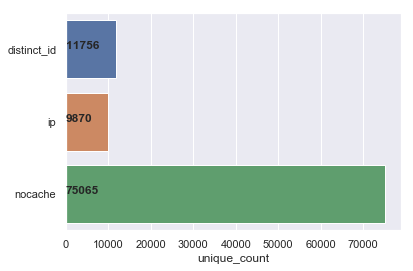

In [148]:
nocache = df_sensor['nocache'].nunique()
distinct_id = df_sensor['dist_id'].nunique()
ip = df_sensor['ip'].nunique()
identifier = pd.DataFrame({'unique_count' : [distinct_id,ip,nocache]},columns=['unique_count'],index=['distinct_id','ip','nocache'])
identifier
sns.barplot(x='unique_count',y=['distinct_id','ip','nocache'],data=identifier)

plt.text(0,0,"11756",fontsize=12,horizontalalignment='left',fontweight='bold')
plt.text(0,1,"9870",fontsize=12,horizontalalignment='left',fontweight='bold')
plt.text(0,2,"75065",fontsize=12,horizontalalignment='left',fontweight='bold')

In [149]:
df_sensor['dist_id'].describe()

count                                        75092
unique                                       11756
top       835cc4405ee7e42e5b401a25e65b4830b02af7d3
freq                                           254
Name: dist_id, dtype: object

In [150]:
df_sensor['ip'].describe()

count               65673
unique               9870
top       113.208.116.250
freq                 1399
Name: ip, dtype: object

In [151]:
df_sensor['nocache'].describe()

count             75092
unique            75065
top       6176568740047
freq                  7
Name: nocache, dtype: object

####  Choice of identifier
- distinct_id: change from browser and cookie id to protect user privacy; 11756 distinct values
- ip: each ip address can have multiple users; 9870 distinct values
- nocache: simplified identifier but the frequency is too low; 75065 distinct values.
- distinct_id is a better identifier，random generated and can be used for unbiased experiments- train test split 

### <font color='purple'>(2) user activity event analysis by each dimension</font>

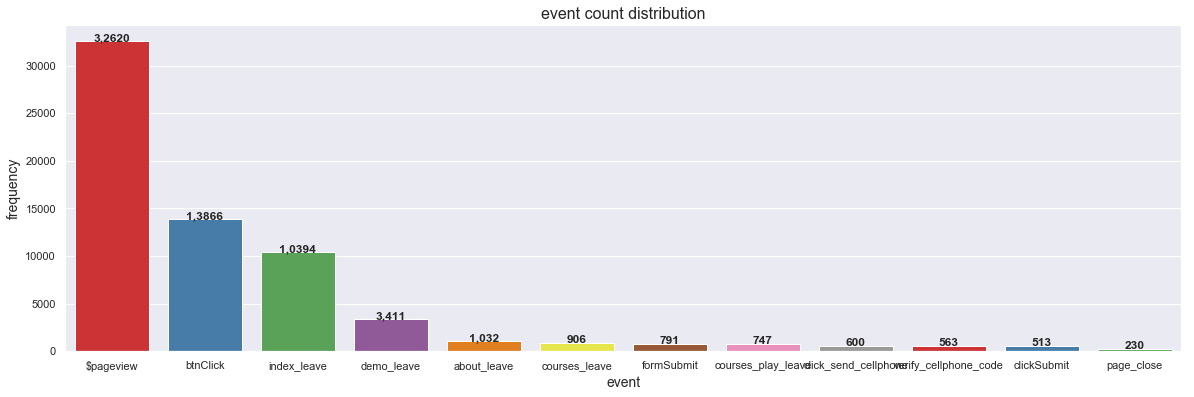

In [152]:
fig = plt.subplots(nrows=1,ncols=1,figsize=(20,6))
sns.countplot(x='event',data=df_sensor,palette="Set1",order=df_sensor['event'].value_counts().index)

plt.title('event count distribution',fontsize=16)
plt.xlabel('event',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.text(0,32620,"3,2620",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(1,13866,"1,3866",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(2,10394,"1,0394",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(3,3411,"3,411",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(4,1032,"1,032",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(5,906,"906",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(6,791,"791",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(7,747,"747",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(8,600,"600",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(9,563,"563",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(10,513,"513",fontsize=12,horizontalalignment='center',fontweight='bold')
plt.text(11,230,"230",fontsize=12,horizontalalignment='center',fontweight='bold')

#plt.tight_layout()
plt.show()

In [153]:
df_sensor['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

#### email:
- There are 6 types of termination term: index_leave, demo_leave, about_leave, courses_leave, courses_play_leave, page_close.
- In terms of user conversion, pageview/btnClick/formSubmit/click_send_cellphone/verify_cellphone_code/clickSubmit are granted as possible representative actions.

### <font color='purple'>a. Conversion Analysis: formSubmit</font>

#### <font color='purple'> (i) Time Analysis </font>

In [154]:
formSubmit_df = df_sensor.loc[df_sensor['event'] == 'formSubmit']
clickSubmit = df_sensor.loc[df_sensor['event'] == 'clickSubmit']

pageView_df = df_sensor.loc[df_sensor['event'] == '$pageview']
btnClick_df = df_sensor.loc[df_sensor['event'] == 'btnClick']

all = ['index_leave','about_leave','demo_leave','course_leave','courses_play_leave']
all_leave_df = df_sensor.loc[df_sensor['event'].isin(all)]

#index_leave = df_sensor.loc[df['event'] == 'index_leave']
#demo_leave = df_sensor.loc[df_sensor['event'] == 'demo_leave']
#about_leave = df_sensor.loc[df_sensor['event'] == 'about_leave']
#courses_leave = df_sensor.loc[df_sensor['event'] == 'courses_leave']
#courses_play_leave = df_sensor.loc[df_sensor['event'] == 'courses_play_leave']

click_send_cellphone = df_sensor.loc[df_sensor['event'] == 'click_send_cellphone']
verify_cellphone_code = df_sensor.loc[df_sensor['event'] == 'verify_cellphone_code']

page_close = df_sensor.loc[df_sensor['event'] == 'page_close']

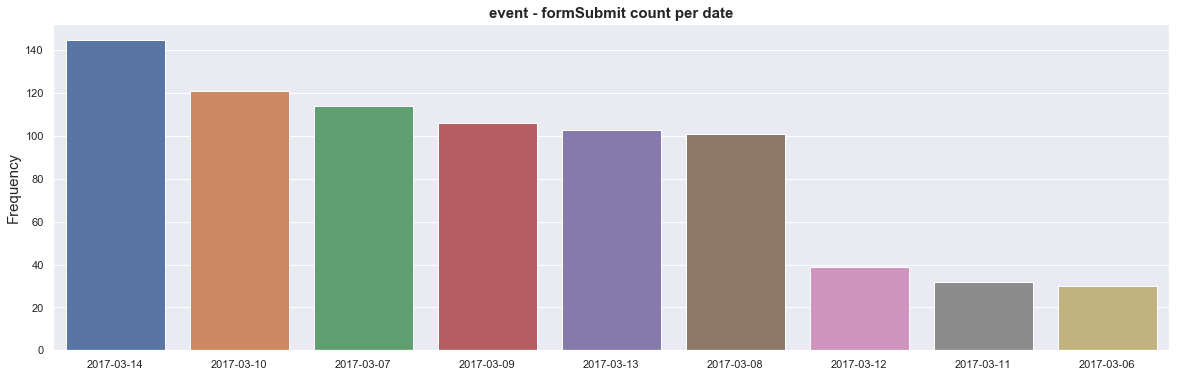

In [155]:
# event- formSubmit by date analysis
fig = plt.subplots(nrows=1,ncols=1,figsize=(20,6))
sns.countplot(x='date',data=formSubmit_df,order=formSubmit_df['date'].value_counts().index)

plt.title("event - formSubmit count per date",fontsize=15,fontweight='bold')
plt.xlabel("")
plt.ylabel("Frequency",fontsize=15)

plt.show()

In [156]:
formSubmit_df['date'].value_counts()

2017-03-14    145
2017-03-10    121
2017-03-07    114
2017-03-09    106
2017-03-13    103
2017-03-08    101
2017-03-12     39
2017-03-11     32
2017-03-06     30
Name: date, dtype: int64

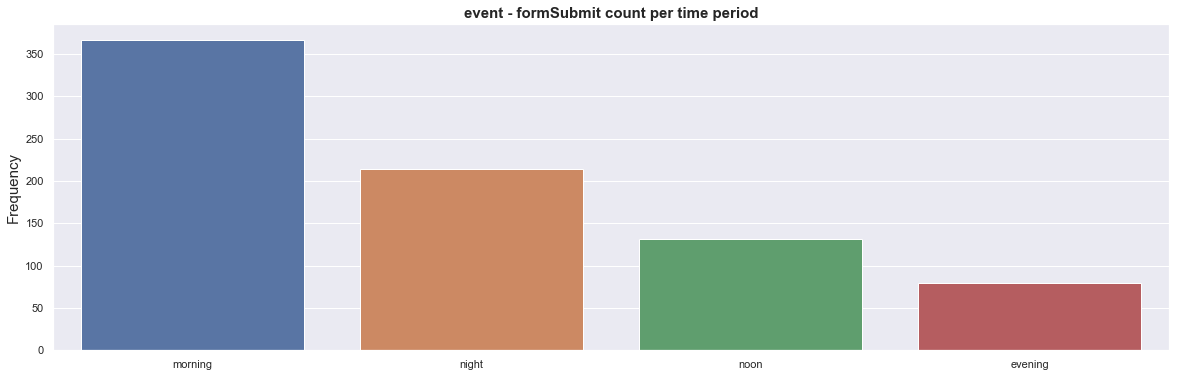

In [157]:
# event- formSubmit by time period analysis
fig = plt.subplots(nrows=1,ncols=1,figsize=(20,6))
sns.countplot(x='hour',data=formSubmit_df,order=formSubmit_df['hour'].value_counts().index)

plt.title("event - formSubmit count per time period",fontsize=15,fontweight='bold')
plt.xlabel("")
plt.ylabel("Frequency",fontsize=15)

plt.show()

In [158]:
formSubmit_df['hour'].value_counts()

morning    367
night      214
noon       131
evening     79
Name: hour, dtype: int64

#### <font color='purple'> (ii) Browser-OS Analysis </font>

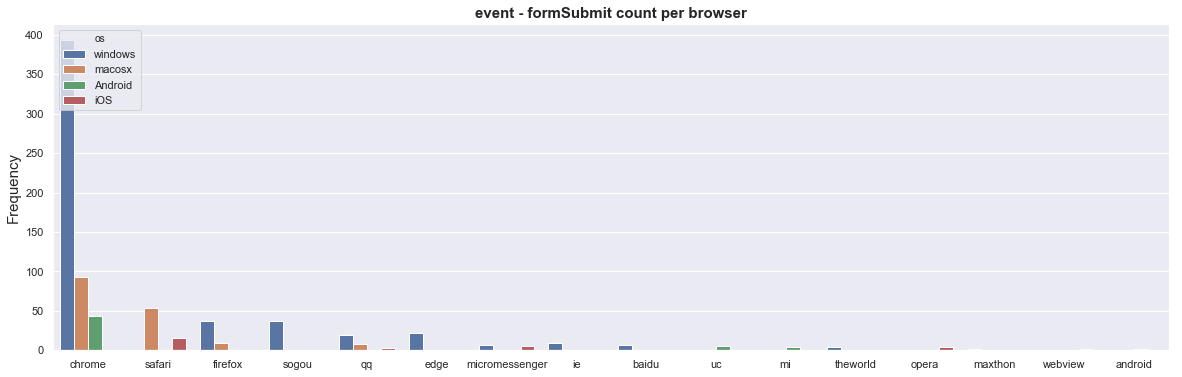

In [159]:
# event- formSubmit by time period analysis
fig = plt.subplots(nrows=1,ncols=1,figsize=(20,6))
sns.countplot(x='browser',hue='os',data=formSubmit_df,order=formSubmit_df['browser'].value_counts().index)

plt.title("event - formSubmit count per browser",fontsize=15,fontweight='bold')
plt.xlabel("")
plt.ylabel("Frequency",fontsize=15)

plt.show()

In [160]:
formSubmit_df['browser'].value_counts()

chrome            531
safari             69
firefox            46
sogou              37
qq                 31
edge               22
micromessenger     14
ie                  9
baidu               7
uc                  7
mi                  4
theworld            4
opera               4
maxthon             2
webview             2
android             2
Name: browser, dtype: int64

#### <font color='purple'> (iii) Device Type/Size Analysis </font>

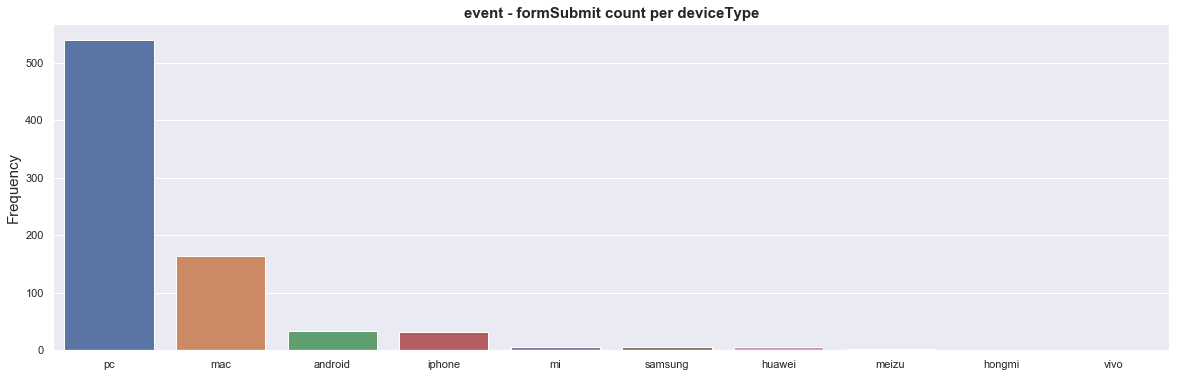

In [161]:
# event- formSubmit by time period analysis
fig = plt.subplots(nrows=1,ncols=1,figsize=(20,6))
sns.countplot(x='deviceType',data=formSubmit_df,order=formSubmit_df['deviceType'].value_counts().index)

plt.title("event - formSubmit count per deviceType",fontsize=15,fontweight='bold')
plt.xlabel("")
plt.ylabel("Frequency",fontsize=15)

plt.show()

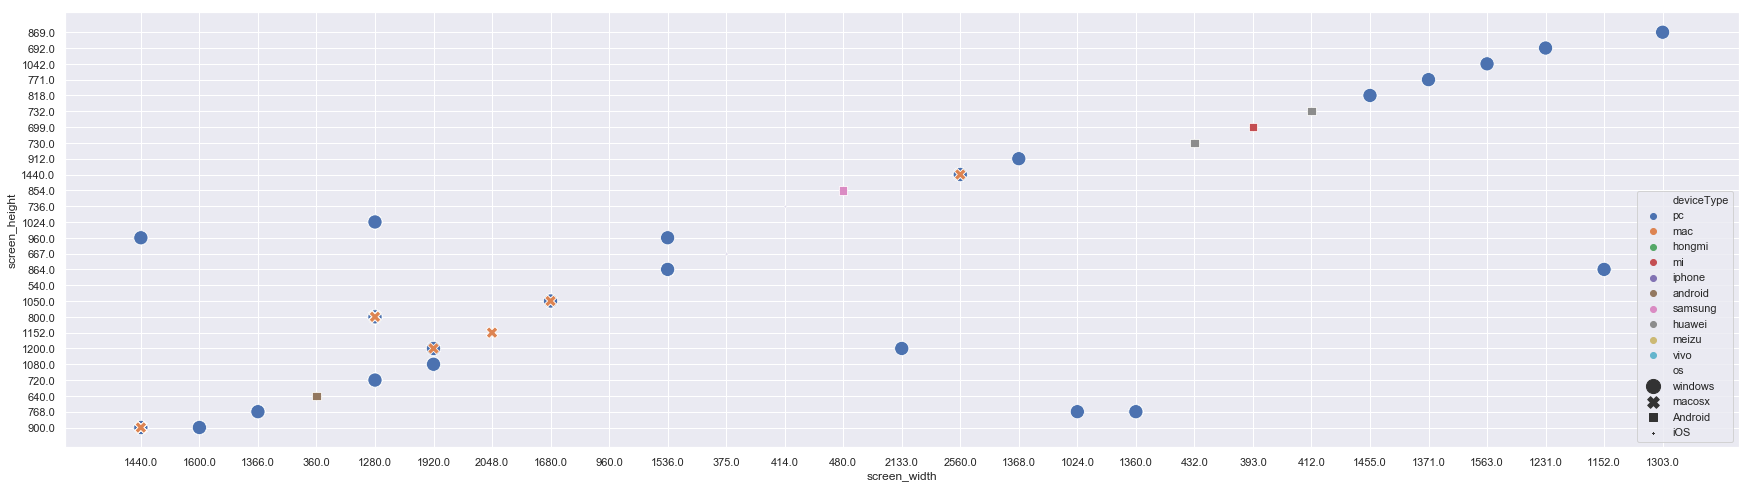

In [166]:
df_screenS = formSubmit_df[["screen_height","screen_width","deviceType","browser","os"]]

fig = plt.subplots(figsize=(30,8))
sns.scatterplot(data=df_screenS,x=df_screenS["screen_width"],y=df_screenS["screen_height"],style="os",hue="deviceType",size="os",sizes=(5,200),legend="full")

In [190]:
# 11.6" (1366 * 768) -> laptop
# 27" (1920 * 1080)  -> pc monitor
# 19" (1440 * 900)   -> pc monitor
# 10" (1280 * 800)   -> laptop
# 3.2" (360 * 640)   -> mobile
formSubmit_df1 = formSubmit_df["screen_width"]+formSubmit_df["screen_height"]
formSubmit_df1.value_counts()

1366.0768.0     195
1920.01080.0    187
1440.0900.0     111
1280.0800.0      60
360.0640.0       41
1280.0720.0      34
1600.0900.0      24
1680.01050.0     17
414.0736.0       16
1536.0864.0      13
2560.01440.0     12
375.0667.0       12
1360.0768.0      10
1280.01024.0     10
1920.01200.0     10
412.0732.0        5
480.0854.0        4
1152.0864.0       4
960.0540.0        4
1440.0960.0       3
432.0730.0        3
1371.0771.0       2
393.0699.0        2
2133.01200.0      2
1455.0818.0       2
2048.01152.0      2
1231.0692.0       1
1563.01042.0      1
1303.0869.0       1
1368.0912.0       1
1024.0768.0       1
1536.0960.0       1
dtype: int64

#### <font color='purple'> (iv) Conversion Analysis by IP- Country & City </font>

In [213]:
formSubmit_df.head(3)

nocache                                   dist_id       event  \
273  0696344326377  05275c9a86246309de06ef9e9443dbecb2d9e432  formSubmit   
362  3890873001837  9784a50f2468b6e08fd55325bb3c7c614608dd13  formSubmit   
374  4012834902778  9784a50f2468b6e08fd55325bb3c7c614608dd13  formSubmit   

    browser browser_version first_browser_language             ip  \
273      ie               8                    NaN  116.231.5.148   
362      qq             9.5                    NaN  106.38.97.146   
374      qq             9.5                    NaN  106.38.97.146   

    is_first_day is_first_time  \
273         True         False   
362         True         False   
374         True         False   

                                       latest_referrer     ...       type  \
273  http://www.baidu.com/baidu.php?sc.7aTK000CsN4T...     ...      track   
362                                                NaN     ...      track   
374                                                NaN     ...      track   

                    time           time_type        date dayofweek     hour  \
273  2017-03-06 09:19:15 2017-03-06 09:19:15  2017-03-06       Mon  morning   
362  2017-03-06 09:23:59 2017-03-06 09:23:59  2017-03-06       Mon  morning   
374  2017-03-06 09:24:31 2017-03-06 09:24:31  2017-03-06       Mon  morning   

    country      city   latitude   longitude  
273      CN  Shanghai  31.222219  121.458061  
362      CN   Beijing  39.907501  116.397232  
374      CN   Beijing  39.907501  116.397232  

[3 rows x 35 columns]

In [1]:
df_loc = df_sensor[["latitude","longitude","event"]]

NameError: name 'df_sensor' is not defined

In [ ]:
for row in df_loc.iterrows():
    print (row["latitude"],row["longitude"])

In [ ]:
import folium

COORDINATES = cood

# for speed purposes
MAX_RECORDS = 75092
 
# create empty map zoomed in on San Francisco
map = folium.Map(location=cood, zoom_start=12)

# add a marker for every record in the filtered data, use a clustered view
for each in df_sensor[0:MAX_RECORDS].iterrows():
    map.simple_marker(
        location = [each[1]['Y'],each[1]['X']], 
        clustered_marker = True)
 
display(map)


In [214]:
import folium 
folium_map = folium.Map(location=[31.222219, 121.458061],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
marker = folium.CircleMarker(location=[31.222219, 121.458061])
marker.add_to(folium_map)
folium_map.save("my_map.html")

In [215]:
folium_map

In [59]:
df_sensor['country'].value_counts()

CN    64517
NA     9419
US      402
HK      240
JP      143
SG       50
TH       49
TW       32
IN       29
MY       26
NZ       23
KR       23
PH       22
GB       21
CA       20
AU       19
FR       13
RU       12
ID        8
IT        5
DE        4
BR        3
ES        2
EG        2
-         2
NL        2
ZM        1
TZ        1
MO        1
MM        1
Name: country, dtype: int64

In [57]:
formSubmit_df['country'].value_counts()

CN    782
HK      5
NZ      2
US      1
JP      1
Name: country, dtype: int64

In [60]:
df_sensor['city'].value_counts()

Beijing           24076
NA                 9419
Shanghai           8018
Shenzhen           6312
Guangzhou          5473
Hangzhou           4770
Chengdu            2114
Nanjing            1596
Wuhan              1188
Suzhou              771
Tianjin             689
Hefei               528
Dongguan            476
Zhuhai              313
Chongqing           312
Changsha            292
Shenyang            288
Zhengzhou           275
Wenzhou             262
Xiamen              246
Huizhou             244
Hong Kong           240
Foshan              234
Shantou             234
Jinan               231
Fuzhou              183
Xi'an               172
Urumqi              158
Xizhahaqi           150
Luzhou              143
                  ...  
Dingxi                1
Longyan               1
Langzhong             1
Foster City           1
Himeji                1
Kazan                 1
Shihezi               1
Phrae                 1
Fengtai               1
Zhaoyuan              1
Zhoushan        

In [58]:
formSubmit_df['city'].value_counts()

Beijing      246
Hangzhou      82
Shenzhen      77
Guangzhou     70
Shanghai      68
Chengdu       31
Dongguan      26
Nanjing       23
Shenyang      17
Suzhou        15
Wuhan         12
Zhuhai        10
Chongqing     10
Tianjin        8
Hefei          8
Xiamen         8
Jiangmen       6
Hong Kong      5
Jinan          5
Wenzhou        4
Longsheng      4
Foshan         3
Xinxiang       3
Changsha       3
Xi'an          3
Zhengzhou      3
Nantong        3
Yinchuan       3
Qingdao        3
Xiangyang      3
Dongying       2
Xizhahaqi      2
Urumqi         2
Jiaonan        2
Auckland       2
Lhasa          2
Wuxi           2
Shaoguan       1
Xianning       1
Fuzhou         1
Jiaxing        1
Nanning        1
Yichang        1
Taicang        1
Qingyuan       1
Tokyo          1
Shantou        1
Heyuan         1
San Mateo      1
Minhang        1
Jinhua         1
Xinzheng       1
Name: city, dtype: int64

#### (V)

Do more EDA here

- All the data collected on March 2017, and only distribute in 6th-14th and 31st
- 31st is a wrong data, should be eliminated from the dataset

The rows with "profile_set_once" were exactly the mistake 31st dates that were deleted (9419 rows)
Features that have null value only at "profile_set_once" type: 
browser, browser_v, event, ip, is_fd, is_ft, model, os, os_version, screen_h, screen_w
if we consider event, all these features including time, dist_id might be useful

conversion rate (the percentage of users who take a desired action) analyses

In [27]:
nall = df.dist_id.nunique()
nall

11708

In [29]:
nview = df_view.dist_id.nunique()
nview

11587

In [50]:
nileave = df_ileave.dist_id.nunique()
nileave

6946

In [30]:
nclick = df_btnclick.dist_id.nunique()
nclick

4501

In [31]:
ndleave = df_dleave.dist_id.nunique()
ndleave

1436

In [32]:
naleave = df_aleave.dist_id.nunique()
naleave

712

In [33]:
ncleave = df_cleave.dist_id.nunique()
ncleave

692

In [34]:
npleave = df_playleave.dist_id.nunique()
npleave

370

In [35]:
nsend = df_send.dist_id.nunique()
nsend

501

In [36]:
nverify = df_verify.dist_id.nunique()
nverify

472

In [38]:
df_verify['result'].describe()

count     563
unique      3
top        正确
freq      528
Name: result, dtype: object

In [39]:
df_verify[df_verify['result']=='正确'].dist_id.nunique()

471

Only one user from 472 users has wrong verification code, and never has correct verification code

In [40]:
nform = df_form.dist_id.nunique()
nform

497

In [41]:
nsubmit = df_submit.dist_id.nunique()
nsubmit

461

In [47]:
nclose = df_close.dist_id.nunique()
nclose

97

In [42]:
print("conversation rate of click send cellphone:")
print(nsend/nall)

conversation rate of click send cellphone:
0.04279125384352579


In [43]:
print("conversation rate of verify cellphone code:")
print(nverify/nall)

conversation rate of verify cellphone code:
0.040314314998291766


The conversation rate from verify cellphone code to form submit increase: it is not neccessary to send verification code for form submit

In [44]:
print("conversation rate of form submit:")
print(nform/nall)

conversation rate of form submit:
0.04244960710625213


In [45]:
print("conversation rate of click submit:")
print(nsubmit/nall)

conversation rate of click submit:
0.0393747864707892


In [46]:
print("conversation rate of demo leave:")
print(ndleave/nall)

conversation rate of demo leave:
0.12265117868124359


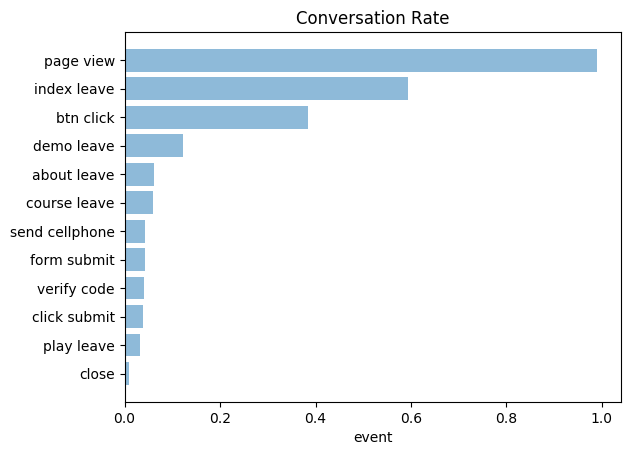

In [61]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('close','play leave','click submit','verify code','form submit','send cellphone', 'course leave', 
           'about leave', 'demo leave', 'btn click', 'index leave','page view')
y_pos = np.arange(len(objects))
performance = [nclose/nall,npleave/nall,nsubmit/nall,nverify/nall,nform/nall,nsend/nall,ncleave/nall,
               naleave/nall,ndleave/nall,nclick/nall,nileave/nall,nview/nall]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('event')
plt.title('Conversation Rate') 
plt.savefig('conversationrate.png',bbox_inches="tight",dpi=500)
plt.show()

The key factors that bottleneck the conversion rate is sign up/send celpphone verification

We can also look into why users view the page but never click

In [62]:
#create a new data frame to check the user read page but do not click
df_vtc = df_view[~df_view.dist_id.isin(df_btnclick.dist_id)]

In [67]:
df_vtc['dist_id'].describe()

count                                         9441
unique                                        7088
top       651397ce6ca369703bfa0f67342058c26cc1f4b9
freq                                            32
Name: dist_id, dtype: object

Among the user viewd page but do not click: most user only view once and never click

In [69]:
df_vtc.title.value_counts(dropna=False)

神策数据 | Sensors Data - 国内领先的用户行为分析产品                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     5633
介绍 · Sensors Analytics 使用手册                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [71]:
df_view['dist_id'].describe()

count                                        32620
unique                                       11587
top       08ba9b365da9b395ab2a03ed1a76b97e01716a39
freq                                           152
Name: dist_id, dtype: object

In [72]:
df_view.title.value_counts(dropna=False)

神策数据 | Sensors Data - 国内领先的用户行为分析产品                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     13700
神策分析|Sensors Analytics-帮你实现数据驱动－demo                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Compare the view data frame and view but not click dataframe:
Most users stpped at the main page, people seems to have much interest in demo and product than B round of financing conference

Pssible useful feature: session_r, session_rh, session_page_url, pageStayTime, pagePosition, pageUrl, latest_utm_s, latest_utm_s, latest_utm_t

In [73]:
df.session_p.value_counts(dropna=True)

https://www.sensorsdata.cn/                                                                                                                                                                                                                                                          16910
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%A5%9E%E7%AD%96&utm_content=%E5%93%81%E7%89%8C%2D%E7%A5%9E%E7%AD%96&utm_campaign=%E5%93%81%E7%89%8C%E8%AF%8D                                                                                                  5419
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D                                                              4837
https://sensorsdata.cn/                                                                                                                                

In [74]:
df.screen_r.value_counts(dropna=True)

https://www.baidu.com/baidu.php                                                                                                                                                                             24908
                                                                                                                                                                                                            16034
https://www.baidu.com/link                                                                                                                                                                                   4998
https://www.baidu.com/s                                                                                                                                                                                      1919
https://www.google.com.hk/                                                                                                                                      

In [75]:
df.screen_rh.value_counts(dropna=True)

www.baidu.com                             33510
                                          16028
www.sensorsdata.cn                         2047
www.sogou.com                              1743
m.baidu.com                                1467
36kr.com                                   1453
www.google.com.hk                           926
www.google.com                              817
www.so.com                                  578
sensorsdata.cn                              569
link.zhihu.com                              447
www.google.co.jp                            252
cn.bing.com                                 250
m.sogou.com                                 214
wap.sogou.com                               199
www.woshipm.com                             142
image.baidu.com                             117
class.sanjieke.cn                           112
www.itjuzi.com                              108
passport.36kr.com                            78
googleads.g.doubleclick.net             

session_page_url extract referrer data to session_r, and further clean the data to session_rh. 
We can see how the session_r/session_rh classify as empty

In [76]:
df['session_p'].loc[df['screen_r'] == '']

2                          https://sensorsdata.cn/?ch=demo
3                          https://sensorsdata.cn/?ch=demo
4                          https://sensorsdata.cn/?ch=demo
8                          https://sensorsdata.cn/?ch=demo
15                    https://www.sensorsdata.cn/demo.html
16                    https://www.sensorsdata.cn/demo.html
17                         https://sensorsdata.cn/?ch=demo
23                         https://sensorsdata.cn/?ch=demo
25                         https://sensorsdata.cn/?ch=demo
31                    https://www.sensorsdata.cn/demo.html
32                         https://sensorsdata.cn/?ch=demo
33                    https://www.sensorsdata.cn/demo.html
34                    https://www.sensorsdata.cn/demo.html
35                    https://www.sensorsdata.cn/demo.html
38                    https://www.sensorsdata.cn/demo.html
39                    https://www.sensorsdata.cn/demo.html
40                    https://www.sensorsdata.cn/demo.ht

most of empty session_r and session_rh are directly from sensordata website, a few have utm_s: baidu

latest_utm_s has 25090 empty, they come from sesordata website directly
considering the number, we can bin this feature as baidu and not baidu

In [78]:
df.latest_utm_m.value_counts(dropna=False)

cpc                   34623
NaN                   25982
mcpc                   3255
mfeed                   934
default                 538
answer                  133
banner                   67
hao.caibaojian.com       33
production               27
sidonghui                24
toutiao.io               20
referral                 15
youjian                   8
lixinya                   6
customer_m                5
sidashidai                2
edm                       1
Name: latest_utm_m, dtype: int64

In [79]:
df.latest_utm_t.value_counts(dropna=False)

NaN             26578
神策               7529
用户画像             5349
神策数据             3393
数据分析             1419
首页-通用词-三图-图1      934
大数据分析             813
用户分析              812
神策分析              677
电子商务数据            662
聚类分析              511
网站运营数据分析          506
网站数据统计            494
产品数据分析            489
用户画像分析            455
旅游大数据             411
app数据             406
数据分析系统            345
客户画像              310
app数据分析           293
用户行为              288
app分析             283
数据挖掘              279
数据可视化             250
日志分析系统            248
大数据应用             246
电商数据分析            243
数据分析公司            242
数据统计平台            231
数据分析平台            227
                ...  
跨屏分析                2
数据分析工具有哪些           2
运营商数据分析             2
广告效果监测系统            2
多数据整合               2
用户行为挖掘              2
用户画像统计              2
电商数据分析方案            2
营销个性化               2
金融精准营销              2
白领用户画像              2
互联网广告效果评估           2
产业大数据分析             2
用户画像平台              2
国内数据可视化公司 

In [80]:
df.latest_utm_campaign.value_counts(dropna=False)

NaN                            25770
通用词                            22180
品牌词                            11929
S-通用词                           1917
神策-移动推广                          998
首页                               934
G-通用词                            391
用户行为                             285
caroline                         133
gamedemo                         133
vtrack                           118
ebizdemo                         109
test_fll_gxq_zgq                  73
financedemo                       72
spring                            68
xingshulin_standalone             65
golddemo                          60
凤巢头条                              57
数据分析                              44
trial                             34
jiedaibao-standalone              29
about                             27
皇冠子链                              26
李彦敏                               24
edudemo                           22
courses                           21
用户画像                              16
c

In [116]:
df.latest_utm_content.value_counts(dropna=False)

NaN                                                                          26910
品牌-神策                                                                        11678
通用-用户画像                                                                       5529
通用-数据分析                                                                       3136
通用-数据分析-产品                                                                    1403
通用-数据分析-行业                                                                    1242
通用-数据分析-运营                                                                    1042
通用-用户分析                                                                        983
通用词-三图                                                                         934
通用-APP运营                                                                       913
通用词-M                                                                          795
通用-电商运营                                                                        730
通用-用

In [81]:
df['source'] = df['latest_utm_s'].fillna('sensordata')

In [82]:
df.source[~df.source.isin(['baidu','sensordata'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
df.source.value_counts(dropna=False)

baidu         36085
sensordata    25090
others         4498
Name: source, dtype: int64

In [84]:
df['medium'] = df['latest_utm_m'].fillna('ukmedium')

In [86]:
df.medium[~df.medium.isin(['cpc','ukmedium'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
df.medium.value_counts(dropna=False)

cpc         34623
ukmedium    25982
others       5068
Name: medium, dtype: int64

In [96]:
df['content'] = df['latest_utm_content'].fillna('ukcontent')

In [97]:
df.content[df.content.str.contains('数据')] = 'data'
df.content[~df.content.isin(['data','ukcontent'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
df.content.value_counts(dropna=False)

ukcontent    26910
others       26828
data         11935
Name: content, dtype: int64

In [99]:
df.pageUrl.value_counts(dropna=True)

https://www.sensorsdata.cn/demo.html                                                                                                                                                                                                                                                 4377
https://www.sensorsdata.cn/                                                                                                                                                                                                                                                          3857
https://www.sensorsdata.cn/index.html                                                                                                                                                                                                                                                1832
https://www.sensorsdata.cn/product.html                                                                                                                   

In [100]:
df.pageP.value_counts(dropna=False)

NaN     49183
 1.0    10679
 2.0     4032
 3.0      898
 4.0      881
Name: pageP, dtype: int64

In [101]:
df['event'].loc[df['pageP'] == 4.0].value_counts(dropna=False)

index_leave    881
Name: event, dtype: int64

PageUrl and PageP has the same information: which specific page interested

In [102]:
df.pageS.describe()

count    1.672000e+04
mean     6.681742e+03
std      5.343221e+04
min      3.300000e-02
25%      5.390750e+00
50%      2.057950e+01
75%      2.261860e+02
max      2.918014e+06
Name: pageS, dtype: float64

Total number of rows in btnclick: 13866; posible features with not too much null values.
latest_r                  78
latest_rh                 78
latest_utm_campaign     5227
latest_utm_content      5451
latest_utm_m            5263
latest_utm_s            5069
latest_utm_t            5383
page                    2150
pageUrl                    0
screen_h                   0
screen_r                   0
screen_rh                  0
screen_w                   0
session_p                  2

In [104]:
df_btnclick.page.value_counts(dropna=False)

index            7964
demo             2242
NaN              2150
about             816
courses_index     694
Name: page, dtype: int64

In [107]:
df_btnclick.loc[df_btnclick['page']=='demo'].dist_id.nunique()

787

In [105]:
df_btnclick.name.value_counts(dropna=False)

request     2967
demo        2783
document    2067
product     1942
b-round     1245
about        925
blog         803
viedo        550
logo         508
mail          76
Name: name, dtype: int64

In [108]:
df_btnclick.loc[df_btnclick['name']=='demo'].dist_id.nunique()

1268

on the demo page, there were around 500 users did not click on anything or continue

btnclick has 2242 demo in page and 2783 demo in name, while demo leave has 3411 items

In [113]:
df_cts = df_btnclick[~df_btnclick.dist_id.isin(df_send.dist_id)].loc[df_btnclick['page']=='demo']

In [114]:
df_cts.dist_id.nunique()

479

In [115]:
df_stc = df_send[~df_send.dist_id.isin(df_btnclick.loc[df_btnclick['page']=='demo'].dist_id)]

In [116]:
df_stc.dist_id.nunique()

193

478 users click on demo but do not register
193 users register but never click on demo

In [117]:
df_dts = df_dleave[~df_dleave.dist_id.isin(df_send.dist_id)]

In [118]:
df_dts.dist_id.nunique()

1027

In [119]:
df_std = df_send[~df_send.dist_id.isin(df_dleave.dist_id)]

In [120]:
df_std.dist_id.nunique()

92

1027 users go to demo but do not register
92 users register but never go to demo

First, some people don't click on demo page: have no interst first
Second, some click on demo but decide not to continue to register

Total number of rows in page view: 32620

In [121]:
df_view.url.value_counts(dropna=True)

https://www.sensorsdata.cn/demo.html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    3231
https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [122]:
df_view.url_path.value_counts(dropna=True)

/                                                                                                                                                                      12243
/demo.html                                                                                                                                                              4183
/manual/                                                                                                                                                                2634
/product.html                                                                                                                                                           2473
/b-round.html                                                                                                                                                           1907
/index.html                                                                                                                            

In [123]:
df_view.title.value_counts(dropna=True)

神策数据 | Sensors Data - 国内领先的用户行为分析产品                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     13700
神策分析|Sensors Analytics-帮你实现数据驱动－demo                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [124]:
df_view.ch.value_counts()[df_view['ch'].value_counts()>10]

www.sensorsdata.cn                        12634
                                           7091
www.baidu.com                              6284
sensorsdata.cn                             2764
m.baidu.com                                 816
www.sogou.com                               352
36kr.com                                    208
www.google.com.hk                           166
www.google.com                              156
localhost                                   154
m.sogou.com                                 147
link.zhihu.com                              146
wap.sogou.com                               144
image.baidu.com                              67
www.so.com                                   67
www.google.co.jp                             48
googleads.g.doubleclick.net                  41
ebizdemo.cloud.sensorsdata.cn                41
www.woshipm.com                              34
cn.bing.com                                  33
zhidao.baidu.com                        

In [125]:
df_view.refer_Host.value_counts()[df_view['refer_Host'].value_counts()>10]

www.sensorsdata.cn                        12634
                                           7091
www.baidu.com                              6284
sensorsdata.cn                             2764
m.baidu.com                                 816
www.sogou.com                               352
36kr.com                                    208
www.google.com.hk                           166
www.google.com                              156
localhost                                   154
m.sogou.com                                 147
link.zhihu.com                              146
wap.sogou.com                               144
image.baidu.com                              67
www.so.com                                   67
www.google.co.jp                             48
googleads.g.doubleclick.net                  41
ebizdemo.cloud.sensorsdata.cn                41
www.woshipm.com                              34
cn.bing.com                                  33
zhidao.baidu.com                        

refer_Host same as ch

In [126]:
df_view.screen_rh.value_counts()[df_view['screen_rh'].value_counts()>10]

www.baidu.com                             14770
                                           8361
www.sensorsdata.cn                         1054
m.baidu.com                                 994
36kr.com                                    790
www.sogou.com                               735
www.google.com.hk                           445
www.google.com                              372
sensorsdata.cn                              293
www.so.com                                  234
link.zhihu.com                              189
m.sogou.com                                 165
wap.sogou.com                               150
cn.bing.com                                 122
www.google.co.jp                            122
www.woshipm.com                              64
image.baidu.com                              61
class.sanjieke.cn                            50
www.itjuzi.com                               49
googleads.g.doubleclick.net                  43
wenku.baidu.com                         

Session referrer host similar to refer_Host and ch, but more null values
Same as the analysis on btnclick and page view, use latest_utm

- Analysis on the reason for demo leave
- Note that we can find utm_source on other data frame to see if we can find not null values

In [138]:
df['weekend'] = ((df.day == '2017-03-11') | (df.day == '2017-03-12')) * 1

In [139]:
##define sign up column with users have form submit behavior
ind = df.dist_id.isin(df_form.dist_id) *1

In [140]:
df['signup'] = ind.tolist()

In [141]:
df_select = df.copy()

In [142]:
import numpy as np
df_select['freq'] = df_select.groupby('dist_id')['dist_id'].transform('count')

In [143]:
df_select.weekend.value_counts(dropna=True)

0    58085
1     7588
Name: weekend, dtype: int64

In [144]:
df_select.signup.value_counts(dropna=True)

0    53029
1    12644
Name: signup, dtype: int64

In [145]:
df_select['freq'].describe()

count    65673.000000
mean        25.265467
std         36.783402
min          1.000000
25%          5.000000
50%         13.000000
75%         30.000000
max        254.000000
Name: freq, dtype: float64

In [146]:
df_select.isnull().sum()

browser                    0
browser_v                  0
ch                     33338
day                        0
dist_id                    0
event                      0
from_url               64691
ip                         0
isMsg                  65204
isSuccess              64882
is_fd                      0
is_ft                      0
latest_ch              57136
latest_r                 811
latest_rh                811
latest_utm_campaign    25770
latest_utm_content     26910
latest_utm_m           25982
latest_utm_s           25090
latest_utm_t           26578
model                      0
name                   50503
nocache                    0
os                         0
os_version                 0
page                   53957
pageP                  49183
pageS                  48953
pageUrl                35317
refer_Host             33338
referrHostUrl          65204
referrer               33339
referrerUrl            65204
requestBtn             61402
result        

In [147]:
selected_columns = [u'dist_id',u'event',u'browser',u'browser_v',u'day', u'is_fd', 
                    u'is_ft', u'ip', u'latest_utm_s',u'latest_utm_m',u'latest_utm_content',u'model', u'os', 
                    u'os_version',u'pageS', u'pageP',u'time', u'CN', u'CT',u'source', u'medium',u'content',
                    u'weekend',u'freq',u'signup']

In [148]:
cleaned_data_csv = 'data/cleaned_data.csv'
df_select[selected_columns].to_csv(cleaned_data_csv, index=False)

In [149]:
df_select[['dist_id','latest_utm_s']].tail(10)

dist_id latest_utm_s
75079  215110e7713ef7435524bf321fa894e411338c40         None
75080  215110e7713ef7435524bf321fa894e411338c40         None
75081  215110e7713ef7435524bf321fa894e411338c40         None
75082  215110e7713ef7435524bf321fa894e411338c40         None
75083  215110e7713ef7435524bf321fa894e411338c40         None
75084  215110e7713ef7435524bf321fa894e411338c40         None
75085  215110e7713ef7435524bf321fa894e411338c40         None
75086  215110e7713ef7435524bf321fa894e411338c40         None
75088  1b384ff8574084ef4a7356a8cd0c36350286e576         None
75090  3b23eacd700848ff085ec5877df695456bfe6bb3        baidu

Try to check if we can use the first time source for anlysis, seems to be the same

1    515
0     85
Name: CN, dtype: int64

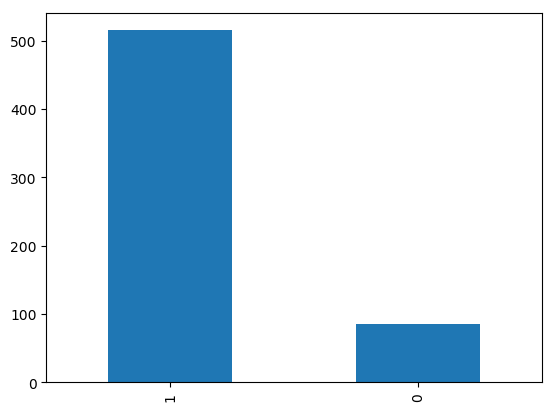

In [161]:
#df_select[['CN', 'signup']].loc[df_select['event'] == 'click_send_cellphone'].groupby(['CN']).mean().plot.bar()
df_select['CN'].loc[df_select['event'] == 'click_send_cellphone'].value_counts(dropna=False).plot.bar()
df_select['CN'].loc[df_select['event'] == 'click_send_cellphone'].value_counts(dropna=False)

1    441
0     72
Name: CN, dtype: int64

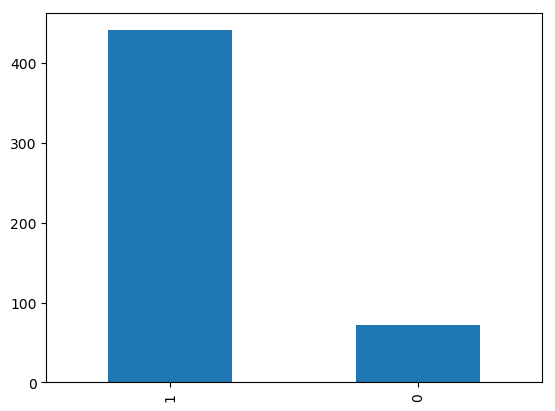

In [162]:
#df_select[['CN', 'signup']].loc[df_select['event'] == 'clickSubmit'].groupby(['CN']).mean().plot.bar()
df_select['CN'].loc[df_select['event'] == 'clickSubmit'].value_counts(dropna=False).plot.bar()
df_select['CN'].loc[df_select['event'] == 'clickSubmit'].value_counts(dropna=False)

1    493
0     70
Name: CN, dtype: int64

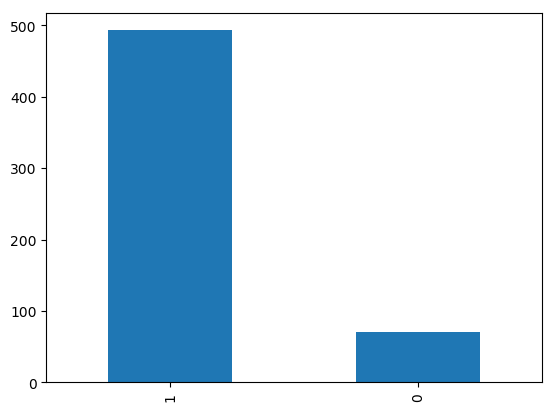

In [163]:
#df_select[['CN', 'signup']].loc[df_select['event'] == 'verify_cellphone_code'].groupby(['CN']).mean().plot.bar()
df_select['CN'].loc[df_select['event'] == 'verify_cellphone_code'].value_counts(dropna=False).plot.bar()
df_select['CN'].loc[df_select['event'] == 'verify_cellphone_code'].value_counts(dropna=False)

Ip address in or not in China, did not influence sign up rate. Users interested in this website can even sign up or use Chinese cellphone number even in abroad. 